# Summary

In this section we will cover a hands-on example developing a credit risk prediction models with some advanced machine learning methods, we will compare the robustness of these models for this case. 


*   The machine learning models we will build here include: 

> 1. Logistic Regression
2. Decision Tree
3. Random Forest
4. XGboost
5. SVM


*   The pipeline building each model includes following steps: 


> 1. Load datasets that has been feature-engineered in our last session
2. Conduct data quality check and processing
3. Establish and train a base model for each machine learning model
4. For each machine learnig model, fine-tune the model parameters. Visualize and compare the performance of every set of tunning parameters
5. Select the best model. With parameters optimized, compare and visualize the performances of these models



*   The packages we will use in this section:


> 1. sklearn.model_selection
> Mainly for train-test datasets split and data preprocessing

> 2. MachineLearningModels
> The self-defined function for establishing& training machine learning models.



> 3. SupportingFunctions
> For operations including loading datasets, measure and visualize model performance


# Load Libraries

### Set up configurations for notebook running environment 

In [1]:
## system config ##
import sys
import os
nb_dir = os.path.split(os.getcwd())[0] + "/" + os.path.split(os.getcwd())[1] + "/Self-defined Modules"
sys.path.append(nb_dir) # Add a directory into sys path

print ('Python', sys.version)

Python 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]


In [2]:
## public libraries ##
# data manipulation
import pandas as pd
import numpy as np

# machine learning
from sklearn.model_selection import train_test_split

In [3]:
## self-defined modules ##
import MachineLearningModels as MLM
import SupportingFunctions as SF

# Data Processing

Here we use:

> 1. SF.load_csv function() for loading the datasets from your local folder
2. train_test_split() function from sklearn.model_selection for splitting up datasets into training and testing data 

In [4]:
# load data
df_model = SF.load_csv(os.path.split(os.getcwd())[0] + "\\3. Output\\Intermediate Data\\modeling_ds_v2.csv")

df_model = df_model.set_index('SK_ID_CURR')
var_y = 'TARGET'
var_x = df_model.columns.tolist()
var_x.remove(var_y)

## Train & Test Split
X_train, X_test, y_train, y_test = train_test_split(df_model[var_x], df_model[var_y], test_size=0.33, random_state=66)

# This sample is created for SVM in order to save time. You do not need it in actual work
df_model_temp = df_model.sample(2000)
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(df_model_temp[var_x], df_model_temp[var_y], test_size=0.33, random_state=66)

print ("X_train Shape: " + str(X_train.shape))
print ("y_train Shape: " + str(y_train.shape))
print ("X_test Shape: " + str(X_test.shape))
print ("y_test Shape: " + str(y_test.shape))

time elapsed: 5.471441030502319 seconds
dataframe dimension: (307511, 58)
X_train Shape: (206032, 56)
y_train Shape: (206032,)
X_test Shape: (101479, 56)
y_test Shape: (101479,)


# Modeling

### Logistic Regression
Use the MLM.my_sklearn_logistic() function from MLM(MachineLearningModels) package for buidling and training logistic regression model 

#### Parameters for Logistic ####
penalty l2
C: 50.00000
###########################

time elapsed: 46.52821755409241 seconds


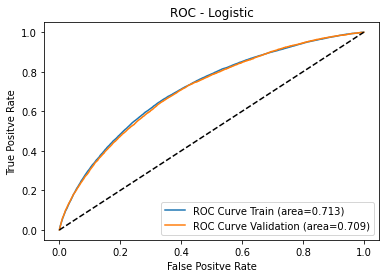

Training:
Pipeline:
KS value:0.3187003726476313

Testing:
Pipeline:
KS value:0.3104911505058026


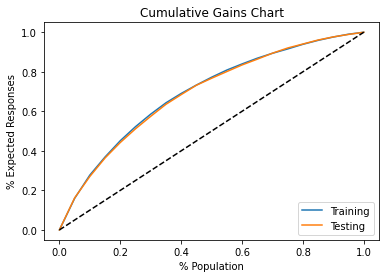

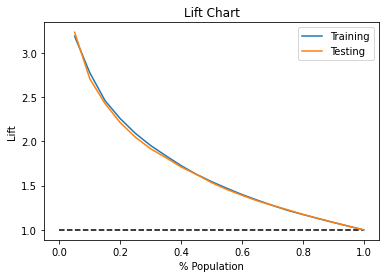

time elapsed: 0.0060389041900634766 seconds


In [5]:
model_logistic, df_pvalue_logistic, time_logistic = MLM.my_sklearn_logistic(X_train, y_train, 
                                                                            param={"penalty":"l2",
                                                                                   "C":50,
                                                                                   "random_state":66})
ls_roc_logistic = SF.plot_roc(model_logistic, X_train, X_test, y_train, y_test, plot_name="Logistic")
ls_ks_logistic, ls_df_lift_logistic = SF.plot_gain_lift(model_logistic, X_train, X_test, y_train, y_test, num_bins=21)
SF.save_model(model_logistic, os.path.split(os.getcwd())[0] + "\\3. Output\\Model", "model_logistic")

### Decision Tree
Use the MLM.my_sklearn_dtree() function from MLM(MachineLearningModels) package for buidling and training decision tree model 

#### Parameters for DTree ####
max features: auto
max depth: 8
min sample split: 0.05000
min sample leaf: 0.01000
###########################



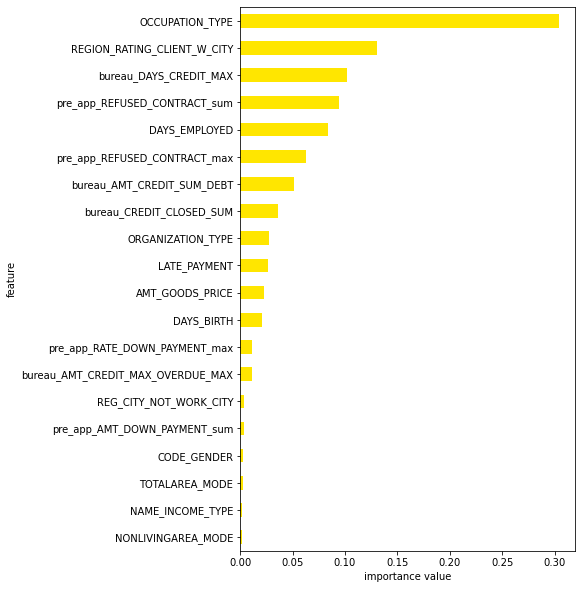

time elapsed: 0.9796490669250488 seconds


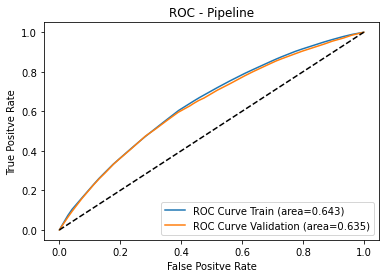

Training:
Pipeline:
KS value:0.21124740526481595

Testing:
Pipeline:
KS value:0.20028434463464007


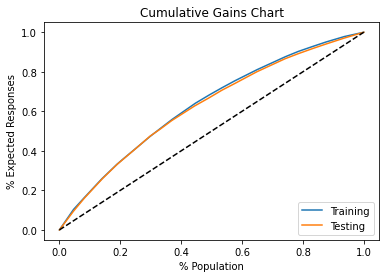

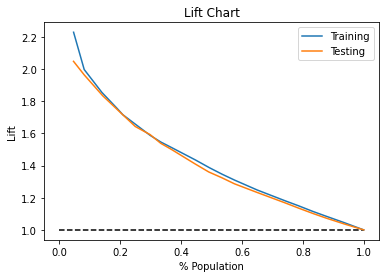

time elapsed: 0.002001047134399414 seconds


In [6]:
model_dtree, df_importance_dtree, time_dtree = MLM.my_sklearn_dtree(X_train, y_train, 
                                                                    param = {"max_features":"auto", 
                                                                             "max_depth":8, 
                                                                             "min_samples_split":0.05,
                                                                             "min_samples_leaf":0.01,
                                                                             "random_state":66})

####### you can swap the value of each paramter! #########################
# max_features: float, default = 'auto',range from 0 to 1, [0.1, 0.5, 0.8]
# max_depth: integer or none, default = None, [2, 8, 16, 32]
# min_samples_split: float, range from 0 to 1, [0.1, 0.5, 0.8]
# min_samples_leaf:range from 0 to 1, [0.1, 0.5, 0.8]
##########################################################################

ls_roc_dtree = SF.plot_roc(model_dtree, X_train, X_test, y_train, y_test)
ls_ks_dtree, ls_df_lift_dtree = SF.plot_gain_lift(model_dtree, X_train, X_test, y_train, y_test, num_bins=21)
SF.save_model(model_dtree, os.path.split(os.getcwd())[0] + "\\3. Output\\Model", "model_dtree")

### Random Forest
Use the MLM.my_sklearn_rf() function from MLM(MachineLearningModels) package for buidling and training random forest model 

#### Parameters for RF ####
n estimators: 100
max features: 0.8
max depth: 10
min sample split: 0.05000
min sample leaf: 0.01000
min_impurity_decrease: 0.00000
###########################



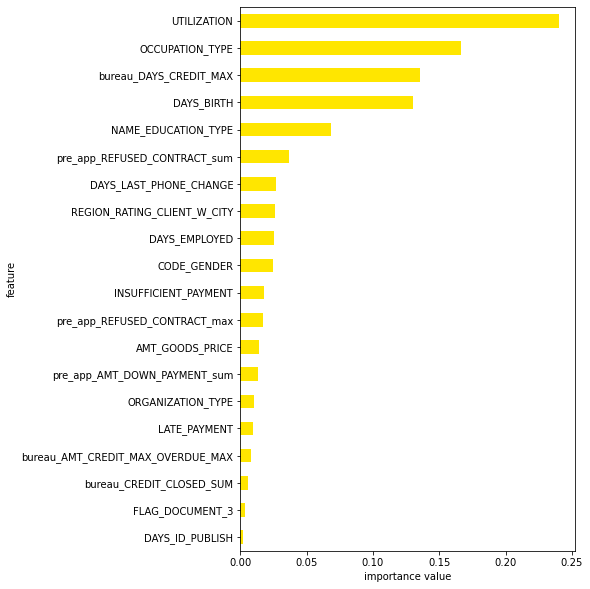

time elapsed: 24.844892978668213 seconds


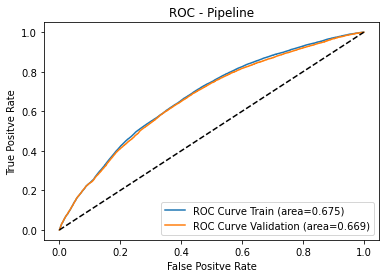

Training:
Pipeline:
KS value:0.2552956926810809

Testing:
Pipeline:
KS value:0.25065538266657905


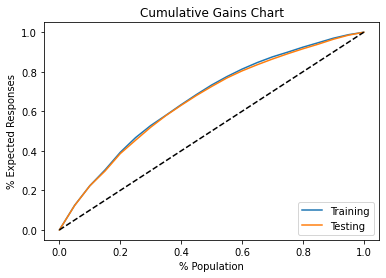

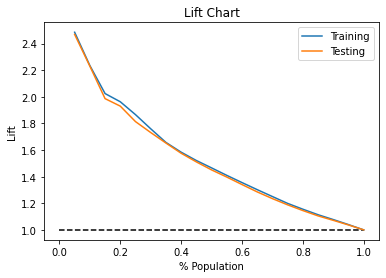

time elapsed: 0.007001399993896484 seconds


In [7]:
model_rf, df_importance_rf, time_rf = MLM.my_sklearn_rf(X_train, y_train, param = {"n_estimators":100,
                                                                                   "max_features":0.8,
                                                                                   "max_depth":10,
                                                                                   "min_samples_split":0.05,
                                                                                   "min_samples_leaf":0.01,
                                                                                   "min_impurity_decrease":0,
                                                                                   "random_state":66})

####### you can swap the value of each paramter! ######################
# n_estimator:integer, default = 10, [1, 2, 4, 8, 16, 32, 64, 100, 200]
# max_features: float, default = 'auto',range from 0 to 1, [0.1, 0.5, 0.8]
# max_depth: integer or none, default = None, [2, 8, 16, 32]
# min_samples_split: float, range from 0 to 1, [0.1, 0.5, 0.8]
# min_samples_leaf:range from 0 to 1, [0.1, 0.5, 0.8]
# min_impurity_decrease: float, default = 0, control the speed of impurity decrease during the training. 
#######################################################################

ls_roc_rf = SF.plot_roc(model_rf, X_train, X_test, y_train, y_test)
ls_ks_rf, ls_df_lift_rf = SF.plot_gain_lift(model_rf, X_train, X_test, y_train, y_test, num_bins=21)
SF.save_model(model_rf, os.path.split(os.getcwd())[0] + "\\3. Output\\Model", "model_rf")

### XGBoost
Use the MLM.my_API_XGBoost() function from MLM(MachineLearningModels) package for buidling and training XGB model 

#### Parameters for XGB ####
learning_rate: 0.80000
n estimators: 50
max depth: 5
colsample_bytree: 0.80000
colsample_bylevel: 0.60000
###########################



C:\Users\NH688MF\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.33679
[1]	validation_0-logloss:0.28219
[2]	validation_0-logloss:0.26897
[3]	validation_0-logloss:0.26542
[4]	validation_0-logloss:0.26288
[5]	validation_0-logloss:0.26173
[6]	validation_0-logloss:0.26089
[7]	validation_0-logloss:0.26041
[8]	validation_0-logloss:0.26002
[9]	validation_0-logloss:0.25978
[10]	validation_0-logloss:0.25988
[11]	validation_0-logloss:0.26010
[12]	validation_0-logloss:0.26009
[13]	validation_0-logloss:0.26028
[14]	validation_0-logloss:0.26038
[15]	validation_0-logloss:0.26064
[16]	validation_0-logloss:0.26071
[17]	validation_0-logloss:0.26082
[18]	validation_0-logloss:0.26088
[19]	validation_0-logloss:0.26104
[20]	validation_0-logloss:0.26132
[21]	validation_0-logloss:0.26140
[22]	validation_0-logloss:0.26155
[23]	validation_0-logloss:0.26165
[24]	validation_0-logloss:0.26174
[25]	validation_0-logloss:0.26191
[26]	validation_0-logloss:0.26208
[27]	validation_0-logloss:0.26211
[28]	validation_0-logloss:0.26228
[29]	validation_0-loglos

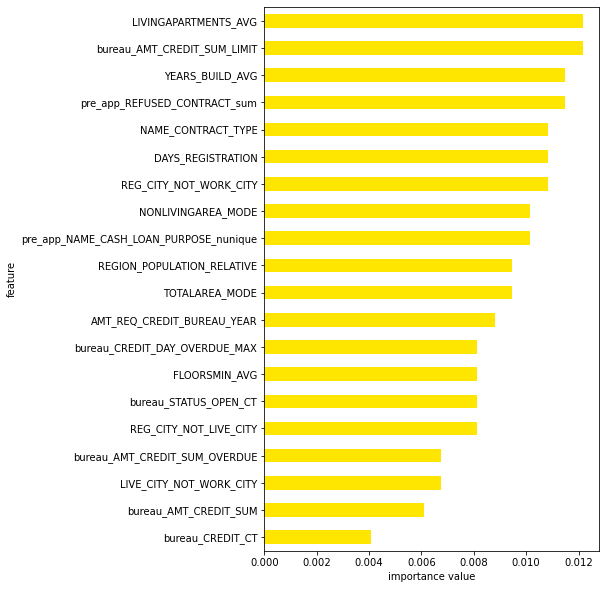

time elapsed: 7.298324823379517 seconds


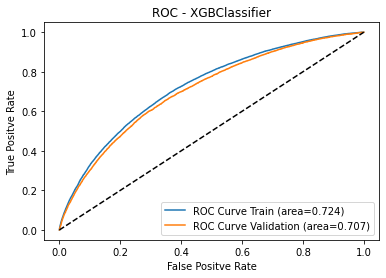

Training:
XGBClassifier:
KS value:0.3296329711401726

Testing:
XGBClassifier:
KS value:0.30416806959467585


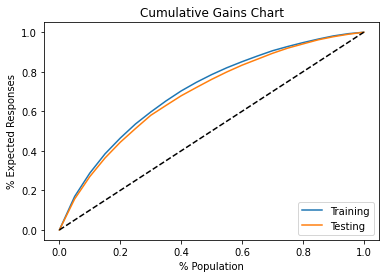

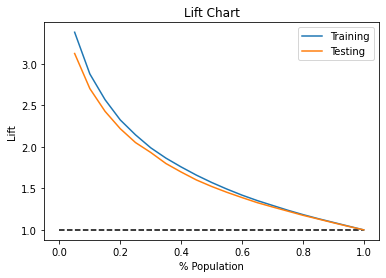

time elapsed: 0.012999773025512695 seconds


In [8]:
model_XGBoost, df_importance_XGBoost, time_XGBoost = MLM.my_API_XGBoost(X_train, y_train, X_test, y_test, 
                                                                        param={"learning_rate":0.8,
                                                                               "n_estimators":50, 
                                                                               "max_depth":5, 
                                                                               "colsample_bytree":0.8,
                                                                               "colsample_bylevel":0.6,
                                                                               "gamma":0,
                                                                               "random_state":66})
####### you can swap the value of each paramter! ######################
# learning_rate:float, range from 0 to 1, default = 0.3, [0.01, 0.1, 0.5]
# n_estimator:integer, default = 10, [1, 2, 4, 8, 16, 32, 64, 100, 200]
# max_depth: integer or none, default = None, [2, 8, 16, 32]
# colsample_bytree: float, range from 0 to 1, [0.1, 0.8]
# colsample_bylevel: float, range from 0 to 1, [0.1, 0.8]
# gamma:(similar to min_impurity_decrease) float, default is 0, range from 0 to 1, [0.1, 0.5, 0.8]
#######################################################################

ls_roc_XGBoost = SF.plot_roc(model_XGBoost, X_train, X_test, y_train, y_test)
ls_ks_XGBoost, ls_df_lift_XGBoost = SF.plot_gain_lift(model_XGBoost, X_train, X_test, y_train, y_test, num_bins=21)
SF.save_model(model_XGBoost, os.path.split(os.getcwd())[0] + "\\3. Output\\Model", "model_XGBoost")

### SVM
Use the MLM.my_sklearn_svm() function from MLM(MachineLearningModels) package for buidling and training SVM model 

#### Parameters for SVM ####
C: 0.100000
gamma: auto
kernel: rbf
###########################

time elapsed: 0.5120408535003662 seconds


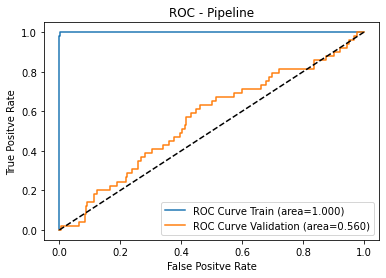

Training:
Pipeline:
KS value:0.9773095623987034

Testing:
Pipeline:
KS value:0.15321153011122612


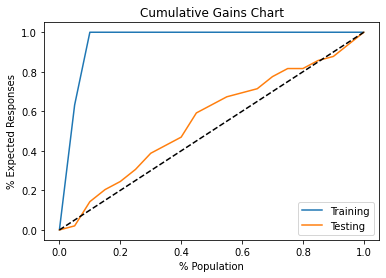

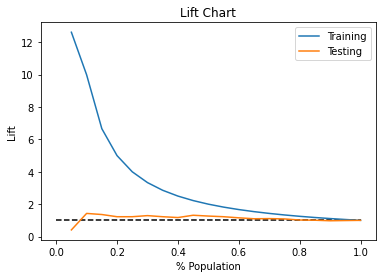

time elapsed: 0.0019683837890625 seconds


In [9]:
model_svm, score_svm, time_svm = MLM.my_sklearn_svm(X_train_temp, y_train_temp, 
                                                    param = {'C':0.1, 
                                                             'gamma':'auto', 
                                                             'kernel':'rbf'})

####### you can swap the value of each paramter! ######################
# C: float, range from 0 to 1, default = 1.0.  [0.01, 0.5, 1.0]
# gamma: float, default = 'auto', when 'auto', gamma = 1/number of features
# kernel: string, default = 'rbf', [‘poly’,‘sigmoid’,'linear']
#######################################################################


ls_roc_svm = SF.plot_roc(model_svm, X_train_temp, X_test_temp, y_train_temp, y_test_temp)
ls_ks_svm, ls_df_lift_svm = SF.plot_gain_lift(model_svm, X_train_temp, X_test_temp, y_train_temp, y_test_temp, num_bins=21)
SF.save_model(model_svm, os.path.split(os.getcwd())[0] + "\\3. Output\\Model", "model_svm")

# Parameter Tuning

### Parameter Tuning - Decision Tree

parameters: 8---0.0005
#### Parameters for DTree ####
max features: auto
max depth: 8
min sample split: 0.00050
min sample leaf: 0.00100
###########################



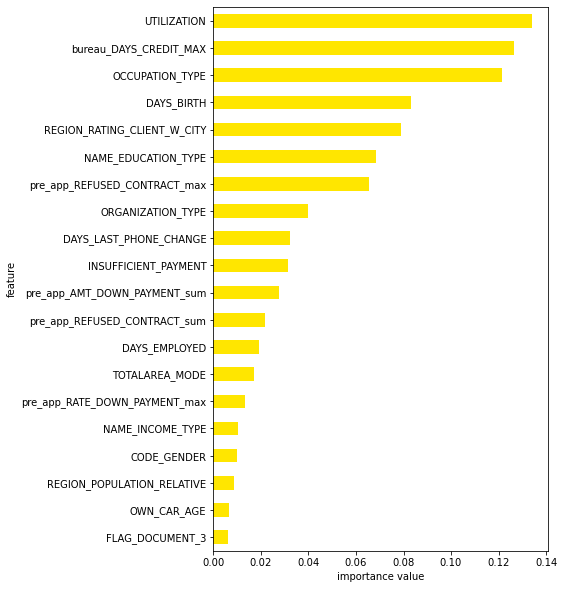

time elapsed: 0.8158977031707764 seconds


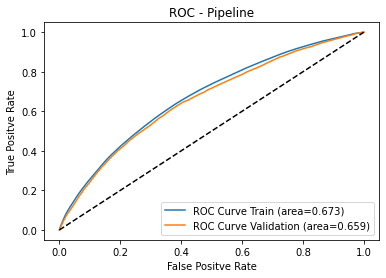

Training:
Pipeline:
KS value:0.25565625909131323

Testing:
Pipeline:
KS value:0.24189418397849582


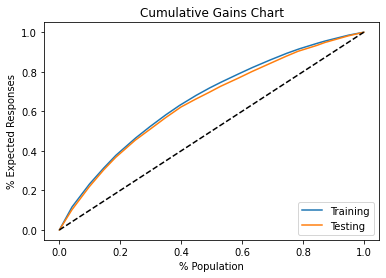

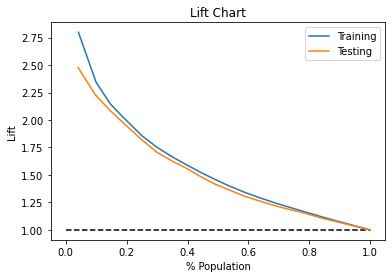

parameters: 8---0.0005
#### Parameters for DTree ####
max features: auto
max depth: 8
min sample split: 0.00050
min sample leaf: 0.00500
###########################



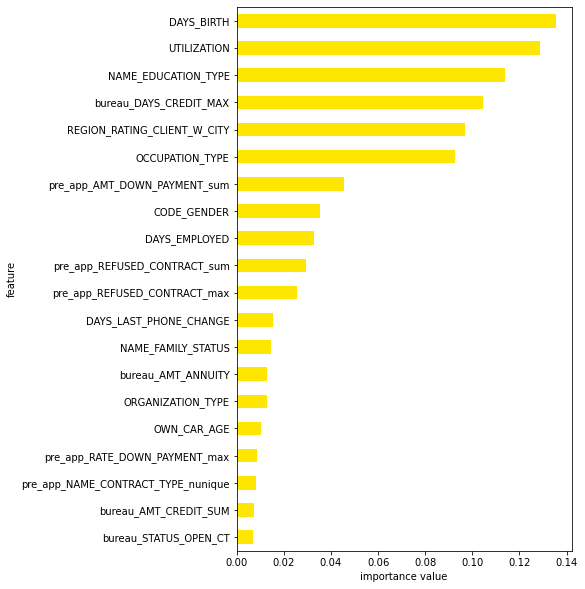

time elapsed: 0.8810591697692871 seconds


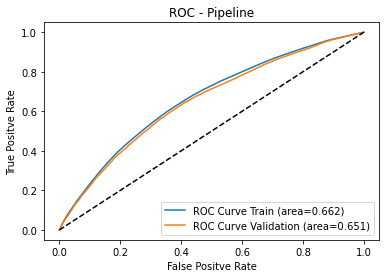

Training:
Pipeline:
KS value:0.2452080684504926

Testing:
Pipeline:
KS value:0.2320075860669661


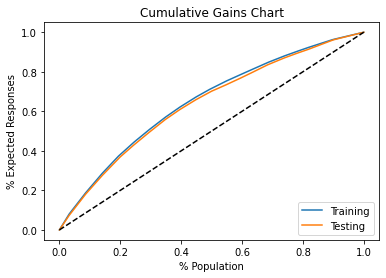

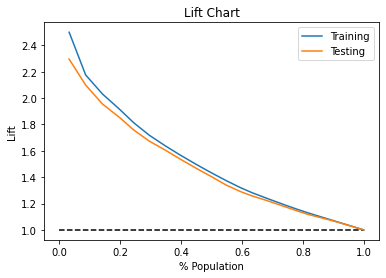

parameters: 8---0.0005
#### Parameters for DTree ####
max features: auto
max depth: 8
min sample split: 0.00050
min sample leaf: 0.01000
###########################



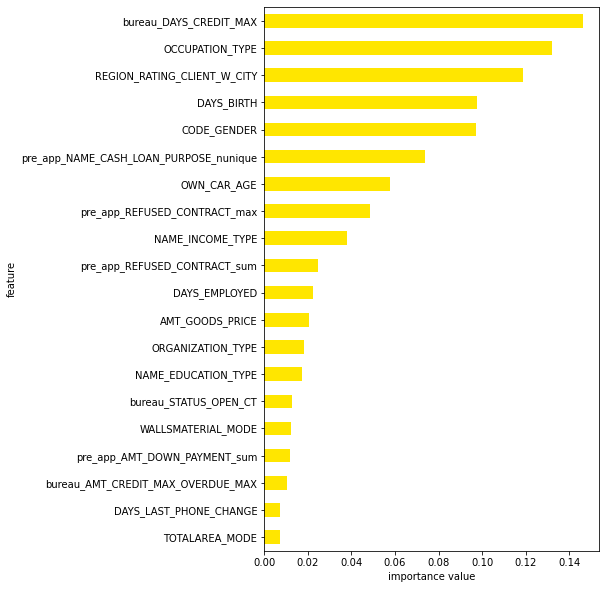

time elapsed: 0.7888197898864746 seconds


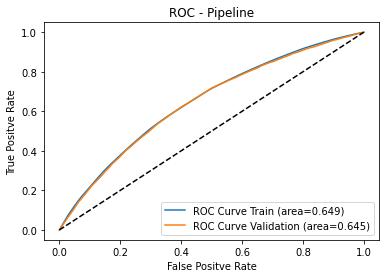

Training:
Pipeline:
KS value:0.21960244926457217

Testing:
Pipeline:
KS value:0.2215343033381682


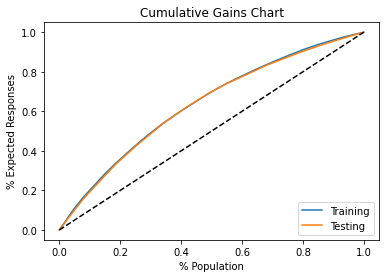

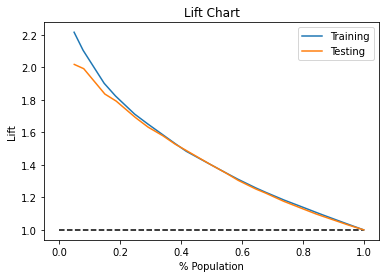

parameters: 8---0.001
#### Parameters for DTree ####
max features: auto
max depth: 8
min sample split: 0.00100
min sample leaf: 0.00100
###########################



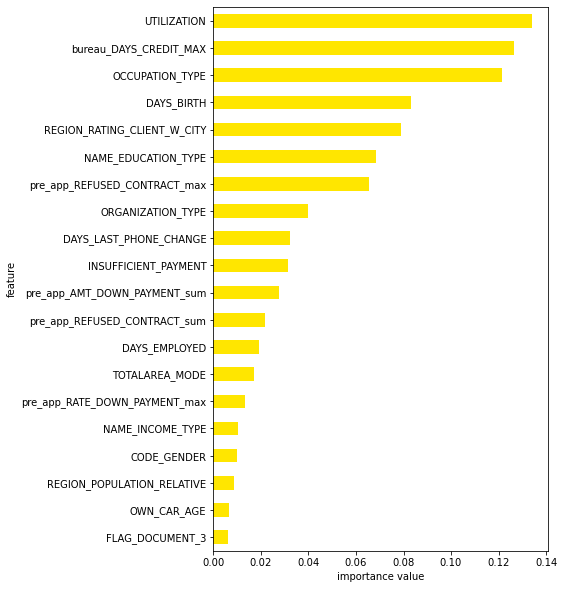

time elapsed: 0.7648146152496338 seconds


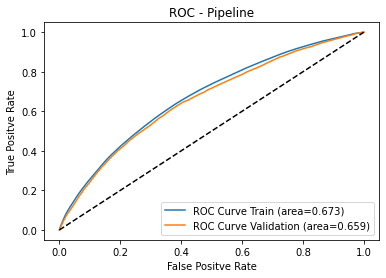

Training:
Pipeline:
KS value:0.25565625909131323

Testing:
Pipeline:
KS value:0.24189418397849582


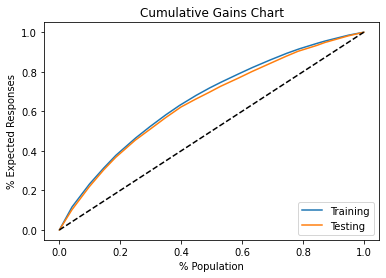

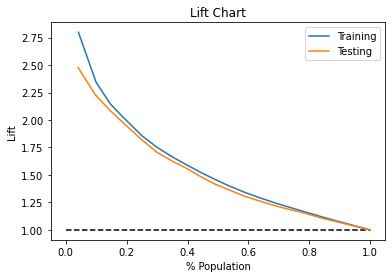

parameters: 8---0.001
#### Parameters for DTree ####
max features: auto
max depth: 8
min sample split: 0.00100
min sample leaf: 0.00500
###########################



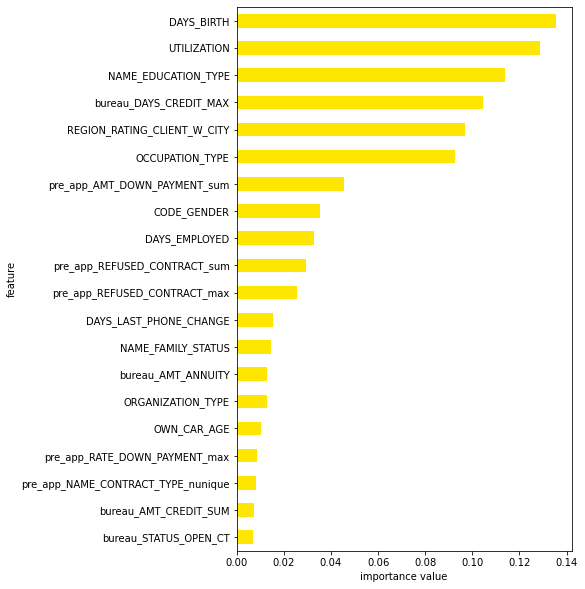

time elapsed: 0.7356545925140381 seconds


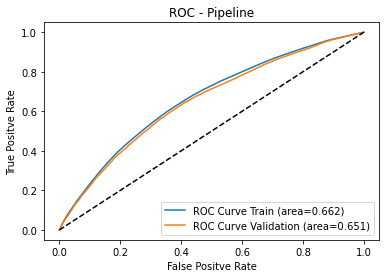

Training:
Pipeline:
KS value:0.2452080684504926

Testing:
Pipeline:
KS value:0.2320075860669661


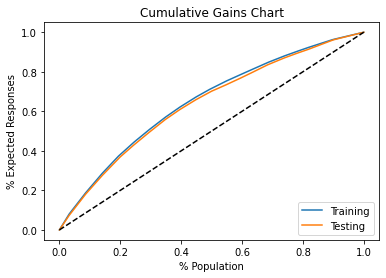

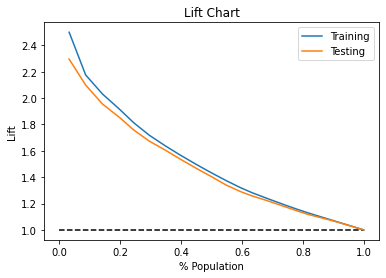

parameters: 8---0.001
#### Parameters for DTree ####
max features: auto
max depth: 8
min sample split: 0.00100
min sample leaf: 0.01000
###########################



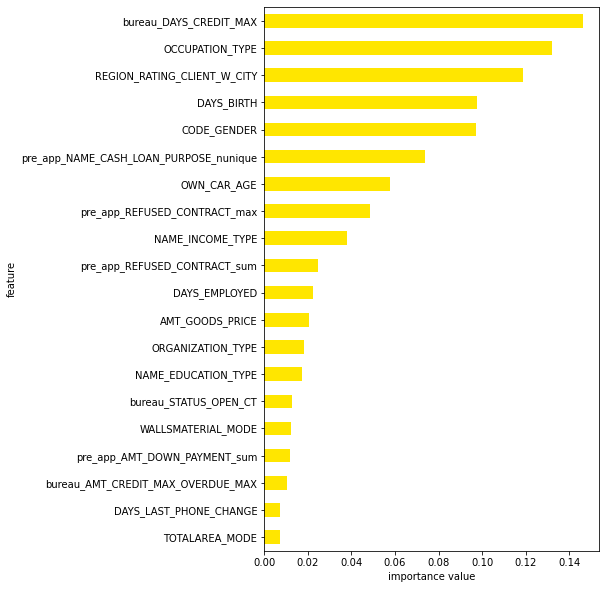

time elapsed: 0.7250156402587891 seconds


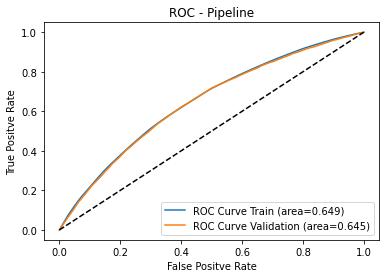

Training:
Pipeline:
KS value:0.21960244926457217

Testing:
Pipeline:
KS value:0.2215343033381682


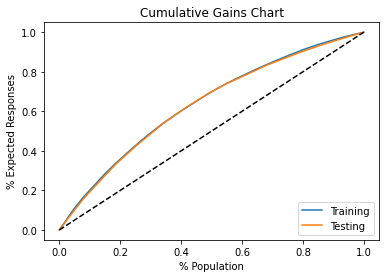

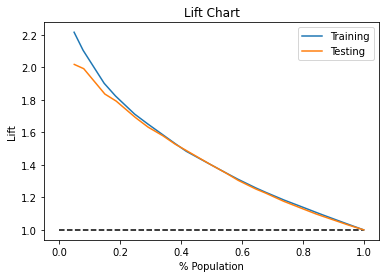

parameters: 8---0.005
#### Parameters for DTree ####
max features: auto
max depth: 8
min sample split: 0.00500
min sample leaf: 0.00100
###########################



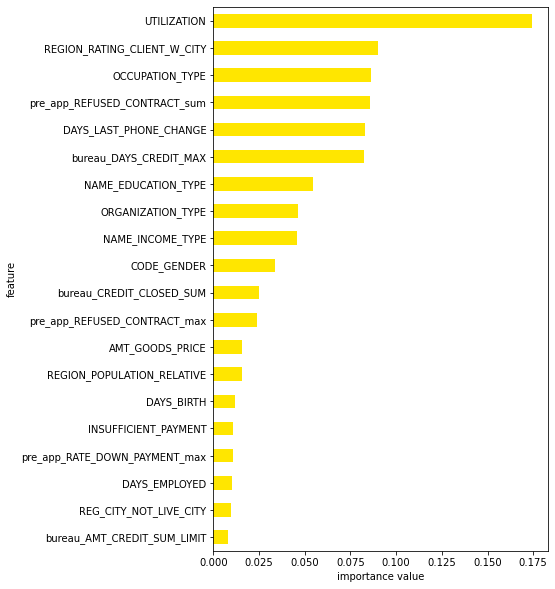

time elapsed: 0.7501628398895264 seconds


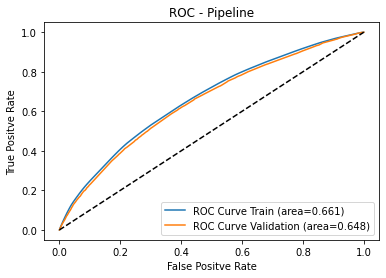

Training:
Pipeline:
KS value:0.23127100143585716

Testing:
Pipeline:
KS value:0.2195869308654304


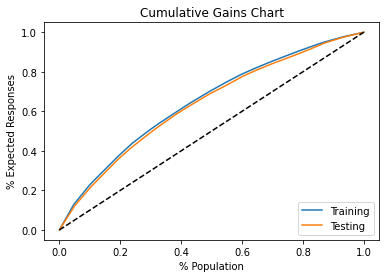

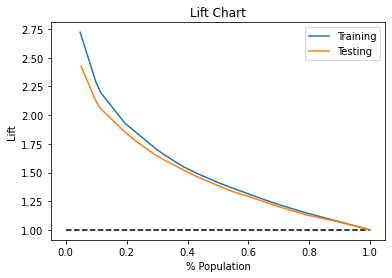

parameters: 8---0.005
#### Parameters for DTree ####
max features: auto
max depth: 8
min sample split: 0.00500
min sample leaf: 0.00500
###########################



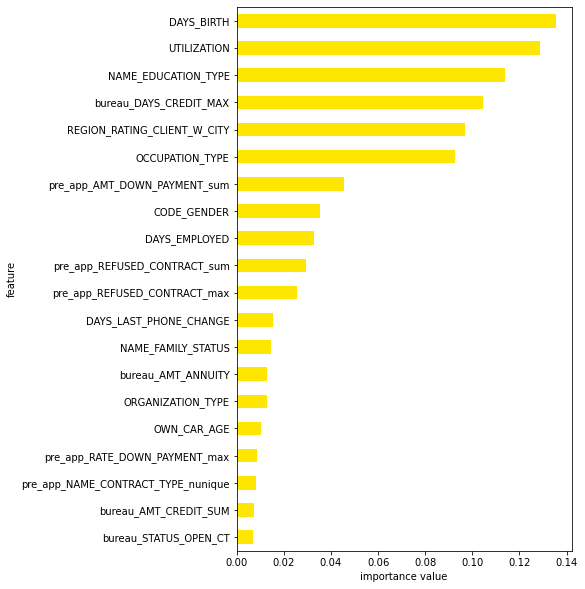

time elapsed: 0.7793140411376953 seconds


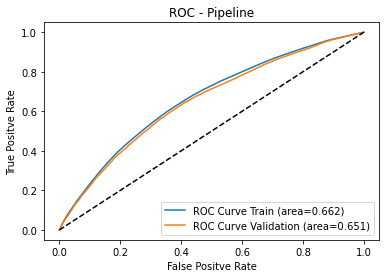

Training:
Pipeline:
KS value:0.2452080684504926

Testing:
Pipeline:
KS value:0.2320075860669661


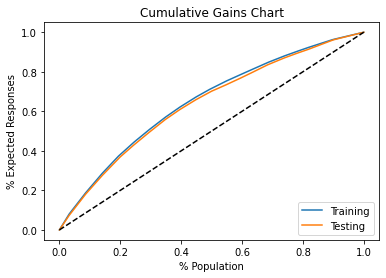

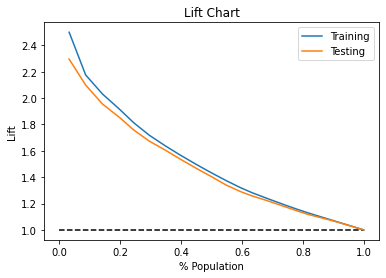

parameters: 8---0.005
#### Parameters for DTree ####
max features: auto
max depth: 8
min sample split: 0.00500
min sample leaf: 0.01000
###########################



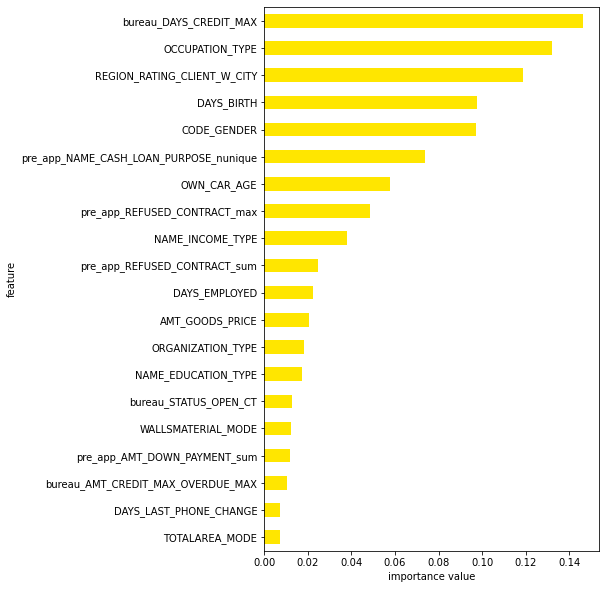

time elapsed: 0.735037088394165 seconds


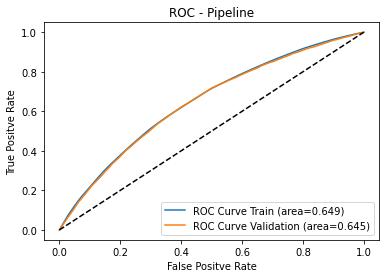

Training:
Pipeline:
KS value:0.21960244926457217

Testing:
Pipeline:
KS value:0.2215343033381682


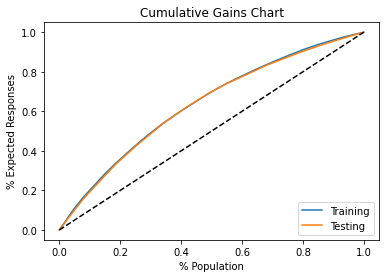

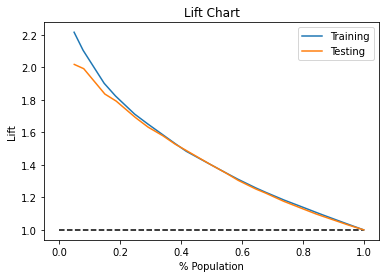

parameters: 10---0.0005
#### Parameters for DTree ####
max features: auto
max depth: 10
min sample split: 0.00050
min sample leaf: 0.00100
###########################



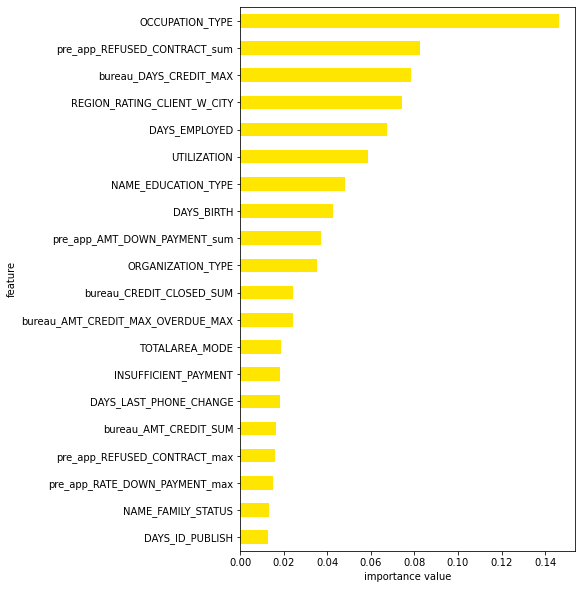

time elapsed: 0.808002233505249 seconds


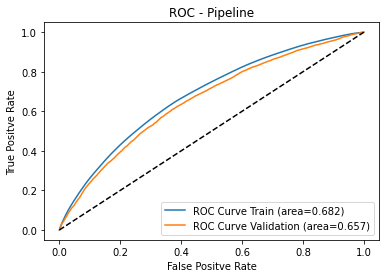

Training:
Pipeline:
KS value:0.26793289933533576

Testing:
Pipeline:
KS value:0.2376625124497505


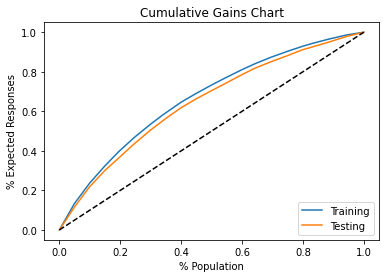

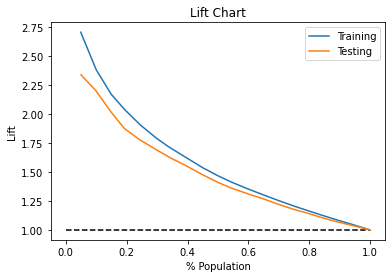

parameters: 10---0.0005
#### Parameters for DTree ####
max features: auto
max depth: 10
min sample split: 0.00050
min sample leaf: 0.00500
###########################



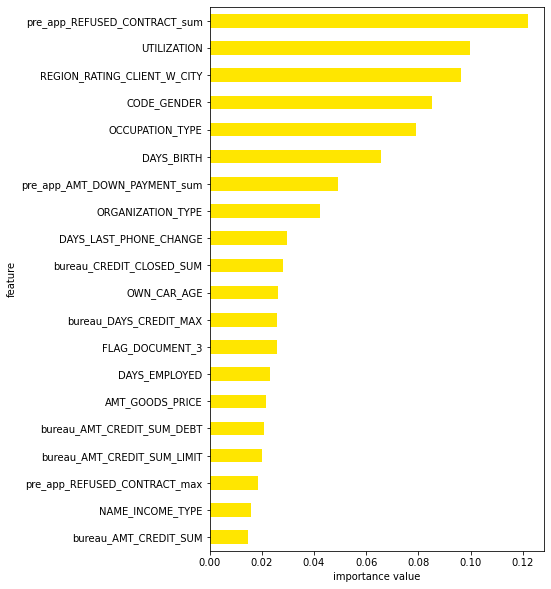

time elapsed: 0.8287026882171631 seconds


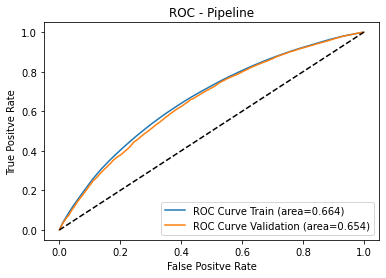

Training:
Pipeline:
KS value:0.24022654027804746

Testing:
Pipeline:
KS value:0.2281148584891592


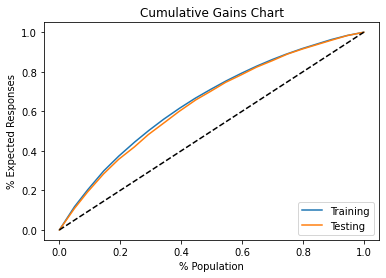

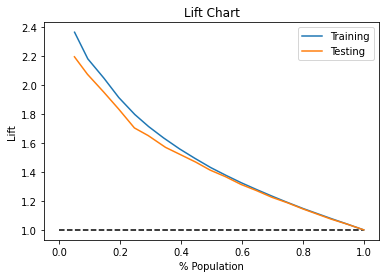

parameters: 10---0.0005
#### Parameters for DTree ####
max features: auto
max depth: 10
min sample split: 0.00050
min sample leaf: 0.01000
###########################



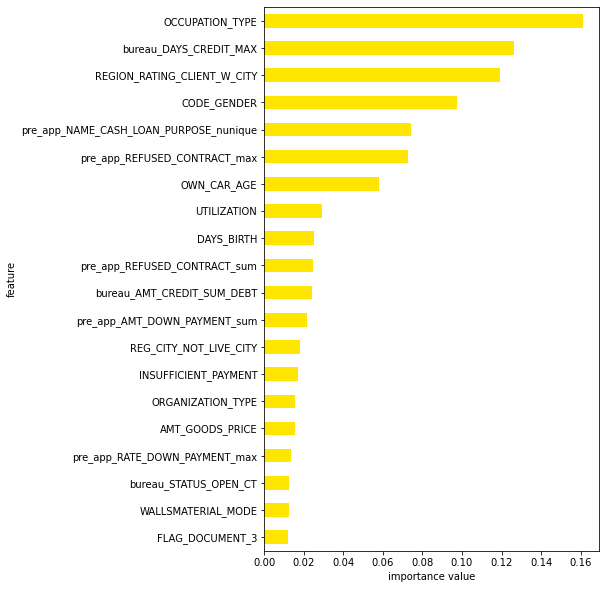

time elapsed: 0.7307202816009521 seconds


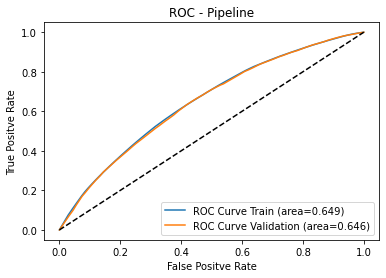

Training:
Pipeline:
KS value:0.21465093824927006

Testing:
Pipeline:
KS value:0.21495891270077455


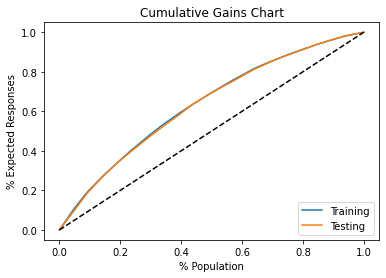

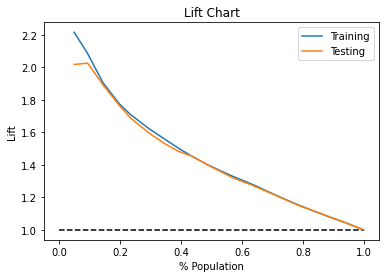

parameters: 10---0.001
#### Parameters for DTree ####
max features: auto
max depth: 10
min sample split: 0.00100
min sample leaf: 0.00100
###########################



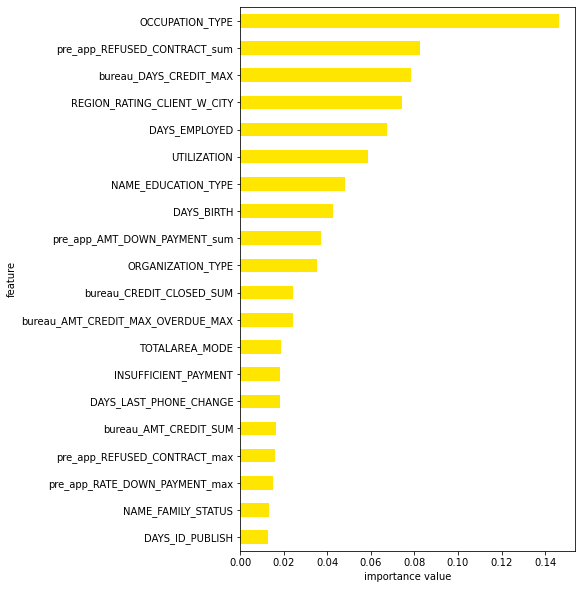

time elapsed: 0.803929328918457 seconds


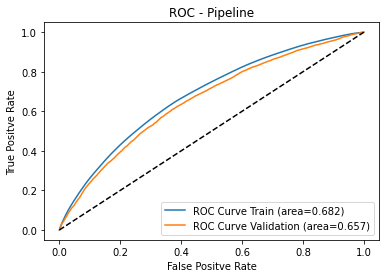

Training:
Pipeline:
KS value:0.26793289933533576

Testing:
Pipeline:
KS value:0.2376625124497505


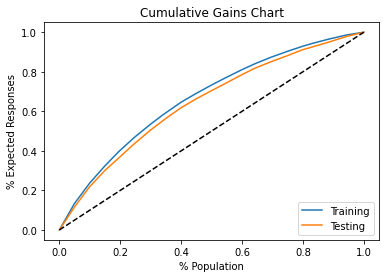

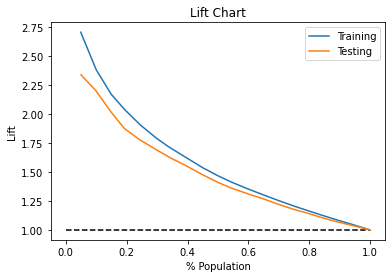

parameters: 10---0.001
#### Parameters for DTree ####
max features: auto
max depth: 10
min sample split: 0.00100
min sample leaf: 0.00500
###########################



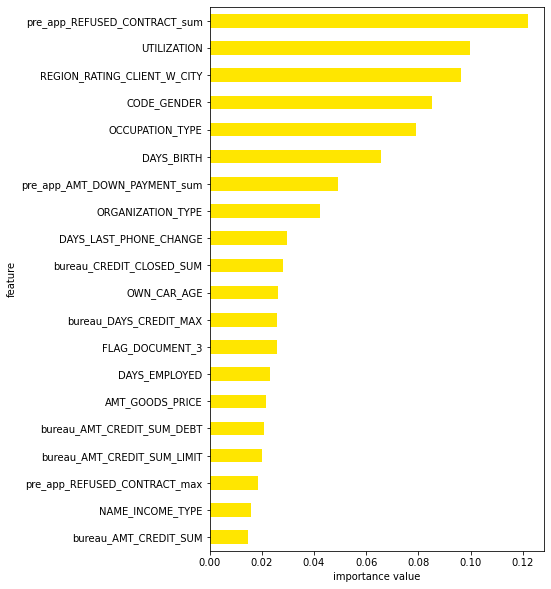

time elapsed: 0.8203408718109131 seconds


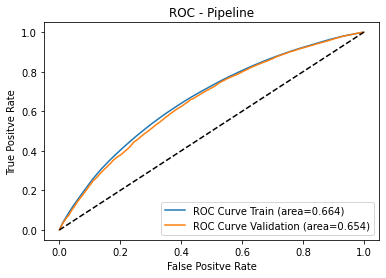

Training:
Pipeline:
KS value:0.24022654027804746

Testing:
Pipeline:
KS value:0.2281148584891592


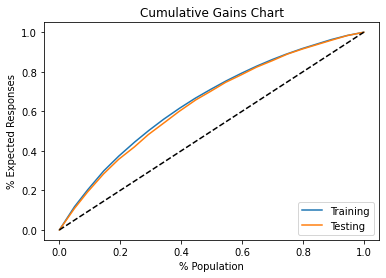

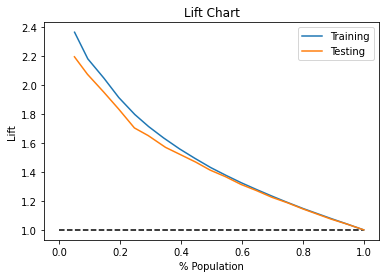

parameters: 10---0.001
#### Parameters for DTree ####
max features: auto
max depth: 10
min sample split: 0.00100
min sample leaf: 0.01000
###########################



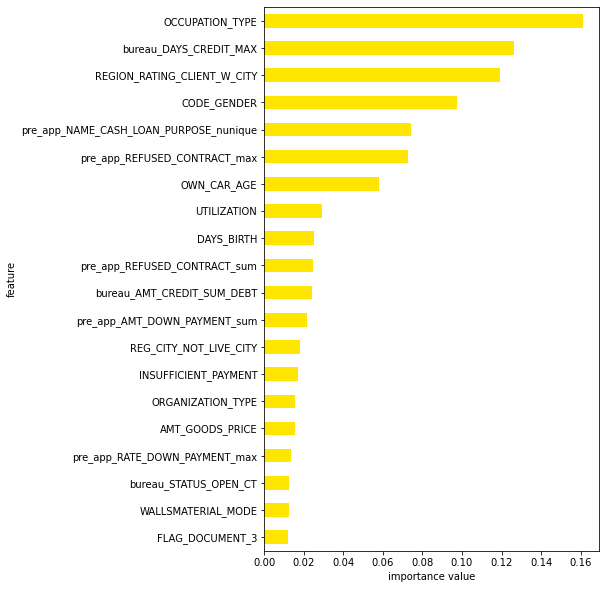

time elapsed: 0.7579128742218018 seconds


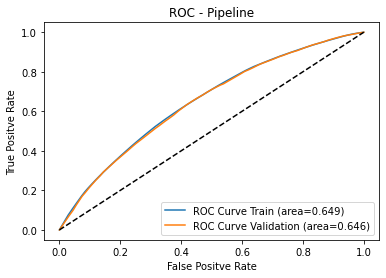

Training:
Pipeline:
KS value:0.21465093824927006

Testing:
Pipeline:
KS value:0.21495891270077455


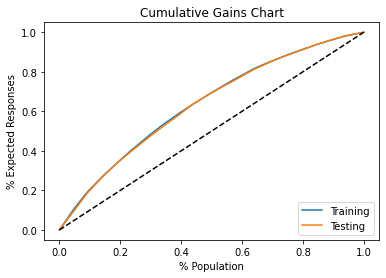

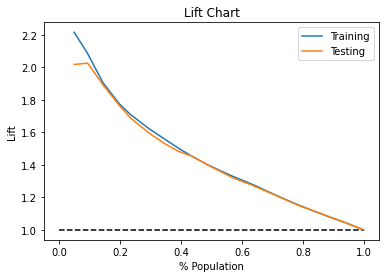

parameters: 10---0.005
#### Parameters for DTree ####
max features: auto
max depth: 10
min sample split: 0.00500
min sample leaf: 0.00100
###########################



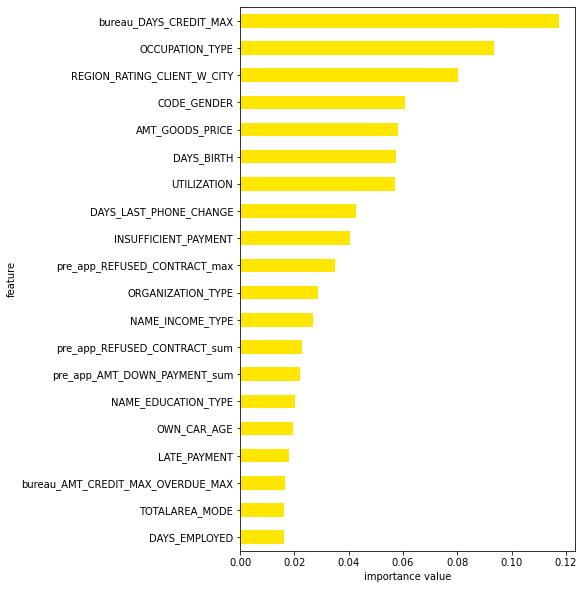

time elapsed: 0.8157229423522949 seconds


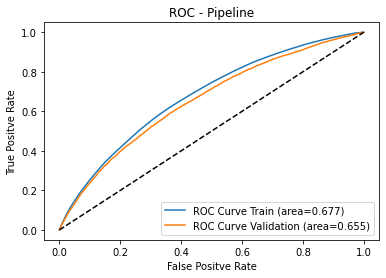

Training:
Pipeline:
KS value:0.2570137449798052

Testing:
Pipeline:
KS value:0.22586174812058962


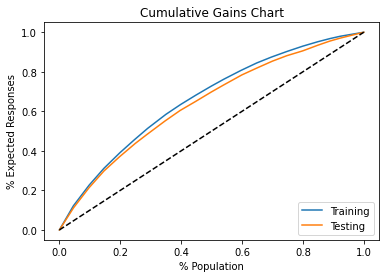

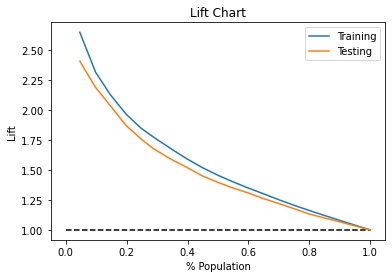

parameters: 10---0.005
#### Parameters for DTree ####
max features: auto
max depth: 10
min sample split: 0.00500
min sample leaf: 0.00500
###########################



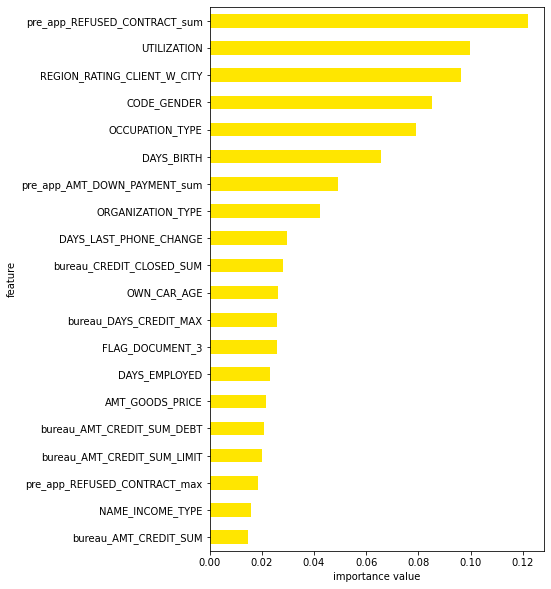

time elapsed: 0.7337396144866943 seconds


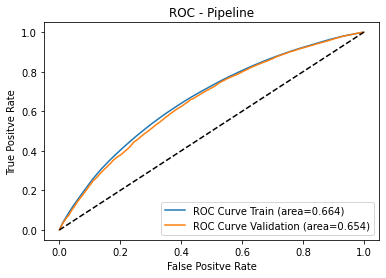

Training:
Pipeline:
KS value:0.24022654027804746

Testing:
Pipeline:
KS value:0.2281148584891592


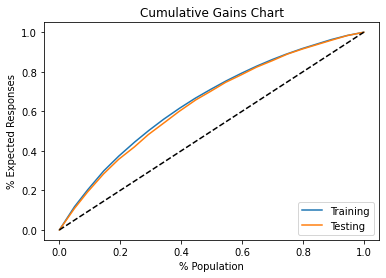

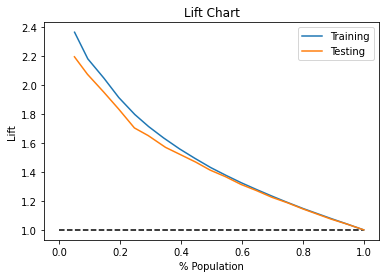

parameters: 10---0.005
#### Parameters for DTree ####
max features: auto
max depth: 10
min sample split: 0.00500
min sample leaf: 0.01000
###########################



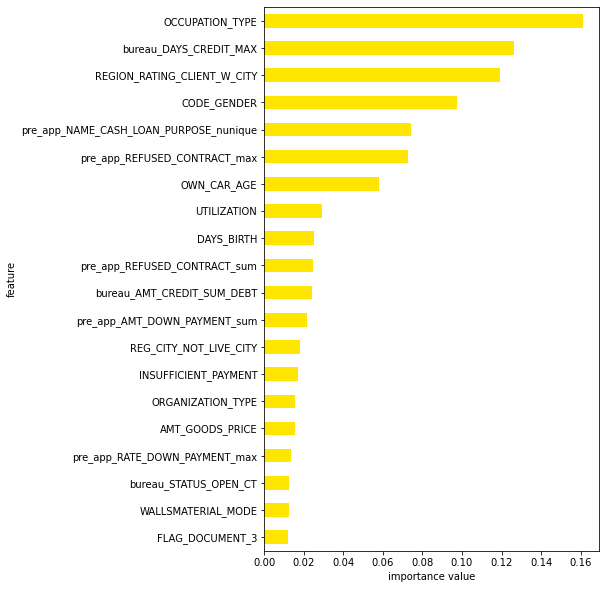

time elapsed: 0.7419970035552979 seconds


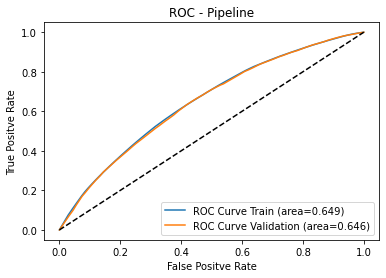

Training:
Pipeline:
KS value:0.21465093824927006

Testing:
Pipeline:
KS value:0.21495891270077455


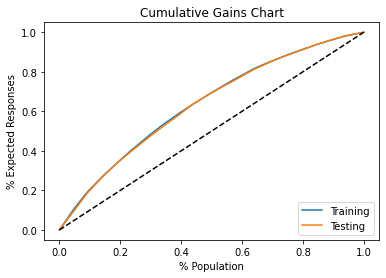

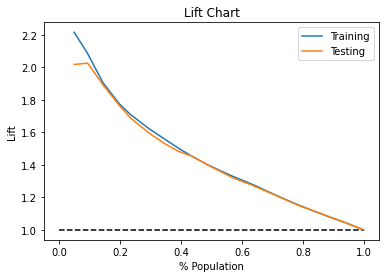

parameters: 12---0.0005
#### Parameters for DTree ####
max features: auto
max depth: 12
min sample split: 0.00050
min sample leaf: 0.00100
###########################



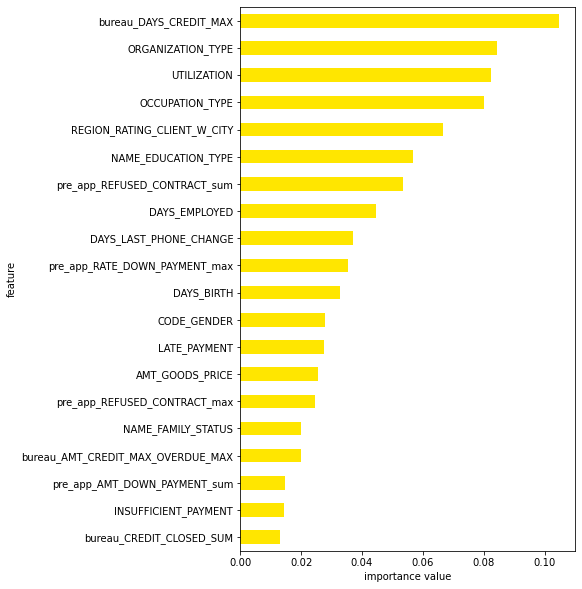

time elapsed: 0.9678807258605957 seconds


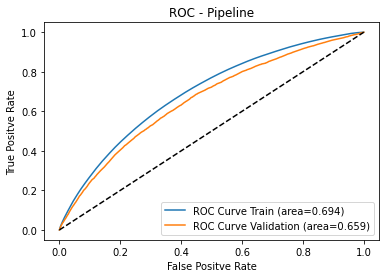

Training:
Pipeline:
KS value:0.283099844966047

Testing:
Pipeline:
KS value:0.23511686151401162


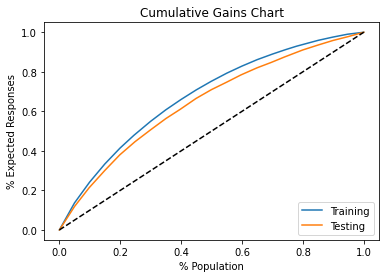

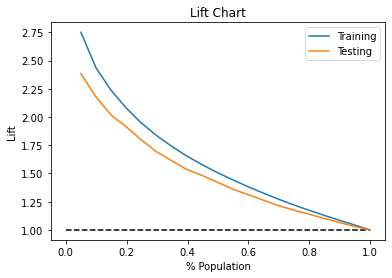

parameters: 12---0.0005
#### Parameters for DTree ####
max features: auto
max depth: 12
min sample split: 0.00050
min sample leaf: 0.00500
###########################



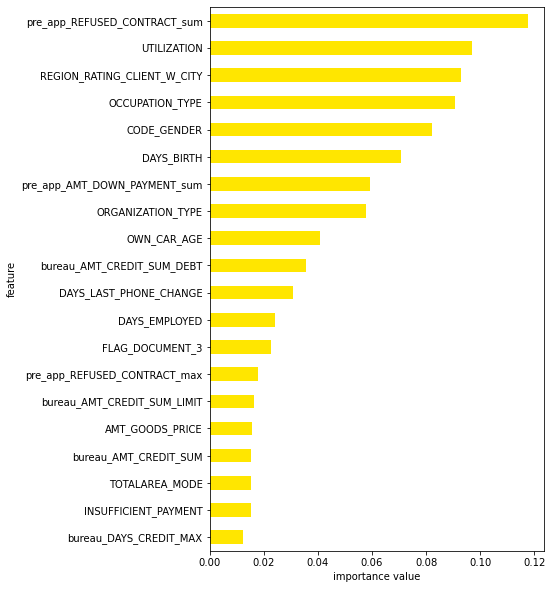

time elapsed: 0.8224492073059082 seconds


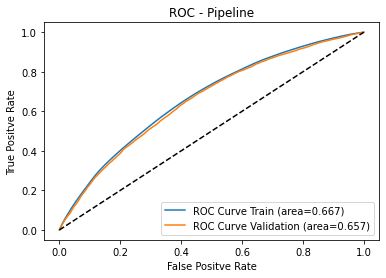

Training:
Pipeline:
KS value:0.24360891529719708

Testing:
Pipeline:
KS value:0.232808478413226


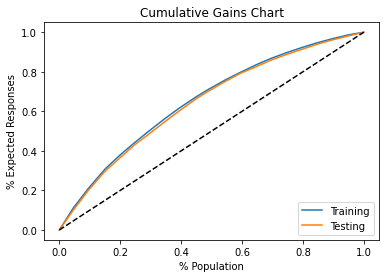

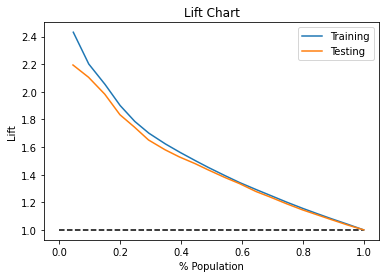

parameters: 12---0.0005
#### Parameters for DTree ####
max features: auto
max depth: 12
min sample split: 0.00050
min sample leaf: 0.01000
###########################



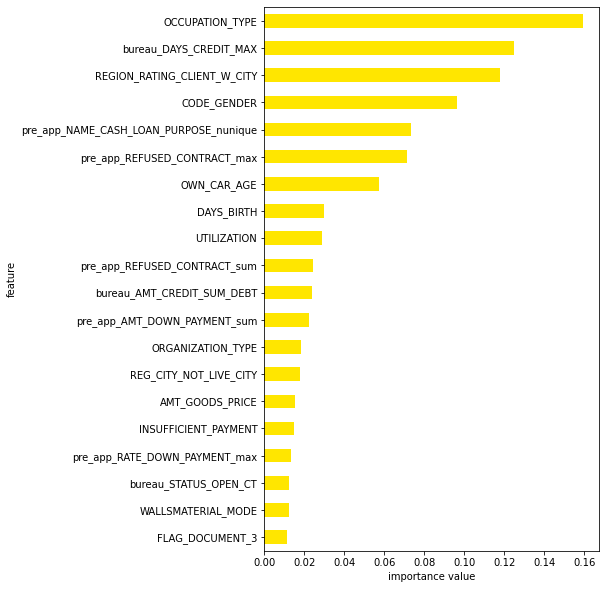

time elapsed: 0.728950023651123 seconds


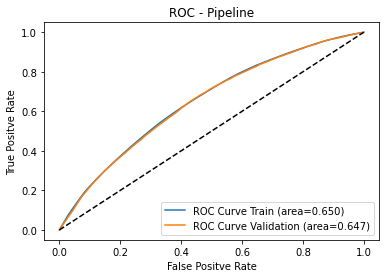

Training:
Pipeline:
KS value:0.21777427132421157

Testing:
Pipeline:
KS value:0.21993249377219887


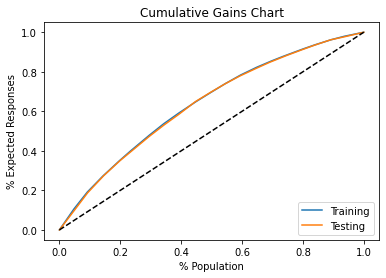

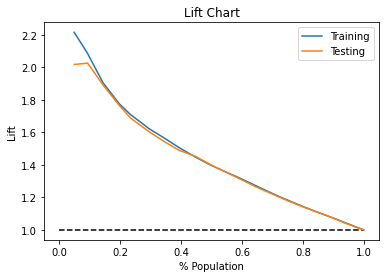

parameters: 12---0.001
#### Parameters for DTree ####
max features: auto
max depth: 12
min sample split: 0.00100
min sample leaf: 0.00100
###########################



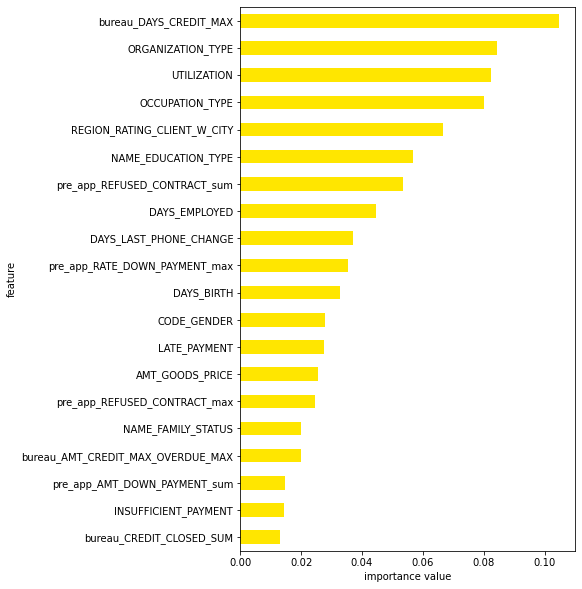

time elapsed: 0.7858397960662842 seconds


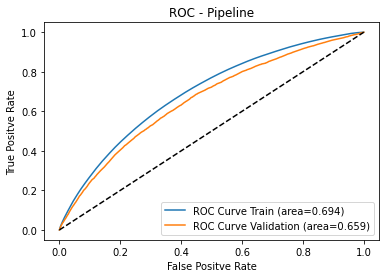

Training:
Pipeline:
KS value:0.283099844966047

Testing:
Pipeline:
KS value:0.23511686151401162


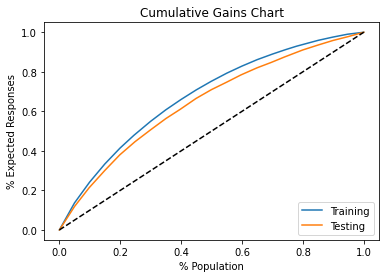

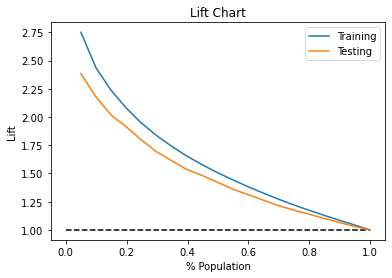

parameters: 12---0.001
#### Parameters for DTree ####
max features: auto
max depth: 12
min sample split: 0.00100
min sample leaf: 0.00500
###########################



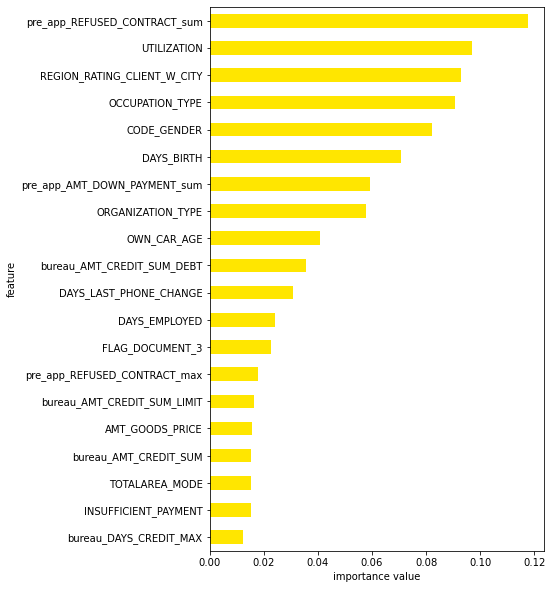

time elapsed: 0.7603845596313477 seconds


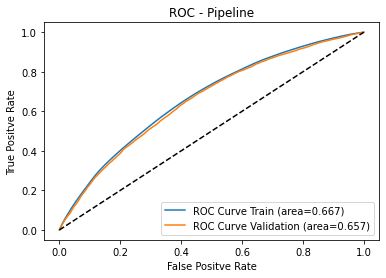

Training:
Pipeline:
KS value:0.24360891529719708

Testing:
Pipeline:
KS value:0.232808478413226


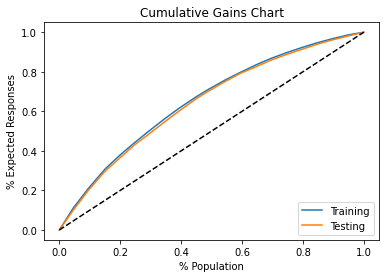

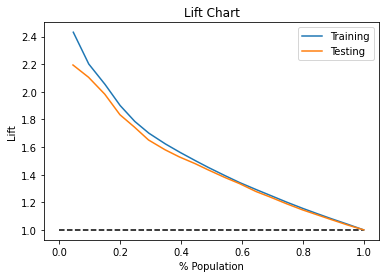

parameters: 12---0.001
#### Parameters for DTree ####
max features: auto
max depth: 12
min sample split: 0.00100
min sample leaf: 0.01000
###########################



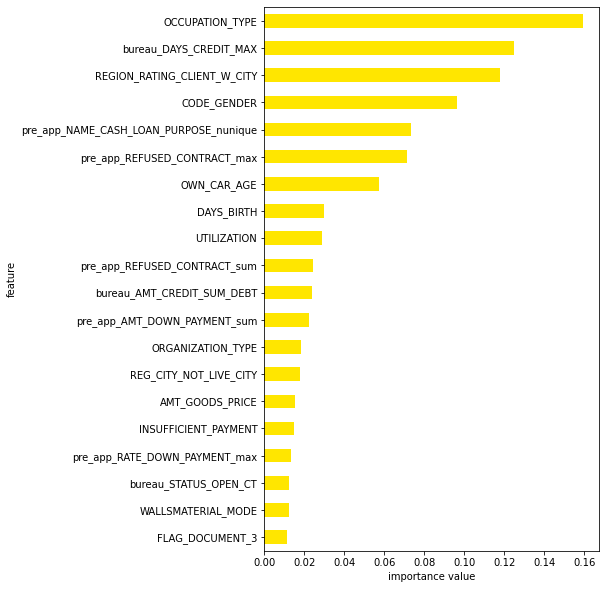

time elapsed: 0.7278587818145752 seconds


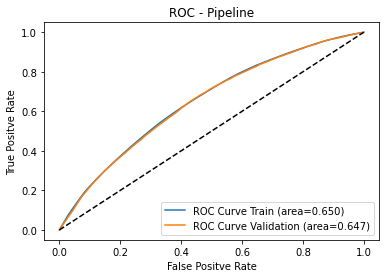

Training:
Pipeline:
KS value:0.21777427132421157

Testing:
Pipeline:
KS value:0.21993249377219887


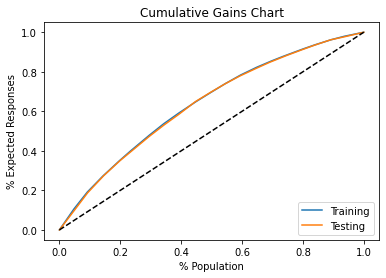

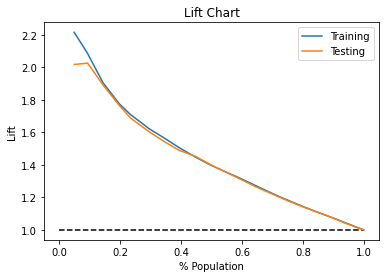

parameters: 12---0.005
#### Parameters for DTree ####
max features: auto
max depth: 12
min sample split: 0.00500
min sample leaf: 0.00100
###########################



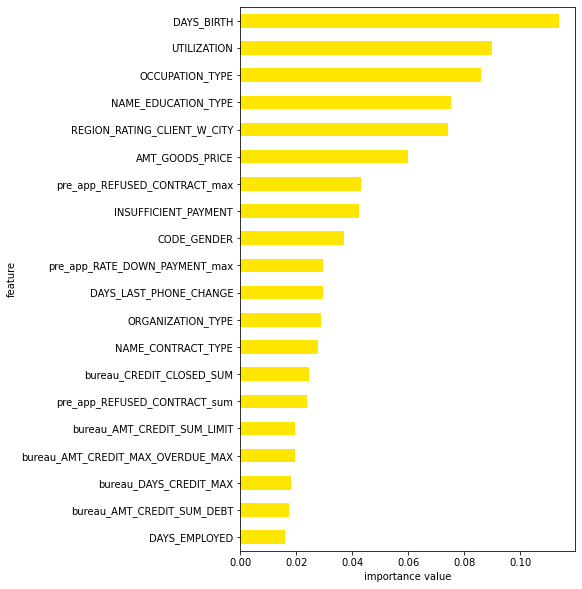

time elapsed: 0.7810678482055664 seconds


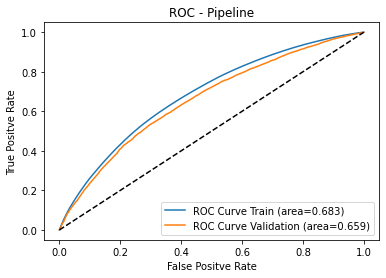

Training:
Pipeline:
KS value:0.26792011245737213

Testing:
Pipeline:
KS value:0.23294502317804894


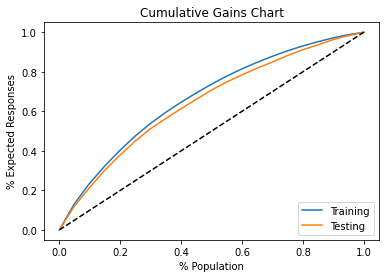

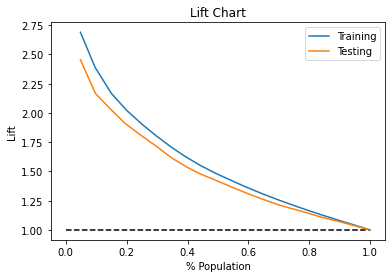

parameters: 12---0.005
#### Parameters for DTree ####
max features: auto
max depth: 12
min sample split: 0.00500
min sample leaf: 0.00500
###########################



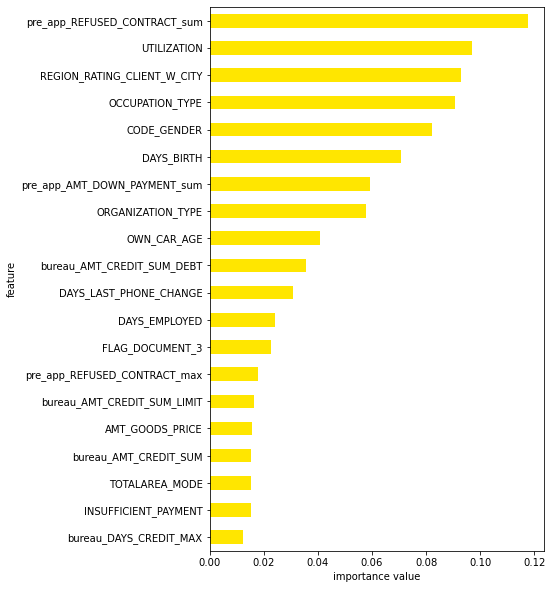

time elapsed: 0.744635820388794 seconds


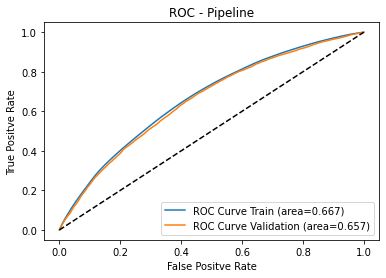

Training:
Pipeline:
KS value:0.24360891529719708

Testing:
Pipeline:
KS value:0.232808478413226


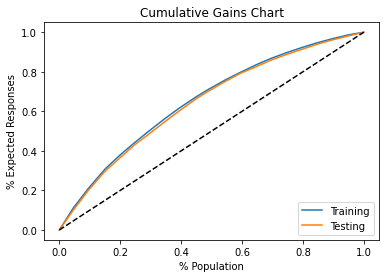

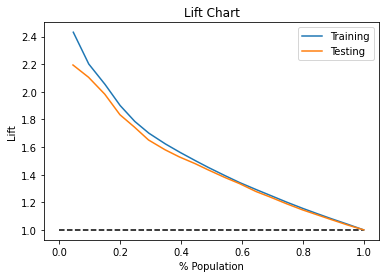

parameters: 12---0.005
#### Parameters for DTree ####
max features: auto
max depth: 12
min sample split: 0.00500
min sample leaf: 0.01000
###########################



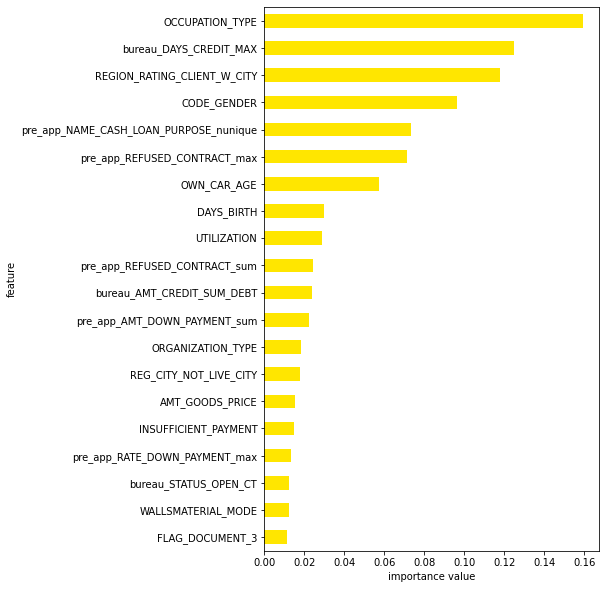

time elapsed: 0.7239596843719482 seconds


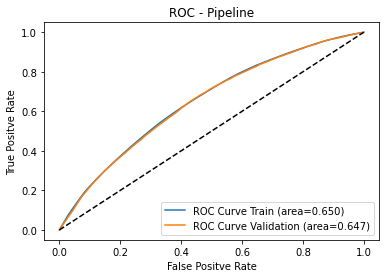

Training:
Pipeline:
KS value:0.21777427132421157

Testing:
Pipeline:
KS value:0.21993249377219887


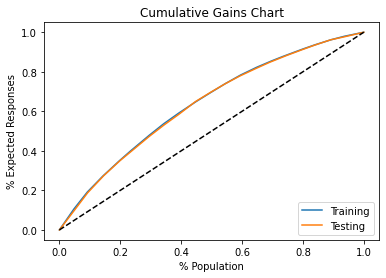

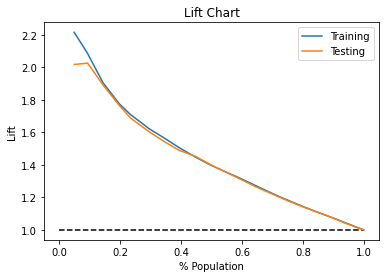

model max_depth min_samples_split min_samples_leaf  \
0   DecisionTree         8            0.0005            0.001   
1   DecisionTree         8            0.0005            0.005   
2   DecisionTree         8            0.0005             0.01   
3   DecisionTree         8             0.001            0.001   
4   DecisionTree         8             0.001            0.005   
5   DecisionTree         8             0.001             0.01   
6   DecisionTree         8             0.005            0.001   
7   DecisionTree         8             0.005            0.005   
8   DecisionTree         8             0.005             0.01   
9   DecisionTree        10            0.0005            0.001   
10  DecisionTree        10            0.0005            0.005   
11  DecisionTree        10            0.0005             0.01   
12  DecisionTree        10             0.001            0.001   
13  DecisionTree        10             0.001            0.005   
14  DecisionTree        10             0.001             0.01   
15  DecisionTree        10             0.005            0.001   
16  DecisionTree        10             0.005            0.005   
17  DecisionTree        10             0.005             0.01   
18  DecisionTree        12            0.0005            0.001   
19  DecisionTree        12            0.0005            0.005   
20  DecisionTree        12            0.0005             0.01   
21  DecisionTree        12             0.001            0.001   
22  DecisionTree        12             0.001            0.005   
23  DecisionTree        12             0.001             0.01   
24  DecisionTree        12             0.005            0.001   
25  DecisionTree        12             0.005            0.005   
26  DecisionTree        12             0.005             0.01   

                  time           auc_train            auc_test  \
0   0.8158977031707764  0.6731856617501242  0.6592069306416218   
1   0.8810591697692871  0.6622772664808233  0.6508510251765023   
2   0.7888197898864746  0.6492017991131902  0.6445934995507095   
3   0.7648146152496338  0.6731856617501242  0.6592069306416218   
4   0.7356545925140381  0.6622772664808233  0.6508510251765023   
5   0.7250156402587891  0.6492017991131902  0.6445934995507095   
6   0.7501628398895264  0.6613139781323759  0.6483220643253901   
7   0.7793140411376953  0.6622772664808233  0.6508510251765023   
8    0.735037088394165  0.6492017991131902  0.6445934995507095   
9    0.808002233505249    0.68150484070098  0.6571116455830668   
10  0.8287026882171631   0.663594165433051  0.6535641425022021   
11  0.7307202816009521  0.6490683701314748  0.6459980351702931   
12   0.803929328918457    0.68150484070098  0.6571116455830668   
13  0.8203408718109131   0.663594165433051  0.6535641425022021   
14  0.7579128742218018  0.6490683701314748  0.6459980351702931   
15  0.8157229423522949  0.6769889101087225  0.6547608231408876   
16  0.7337396144866943   0.663594165433051  0.6535641425022021   
17  0.7419970035552979  0.6490683701314748  0.6459980351702931   
18  0.9678807258605957  0.6938237589507175  0.6585296606485957   
19  0.8224492073059082  0.6671537242889667  0.6573076457470116   
20   0.728950023651123  0.6504061290450258  0.6473651441031254   
21  0.7858397960662842  0.6938237589507175  0.6585296606485957   
22  0.7603845596313477  0.6671537242889667  0.6573076457470116   
23  0.7278587818145752  0.6504061290450258  0.6473651441031254   
24  0.7810678482055664  0.6833467847432492  0.6588559917969353   
25   0.744635820388794  0.6671537242889667  0.6573076457470116   
26  0.7239596843719482  0.6504061290450258  0.6473651441031254   

               ks_train              ks_test  
0   0.25565625909131323  0.24189418397849582  
1    0.2452080684504926   0.2320075860669661  
2   0.21960244926457217   0.2215343033381682  
3   0.25565625909131323  0.24189418397849582  
4    0.2452080684504926   0.2320075860669661  
5   0.21960244926457217   0.2215343033381682  
6   0.231271

In [10]:
df_para_tuning_dtree = pd.DataFrame(columns=['model', 'max_depth', 'min_samples_split', 'min_samples_leaf',
                                             'time', 'auc_train', 'auc_test', 'ks_train', 'ks_test'])
for max_depth_val in [8,10,12]:
    for min_sample_split_val in [0.0005, 0.001, 0.005]:
        for min_samples_leaf_val in [0.001, 0.005, 0.01]:
            print ('parameters: ' + str(max_depth_val) + '---' + str(min_sample_split_val))

            model_temp, df_importance_temp, time_temp = MLM.my_sklearn_dtree(X_train, y_train, 
                                                                             param = {"max_features":"auto", 
                                                                                      "max_depth":max_depth_val, 
                                                                                      "min_samples_split":min_sample_split_val,
                                                                                      "min_samples_leaf":min_samples_leaf_val,
                                                                                      "random_state":66})
            ls_roc_temp = SF.plot_roc(model_temp, X_train, X_test, y_train, y_test)
            ls_ks_temp, ls_df_lift_temp = SF.plot_gain_lift(model_temp, X_train, X_test, y_train, y_test, num_bins=21)
            
            df_para_tuning_temp = np.array(['DecisionTree', max_depth_val, min_sample_split_val, min_samples_leaf_val,
                                            time_temp, ls_roc_temp[0], ls_roc_temp[1], ls_ks_temp[0], ls_ks_temp[1]])
            df_para_tuning_dtree.loc[len(df_para_tuning_dtree)] = df_para_tuning_temp

            print ('='*50)

df_para_tuning_dtree

### Parameter Tuning - Random Forest

parameters: 8---0.0005
#### Parameters for RF ####
n estimators: 100
max features: 0.8
max depth: 8
min sample split: 0.00050
min sample leaf: 0.00100
min_impurity_decrease: 0.00000
###########################



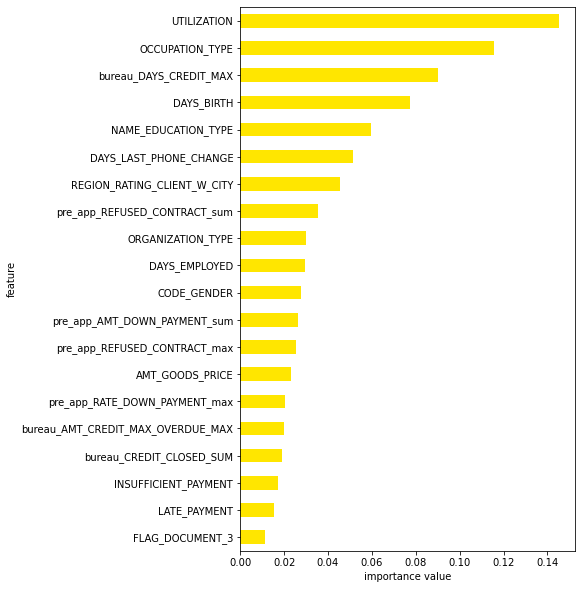

time elapsed: 36.00045871734619 seconds


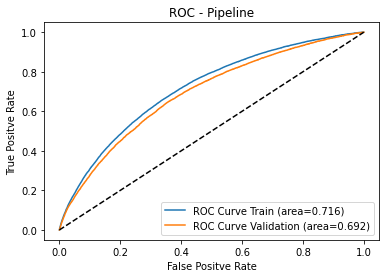

Training:
Pipeline:
KS value:0.3182503599774636

Testing:
Pipeline:
KS value:0.28758743076416415


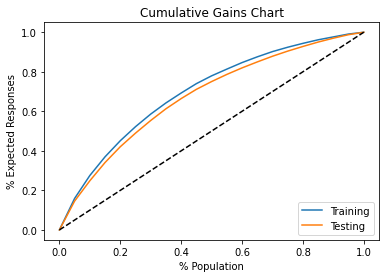

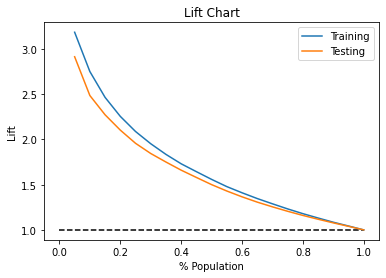

parameters: 8---0.0005
#### Parameters for RF ####
n estimators: 100
max features: 0.8
max depth: 8
min sample split: 0.00050
min sample leaf: 0.00500
min_impurity_decrease: 0.00000
###########################



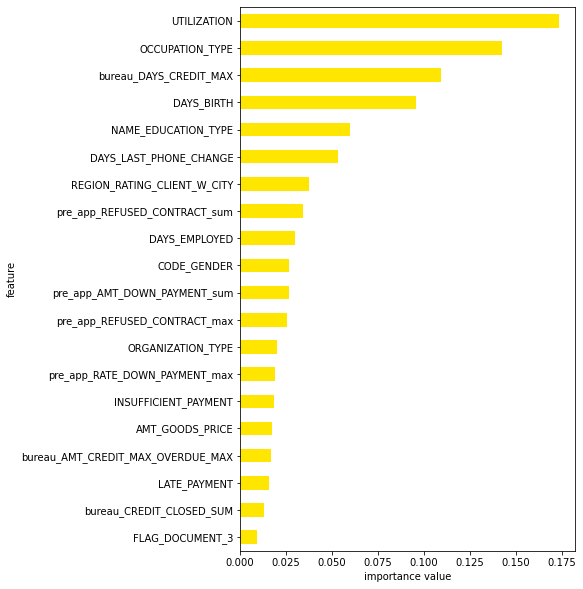

time elapsed: 33.52753686904907 seconds


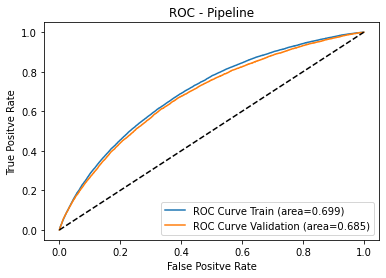

Training:
Pipeline:
KS value:0.29124554513602485

Testing:
Pipeline:
KS value:0.2762952577846867


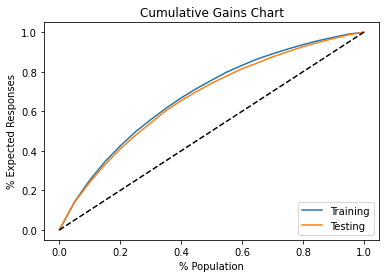

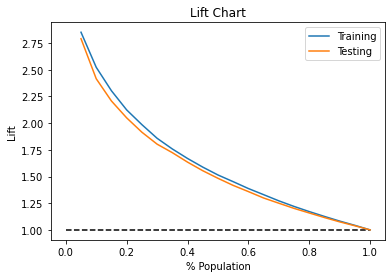

parameters: 8---0.0005
#### Parameters for RF ####
n estimators: 100
max features: 0.8
max depth: 8
min sample split: 0.00050
min sample leaf: 0.01000
min_impurity_decrease: 0.00000
###########################



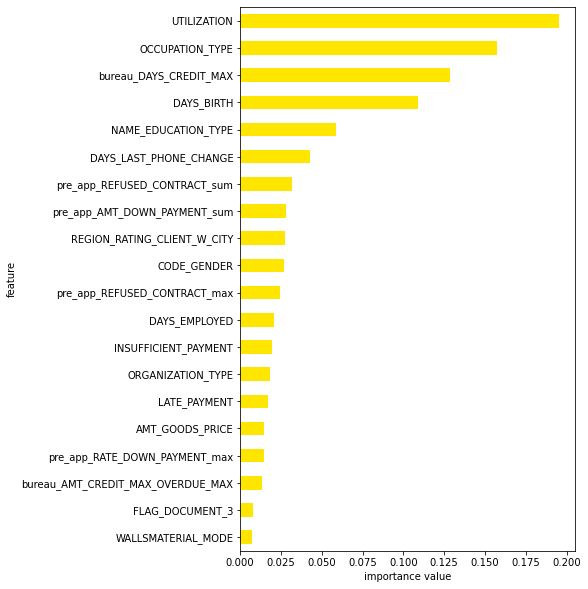

time elapsed: 28.11454939842224 seconds


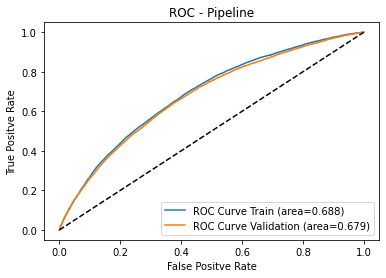

Training:
Pipeline:
KS value:0.2745848461392512

Testing:
Pipeline:
KS value:0.26580017936846634


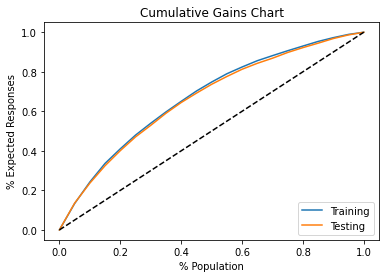

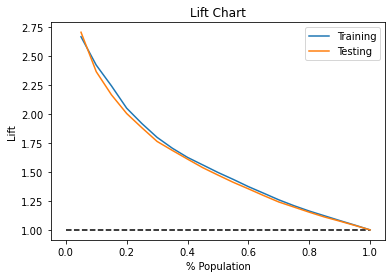

parameters: 8---0.001
#### Parameters for RF ####
n estimators: 100
max features: 0.8
max depth: 8
min sample split: 0.00100
min sample leaf: 0.00100
min_impurity_decrease: 0.00000
###########################



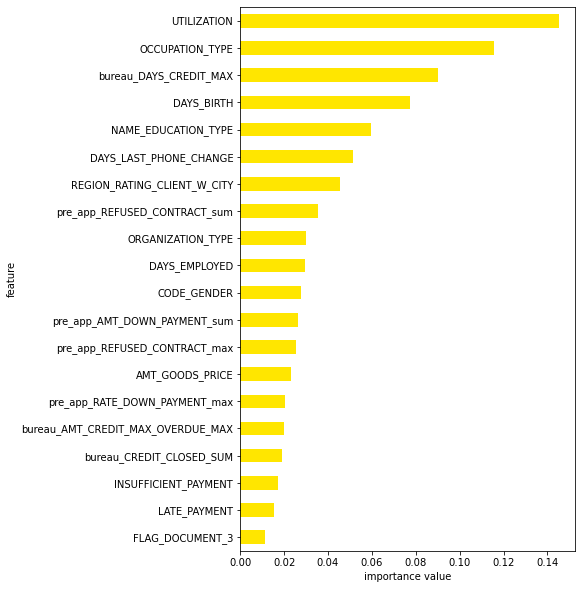

time elapsed: 35.477399587631226 seconds


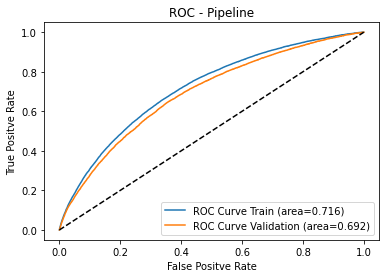

Training:
Pipeline:
KS value:0.3182503599774636

Testing:
Pipeline:
KS value:0.28758743076416415


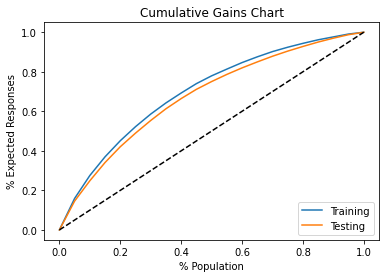

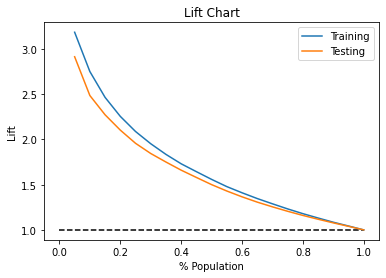

parameters: 8---0.001
#### Parameters for RF ####
n estimators: 100
max features: 0.8
max depth: 8
min sample split: 0.00100
min sample leaf: 0.00500
min_impurity_decrease: 0.00000
###########################



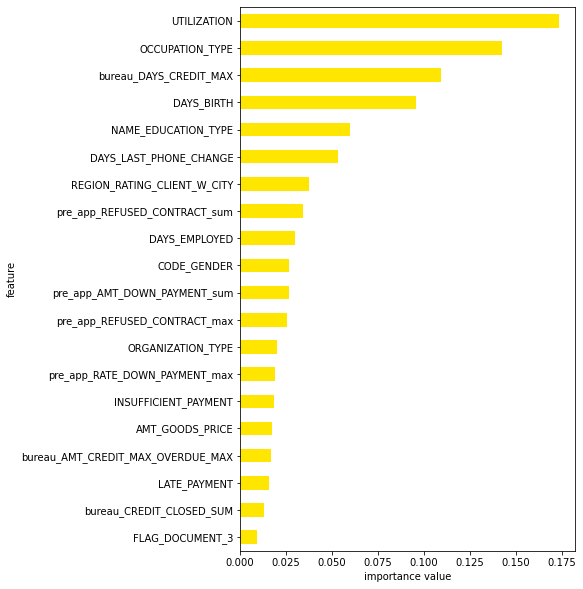

time elapsed: 33.3321647644043 seconds


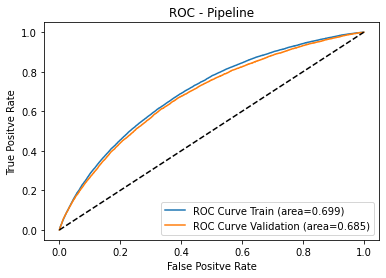

Training:
Pipeline:
KS value:0.29124554513602485

Testing:
Pipeline:
KS value:0.2762952577846867


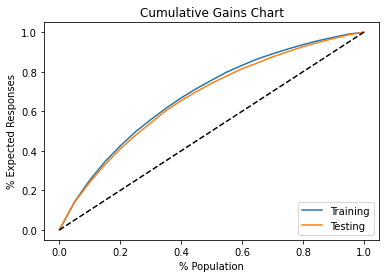

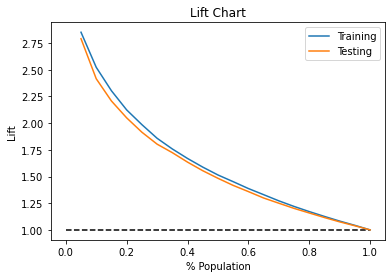

parameters: 8---0.001
#### Parameters for RF ####
n estimators: 100
max features: 0.8
max depth: 8
min sample split: 0.00100
min sample leaf: 0.01000
min_impurity_decrease: 0.00000
###########################



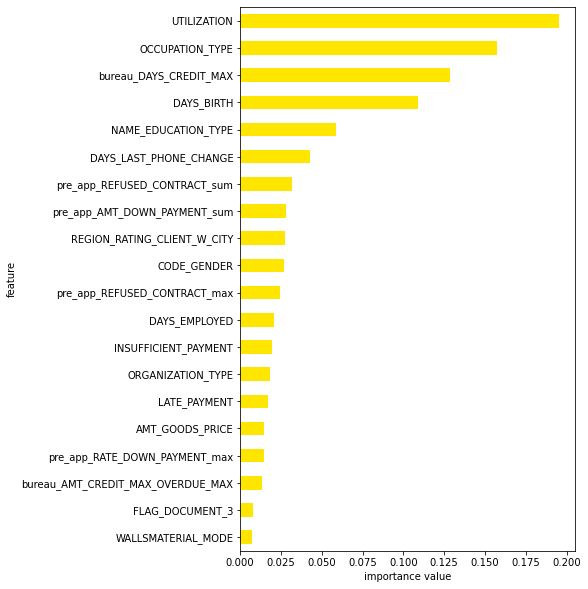

time elapsed: 28.10623073577881 seconds


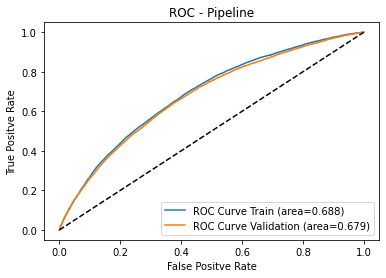

Training:
Pipeline:
KS value:0.2745848461392512

Testing:
Pipeline:
KS value:0.26580017936846634


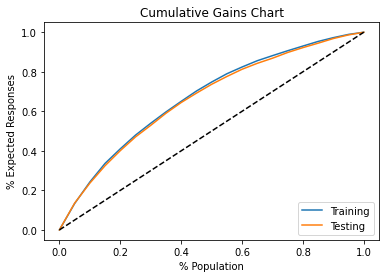

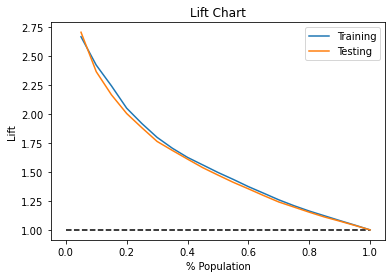

parameters: 8---0.005
#### Parameters for RF ####
n estimators: 100
max features: 0.8
max depth: 8
min sample split: 0.00500
min sample leaf: 0.00100
min_impurity_decrease: 0.00000
###########################



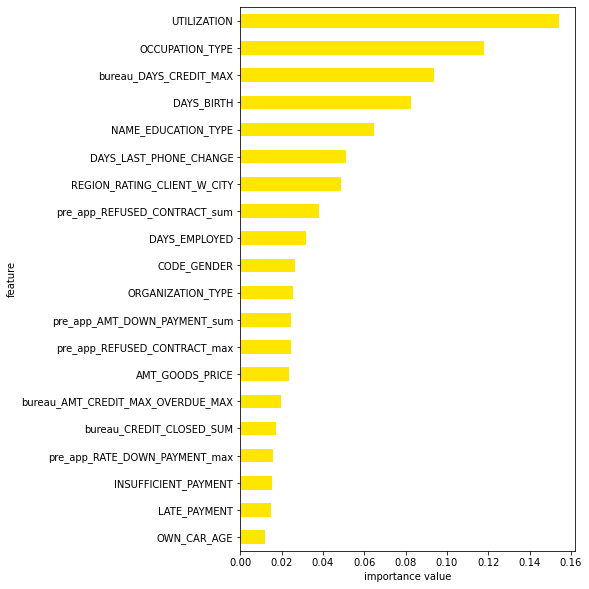

time elapsed: 34.23559260368347 seconds


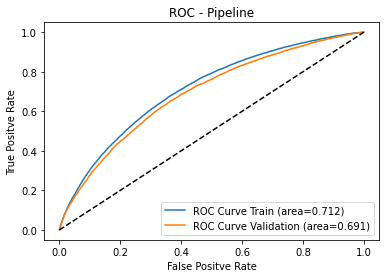

Training:
Pipeline:
KS value:0.312888629185701

Testing:
Pipeline:
KS value:0.2858603925437736


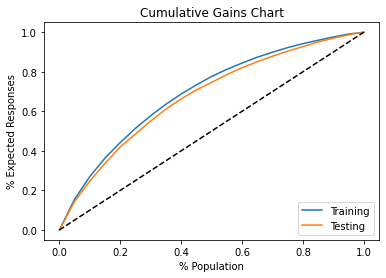

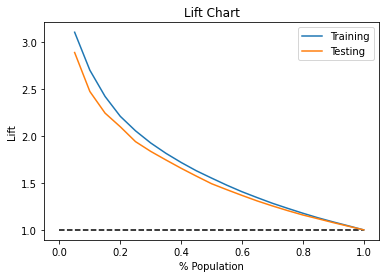

parameters: 8---0.005
#### Parameters for RF ####
n estimators: 100
max features: 0.8
max depth: 8
min sample split: 0.00500
min sample leaf: 0.00500
min_impurity_decrease: 0.00000
###########################



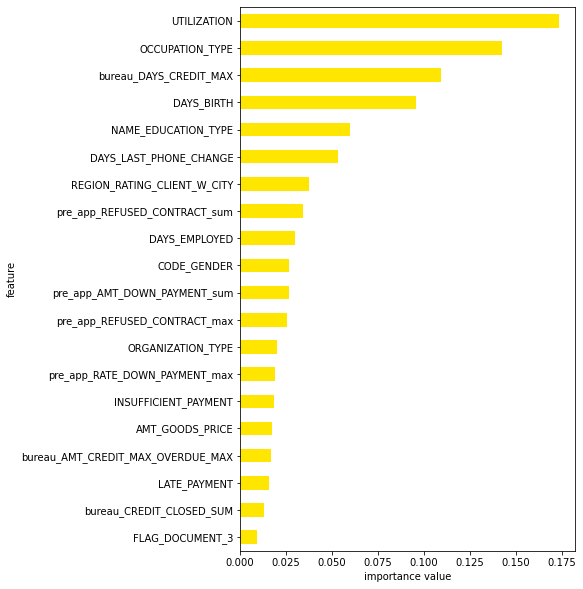

time elapsed: 32.71914625167847 seconds


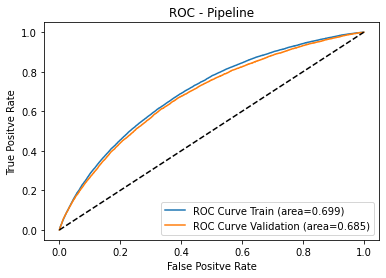

Training:
Pipeline:
KS value:0.29124554513602485

Testing:
Pipeline:
KS value:0.2762952577846867


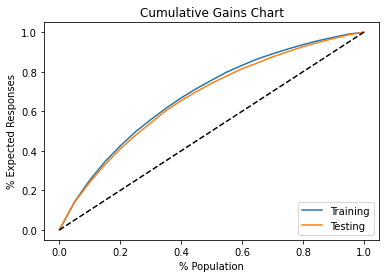

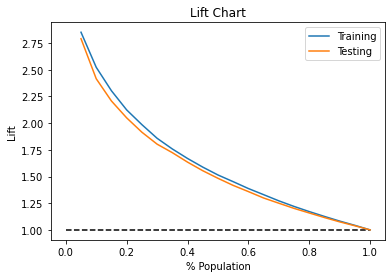

parameters: 8---0.005
#### Parameters for RF ####
n estimators: 100
max features: 0.8
max depth: 8
min sample split: 0.00500
min sample leaf: 0.01000
min_impurity_decrease: 0.00000
###########################



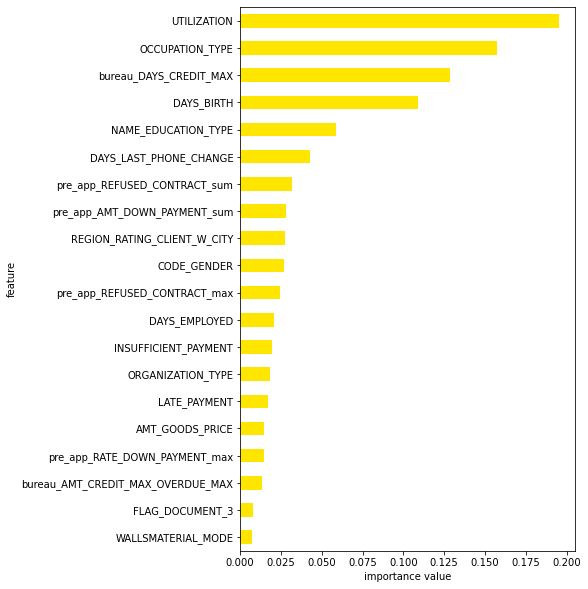

time elapsed: 28.517597675323486 seconds


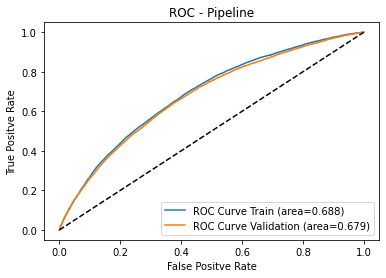

Training:
Pipeline:
KS value:0.2745848461392512

Testing:
Pipeline:
KS value:0.26580017936846634


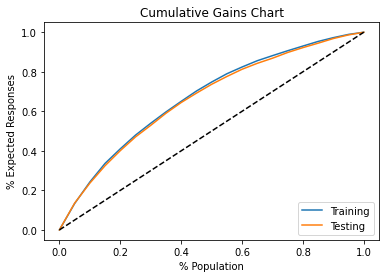

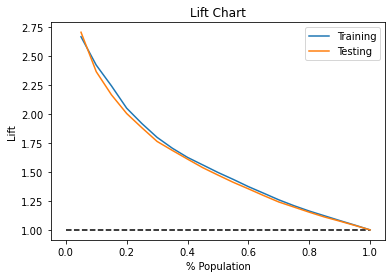

parameters: 10---0.0005
#### Parameters for RF ####
n estimators: 100
max features: 0.8
max depth: 10
min sample split: 0.00050
min sample leaf: 0.00100
min_impurity_decrease: 0.00000
###########################



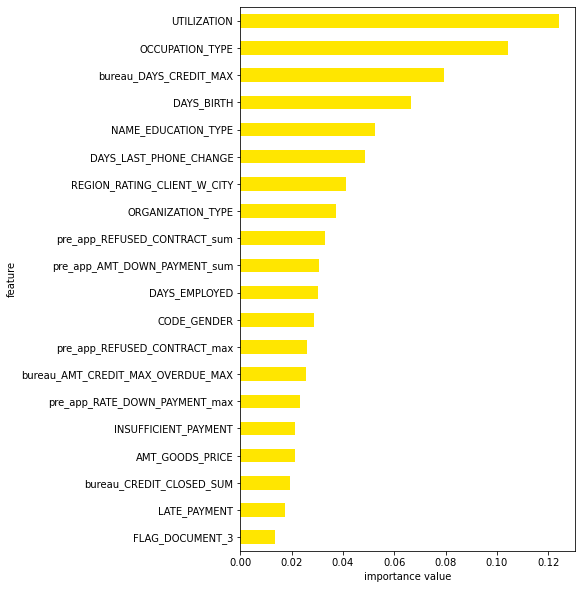

time elapsed: 39.57528519630432 seconds


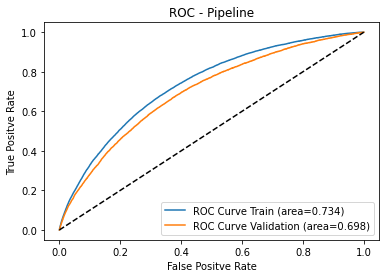

Training:
Pipeline:
KS value:0.3463590570978215

Testing:
Pipeline:
KS value:0.2952926782089841


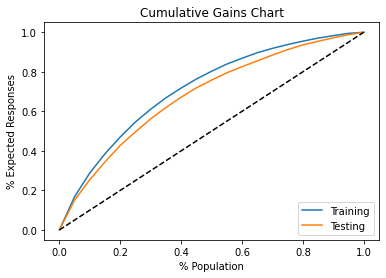

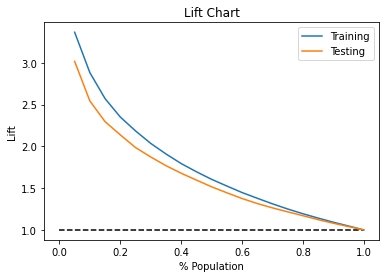

parameters: 10---0.0005
#### Parameters for RF ####
n estimators: 100
max features: 0.8
max depth: 10
min sample split: 0.00050
min sample leaf: 0.00500
min_impurity_decrease: 0.00000
###########################



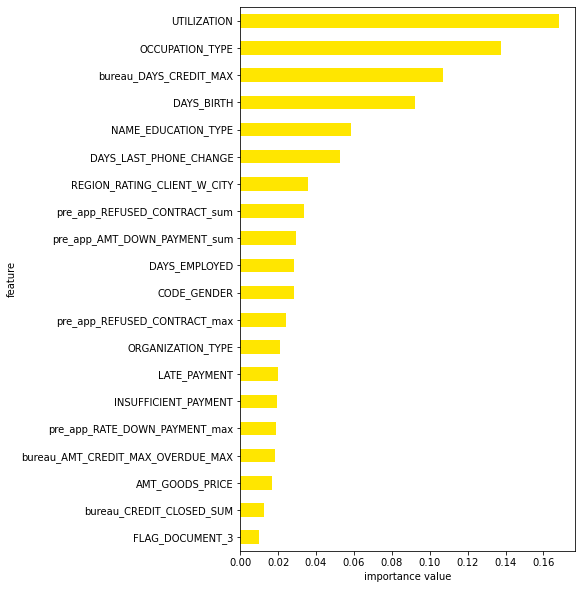

time elapsed: 33.617820739746094 seconds


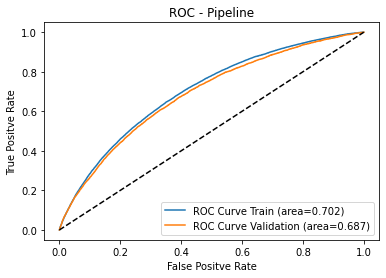

Training:
Pipeline:
KS value:0.29399179749278137

Testing:
Pipeline:
KS value:0.27488759334697965


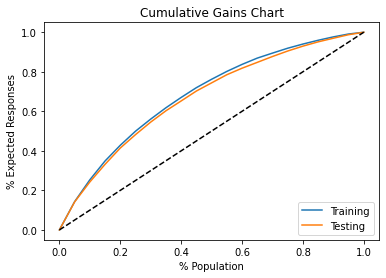

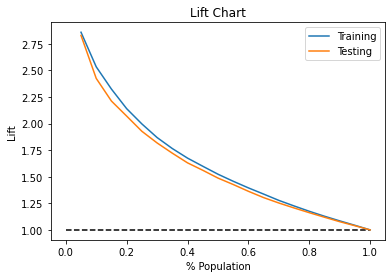

parameters: 10---0.0005
#### Parameters for RF ####
n estimators: 100
max features: 0.8
max depth: 10
min sample split: 0.00050
min sample leaf: 0.01000
min_impurity_decrease: 0.00000
###########################



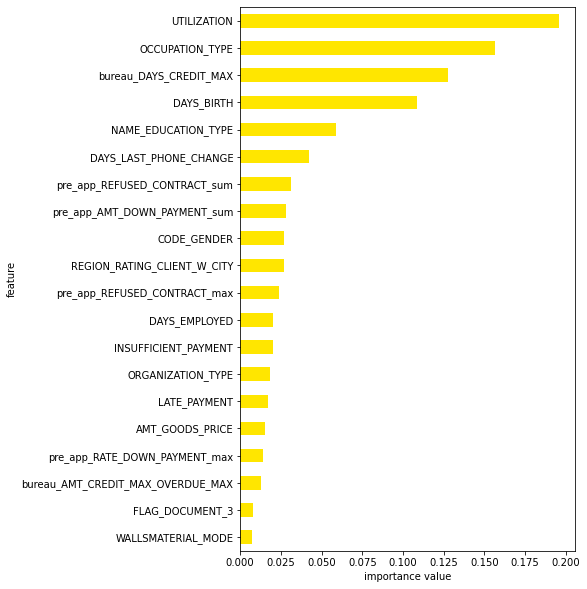

time elapsed: 29.131725788116455 seconds


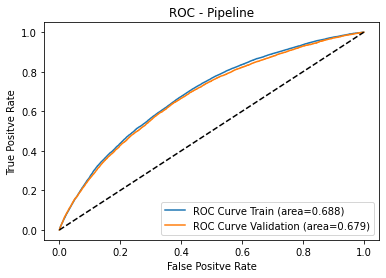

Training:
Pipeline:
KS value:0.2753694896697531

Testing:
Pipeline:
KS value:0.26686297211947624


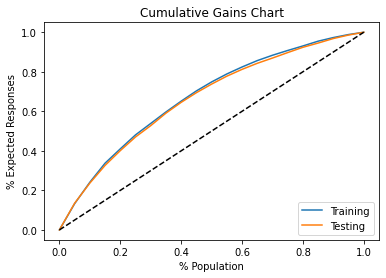

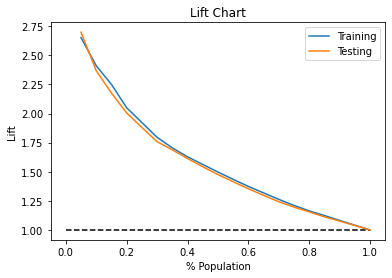

parameters: 10---0.001
#### Parameters for RF ####
n estimators: 100
max features: 0.8
max depth: 10
min sample split: 0.00100
min sample leaf: 0.00100
min_impurity_decrease: 0.00000
###########################



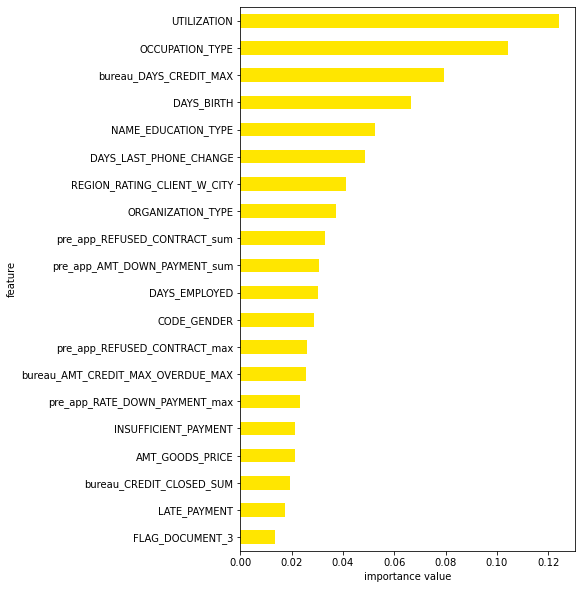

time elapsed: 40.07477641105652 seconds


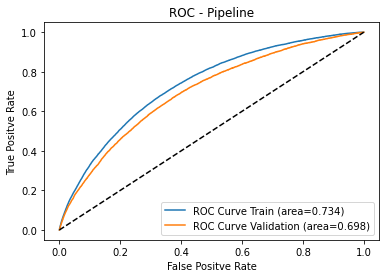

Training:
Pipeline:
KS value:0.3463590570978215

Testing:
Pipeline:
KS value:0.2952926782089841


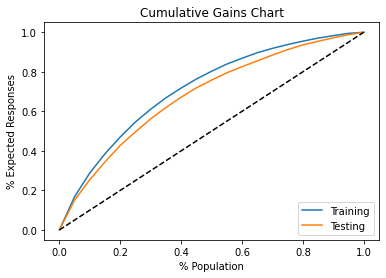

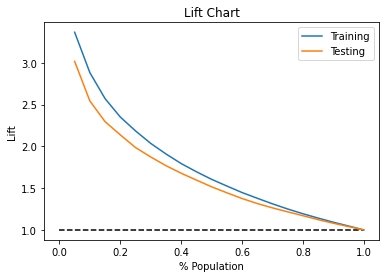

parameters: 10---0.001
#### Parameters for RF ####
n estimators: 100
max features: 0.8
max depth: 10
min sample split: 0.00100
min sample leaf: 0.00500
min_impurity_decrease: 0.00000
###########################



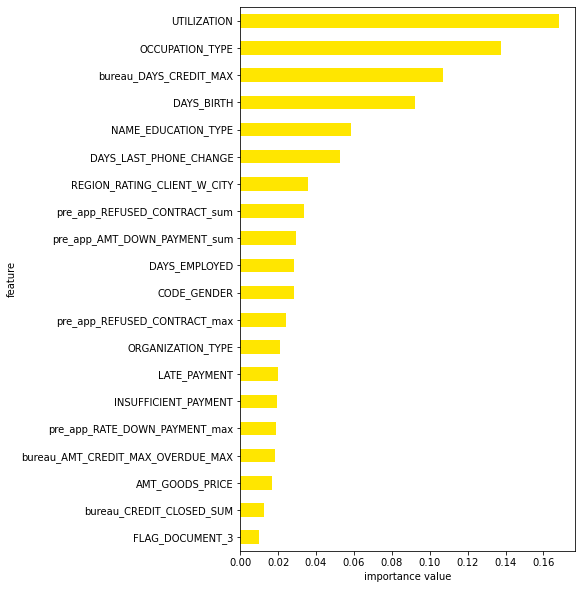

time elapsed: 33.499701261520386 seconds


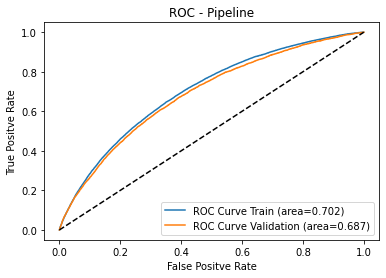

Training:
Pipeline:
KS value:0.29399179749278137

Testing:
Pipeline:
KS value:0.27488759334697965


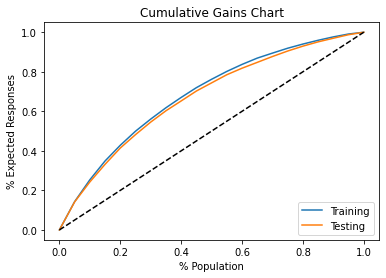

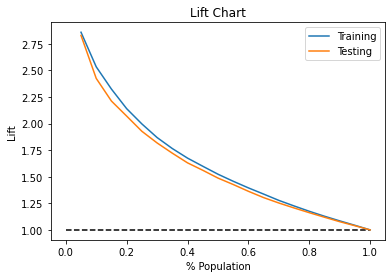

parameters: 10---0.001
#### Parameters for RF ####
n estimators: 100
max features: 0.8
max depth: 10
min sample split: 0.00100
min sample leaf: 0.01000
min_impurity_decrease: 0.00000
###########################



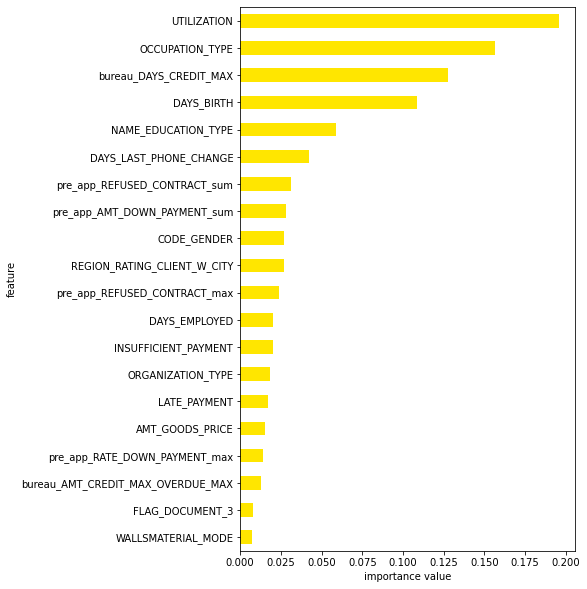

time elapsed: 29.34344482421875 seconds


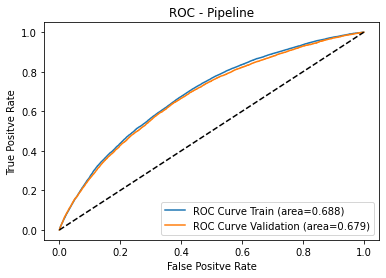

Training:
Pipeline:
KS value:0.2753694896697531

Testing:
Pipeline:
KS value:0.26686297211947624


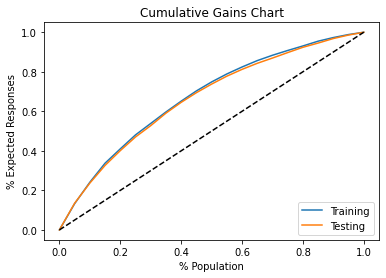

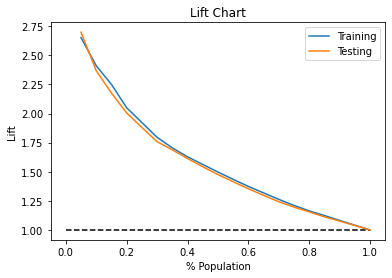

parameters: 10---0.005
#### Parameters for RF ####
n estimators: 100
max features: 0.8
max depth: 10
min sample split: 0.00500
min sample leaf: 0.00100
min_impurity_decrease: 0.00000
###########################



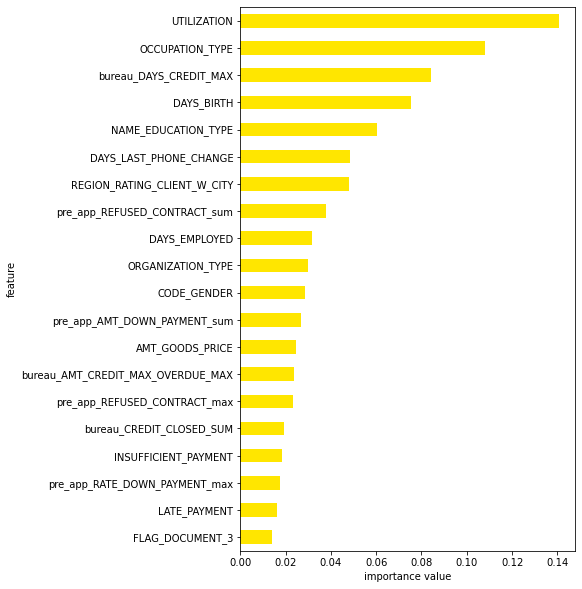

time elapsed: 38.287195444107056 seconds


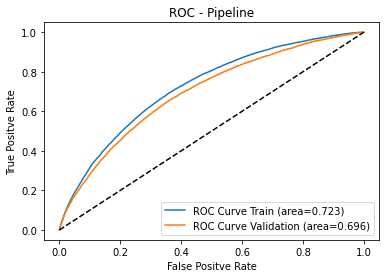

Training:
Pipeline:
KS value:0.3310662043089938

Testing:
Pipeline:
KS value:0.29263569633146


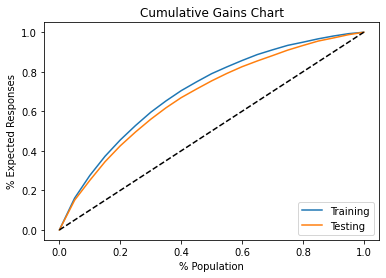

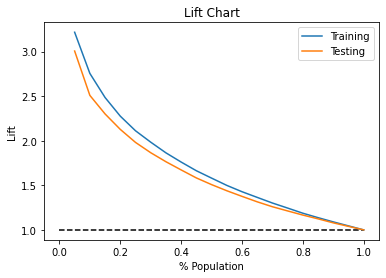

parameters: 10---0.005
#### Parameters for RF ####
n estimators: 100
max features: 0.8
max depth: 10
min sample split: 0.00500
min sample leaf: 0.00500
min_impurity_decrease: 0.00000
###########################



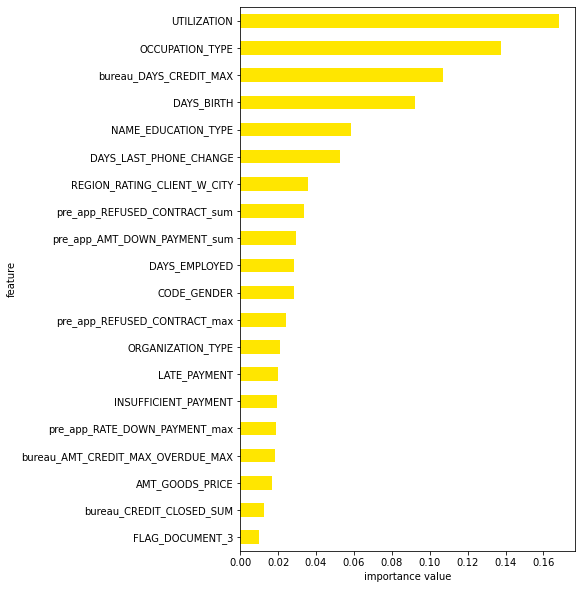

time elapsed: 33.46607184410095 seconds


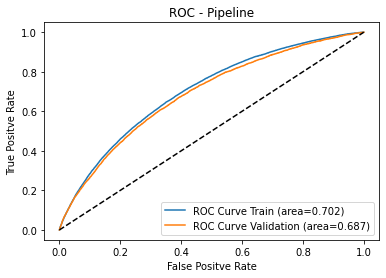

Training:
Pipeline:
KS value:0.29399179749278137

Testing:
Pipeline:
KS value:0.27488759334697965


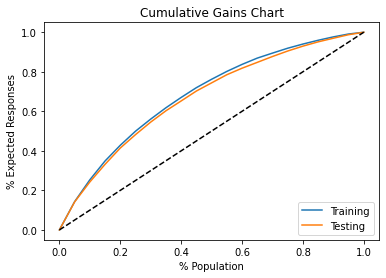

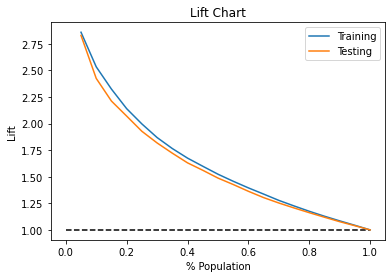

parameters: 10---0.005
#### Parameters for RF ####
n estimators: 100
max features: 0.8
max depth: 10
min sample split: 0.00500
min sample leaf: 0.01000
min_impurity_decrease: 0.00000
###########################



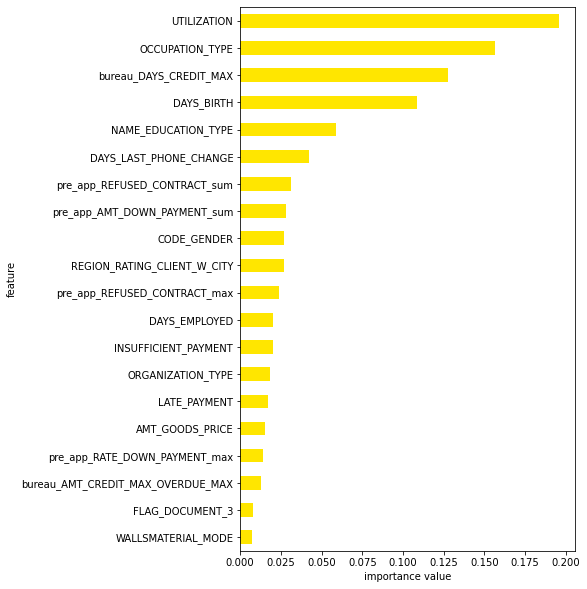

time elapsed: 29.75064468383789 seconds


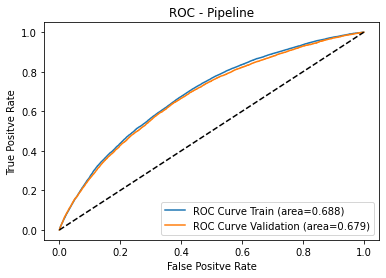

Training:
Pipeline:
KS value:0.2753694896697531

Testing:
Pipeline:
KS value:0.26686297211947624


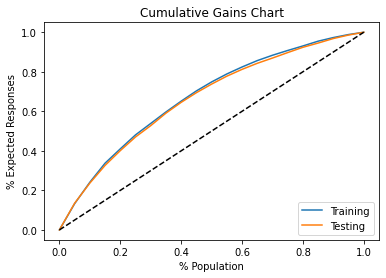

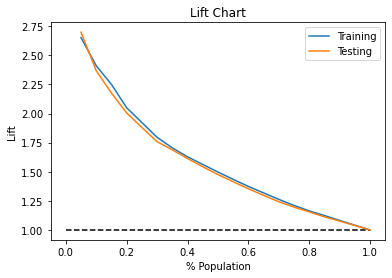

parameters: 12---0.0005
#### Parameters for RF ####
n estimators: 100
max features: 0.8
max depth: 12
min sample split: 0.00050
min sample leaf: 0.00100
min_impurity_decrease: 0.00000
###########################



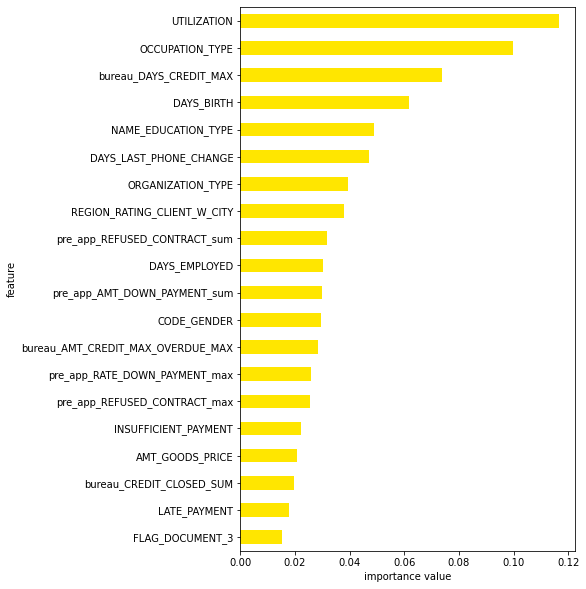

time elapsed: 43.479270935058594 seconds


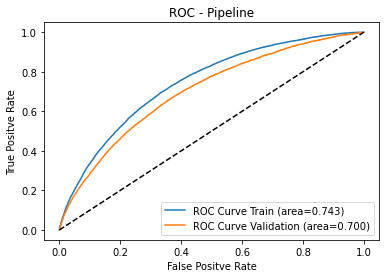

Training:
Pipeline:
KS value:0.360424949741938

Testing:
Pipeline:
KS value:0.2978168109926321


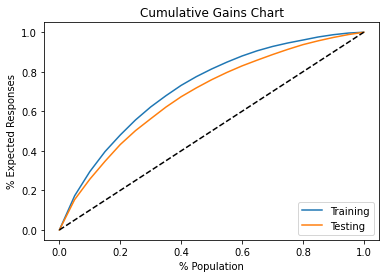

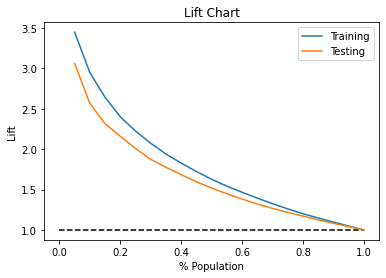

parameters: 12---0.0005
#### Parameters for RF ####
n estimators: 100
max features: 0.8
max depth: 12
min sample split: 0.00050
min sample leaf: 0.00500
min_impurity_decrease: 0.00000
###########################



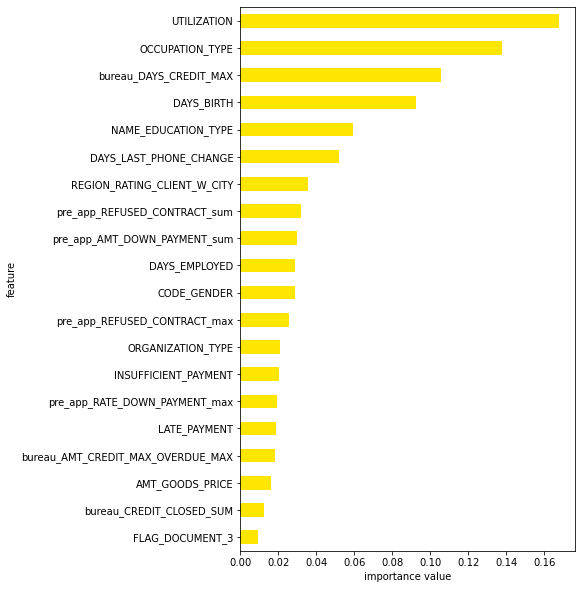

time elapsed: 34.38175129890442 seconds


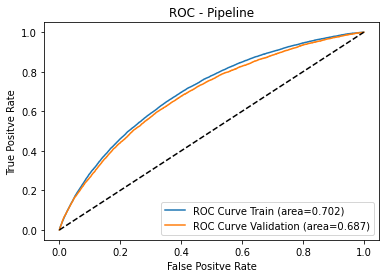

Training:
Pipeline:
KS value:0.2961495672016615

Testing:
Pipeline:
KS value:0.2756310123153056


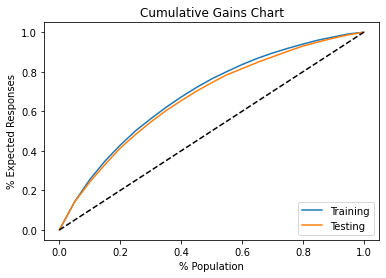

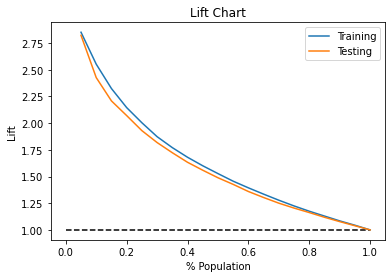

parameters: 12---0.0005
#### Parameters for RF ####
n estimators: 100
max features: 0.8
max depth: 12
min sample split: 0.00050
min sample leaf: 0.01000
min_impurity_decrease: 0.00000
###########################



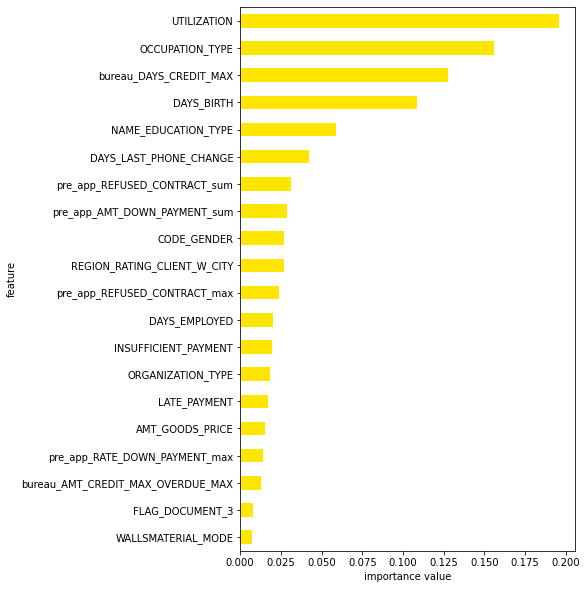

time elapsed: 29.68201780319214 seconds


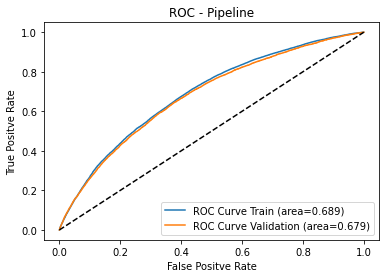

Training:
Pipeline:
KS value:0.2753041027088779

Testing:
Pipeline:
KS value:0.2670065403609656


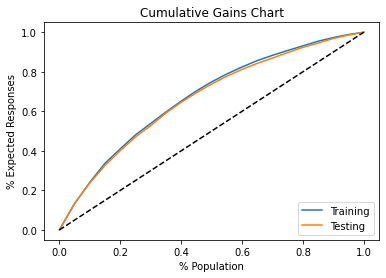

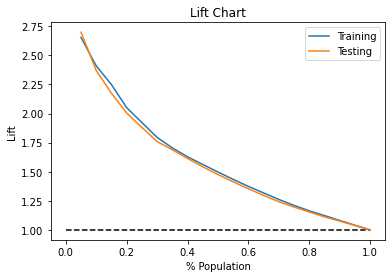

parameters: 12---0.001
#### Parameters for RF ####
n estimators: 100
max features: 0.8
max depth: 12
min sample split: 0.00100
min sample leaf: 0.00100
min_impurity_decrease: 0.00000
###########################



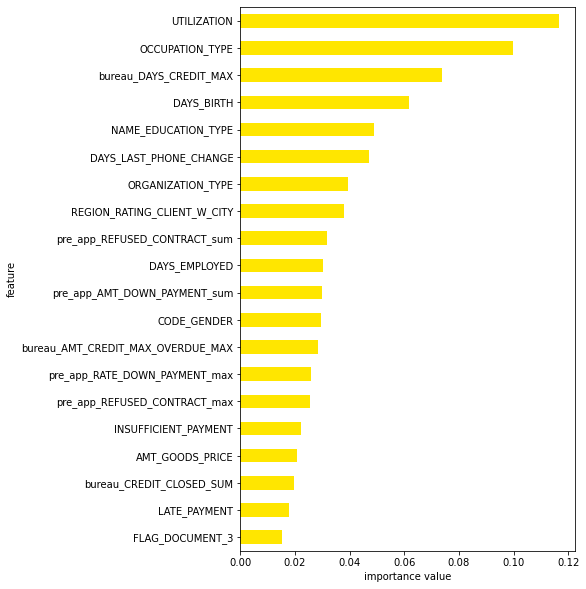

time elapsed: 39.13614773750305 seconds


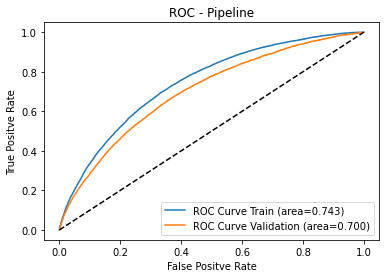

Training:
Pipeline:
KS value:0.360424949741938

Testing:
Pipeline:
KS value:0.2978168109926321


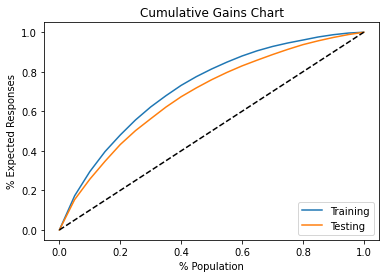

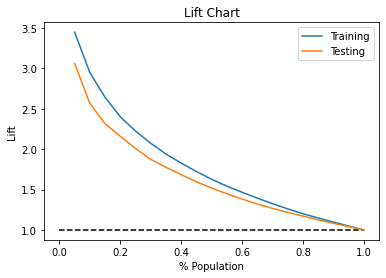

parameters: 12---0.001
#### Parameters for RF ####
n estimators: 100
max features: 0.8
max depth: 12
min sample split: 0.00100
min sample leaf: 0.00500
min_impurity_decrease: 0.00000
###########################



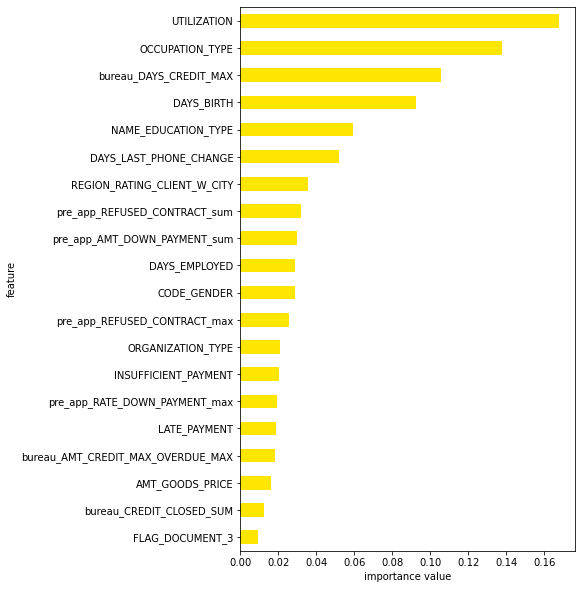

time elapsed: 30.47429370880127 seconds


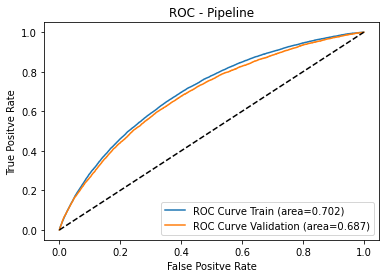

Training:
Pipeline:
KS value:0.2961495672016615

Testing:
Pipeline:
KS value:0.2756310123153056


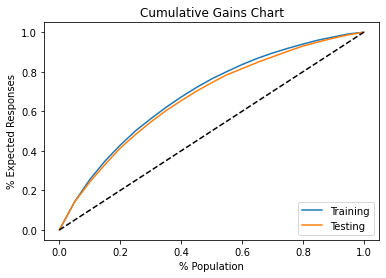

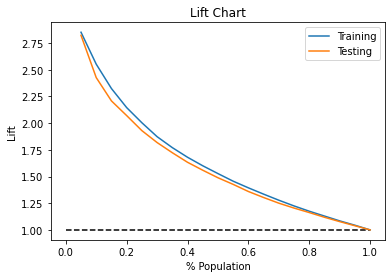

parameters: 12---0.001
#### Parameters for RF ####
n estimators: 100
max features: 0.8
max depth: 12
min sample split: 0.00100
min sample leaf: 0.01000
min_impurity_decrease: 0.00000
###########################



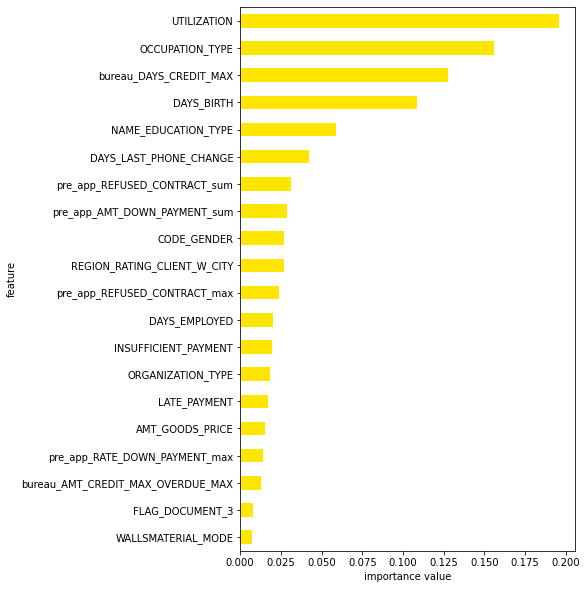

time elapsed: 26.560180187225342 seconds


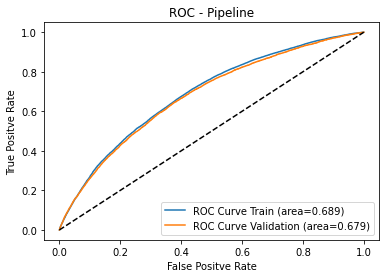

Training:
Pipeline:
KS value:0.2753041027088779

Testing:
Pipeline:
KS value:0.2670065403609656


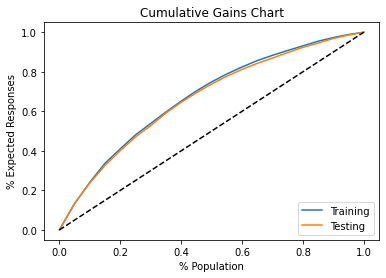

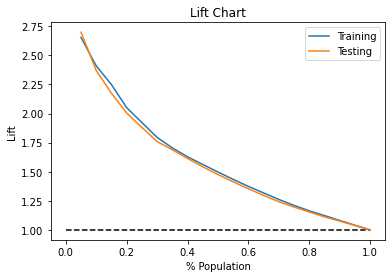

parameters: 12---0.005
#### Parameters for RF ####
n estimators: 100
max features: 0.8
max depth: 12
min sample split: 0.00500
min sample leaf: 0.00100
min_impurity_decrease: 0.00000
###########################



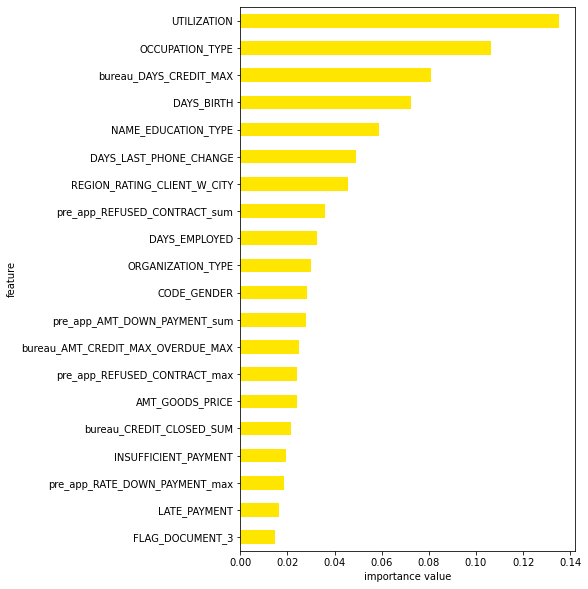

time elapsed: 36.678027391433716 seconds


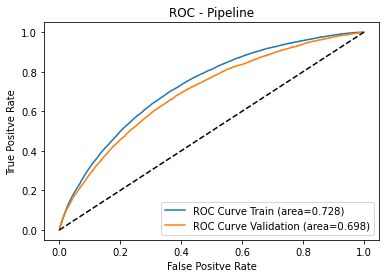

Training:
Pipeline:
KS value:0.33583945245287994

Testing:
Pipeline:
KS value:0.29290139451921243


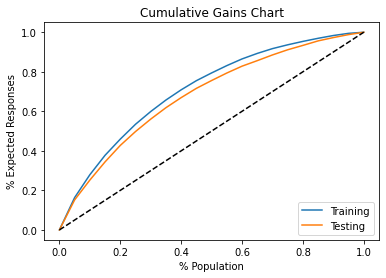

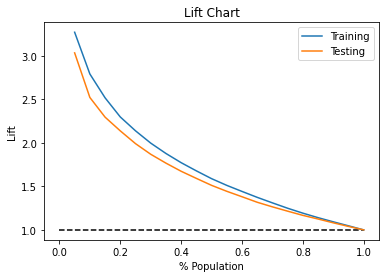

parameters: 12---0.005
#### Parameters for RF ####
n estimators: 100
max features: 0.8
max depth: 12
min sample split: 0.00500
min sample leaf: 0.00500
min_impurity_decrease: 0.00000
###########################



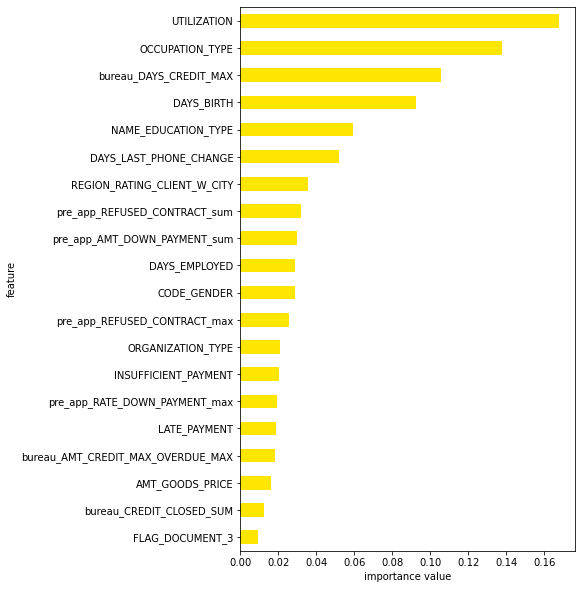

time elapsed: 31.427785396575928 seconds


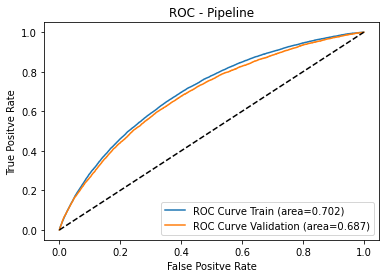

Training:
Pipeline:
KS value:0.2961495672016615

Testing:
Pipeline:
KS value:0.2756310123153056


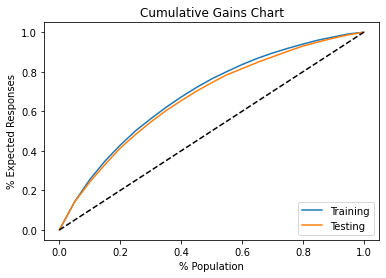

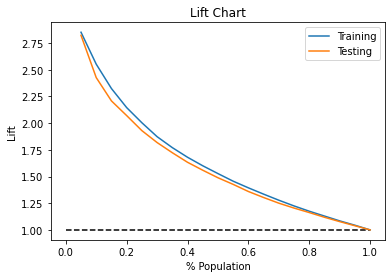

parameters: 12---0.005
#### Parameters for RF ####
n estimators: 100
max features: 0.8
max depth: 12
min sample split: 0.00500
min sample leaf: 0.01000
min_impurity_decrease: 0.00000
###########################



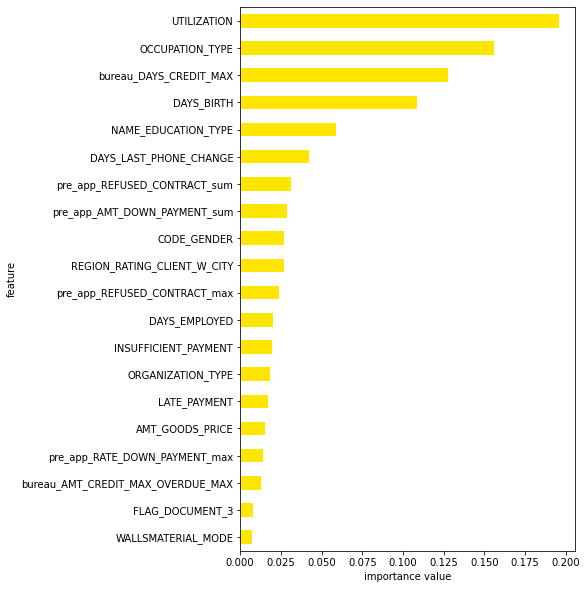

time elapsed: 26.20603108406067 seconds


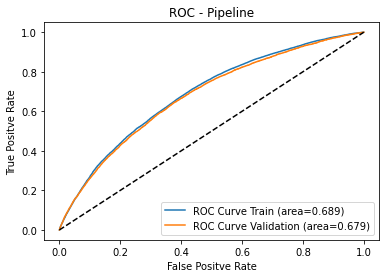

Training:
Pipeline:
KS value:0.2753041027088779

Testing:
Pipeline:
KS value:0.2670065403609656


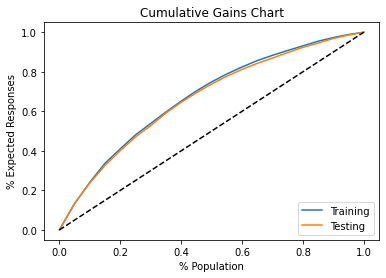

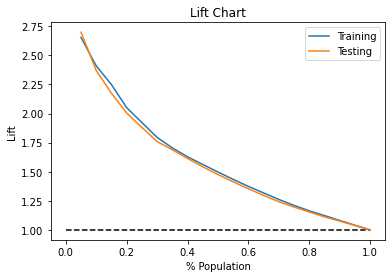

model max_depth min_samples_split min_samples_leaf  \
0   Random Forest         8            0.0005            0.001   
1   Random Forest         8            0.0005            0.005   
2   Random Forest         8            0.0005             0.01   
3   Random Forest         8             0.001            0.001   
4   Random Forest         8             0.001            0.005   
5   Random Forest         8             0.001             0.01   
6   Random Forest         8             0.005            0.001   
7   Random Forest         8             0.005            0.005   
8   Random Forest         8             0.005             0.01   
9   Random Forest        10            0.0005            0.001   
10  Random Forest        10            0.0005            0.005   
11  Random Forest        10            0.0005             0.01   
12  Random Forest        10             0.001            0.001   
13  Random Forest        10             0.001            0.005   
14  Random Forest        10             0.001             0.01   
15  Random Forest        10             0.005            0.001   
16  Random Forest        10             0.005            0.005   
17  Random Forest        10             0.005             0.01   
18  Random Forest        12            0.0005            0.001   
19  Random Forest        12            0.0005            0.005   
20  Random Forest        12            0.0005             0.01   
21  Random Forest        12             0.001            0.001   
22  Random Forest        12             0.001            0.005   
23  Random Forest        12             0.001             0.01   
24  Random Forest        12             0.005            0.001   
25  Random Forest        12             0.005            0.005   
26  Random Forest        12             0.005             0.01   

                  time           auc_train            auc_test  \
0    36.00045871734619  0.7159579683188539  0.6920062295737597   
1    33.52753686904907  0.6987367947640377  0.6850455721130865   
2    28.11454939842224  0.6880511401744192  0.6790596167728258   
3   35.477399587631226  0.7159579683188539  0.6920062295737597   
4     33.3321647644043  0.6987367947640377  0.6850455721130865   
5    28.10623073577881  0.6880511401744192  0.6790596167728258   
6    34.23559260368347  0.7117932358945263  0.6907941980893347   
7    32.71914625167847  0.6987367947640377  0.6850455721130865   
8   28.517597675323486  0.6880511401744192  0.6790596167728258   
9    39.57528519630432  0.7342419513333697  0.6982236958545391   
10  33.617820739746094  0.7017102080341832  0.6871559691013527   
11  29.131725788116455  0.6884977722925016  0.6792676484861283   
12   40.07477641105652  0.7342419513333697  0.6982236958545391   
13  33.499701261520386  0.7017102080341832  0.6871559691013527   
14   29.34344482421875  0.6884977722925016  0.6792676484861283   
15  38.287195444107056  0.7234543738283141  0.6961069698824995   
16   33.46607184410095  0.7017102080341832  0.6871559691013527   
17   29.75064468383789  0.6884977722925016  0.6792676484861283   
18  43.479270935058594  0.7431177515777974  0.7004547290729681   
19   34.38175129890442  0.7019914573048927  0.6869717046236291   
20   29.68201780319214  0.6885171469943657  0.6792813301924921   
21   39.13614773750305  0.7431177515777974  0.7004547290729681   
22   30.47429370880127  0.7019914573048927  0.6869717046236291   
23  26.560180187225342  0.6885171469943657  0.6792813301924921   
24  36.678027391433716  0.7279731176860582  0.6977909717987081   
25  31.427785396575928  0.7019914573048927  0.6869717046236291   
26   26.20603108406067  0.6885171469943657  0.6792813301924921   

               ks_train              ks_test  
0    0.3182503599774636  0.28758743076416415  
1   0.29124554513602485   0.2762952577846867  
2    0.2745848461392512  0.26580017936846634  
3    0.3182503599774636  0.28758743076416415  
4   0.29124554513602485   0.2762952577846867  
5    0.2745848461392512  0.26580

In [11]:
df_para_tuning_rf = pd.DataFrame(columns=['model', 'max_depth', 'min_samples_split', 'min_samples_leaf',
                                             'time', 'auc_train', 'auc_test', 'ks_train', 'ks_test'])

for max_depth_val in [8,10,12]:
    for min_sample_split_val in [0.0005, 0.001, 0.005]:
        for min_samples_leaf_val in [0.001, 0.005, 0.01]:
            print ('parameters: ' + str(max_depth_val) + '---' + str(min_sample_split_val))
            
            # Random Forest
            model_temp, df_importance_temp, time_temp = MLM.my_sklearn_rf(X_train, y_train, param = {"n_estimators":100,
                                                                                               "max_features":0.8,
                                                                                               "max_depth":max_depth_val,
                                                                                               "min_samples_split":min_sample_split_val,
                                                                                               "min_samples_leaf":min_samples_leaf_val,
                                                                                               "min_impurity_decrease":0,
                                                                                               "random_state":66})

            ls_roc_temp = SF.plot_roc(model_temp, X_train, X_test, y_train, y_test)
            ls_ks_temp, ls_df_lift_temp = SF.plot_gain_lift(model_temp, X_train, X_test, y_train, y_test, num_bins=21)
            
            df_para_tuning_temp = np.array(['Random Forest', max_depth_val, min_sample_split_val, min_samples_leaf_val,
                                            time_temp, ls_roc_temp[0], ls_roc_temp[1], ls_ks_temp[0], ls_ks_temp[1]])
            df_para_tuning_rf.loc[len(df_para_tuning_rf)] = df_para_tuning_temp

            print ('='*50)

df_para_tuning_rf

### Parameter Tuning - XGBoost

parameters: 4---0.005
#### Parameters for XGB ####
learning_rate: 0.80000
n estimators: 30
max depth: 4
colsample_bytree: 0.80000
colsample_bylevel: 0.60000
###########################



C:\Users\NH688MF\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.33718
[1]	validation_0-logloss:0.28320
[2]	validation_0-logloss:0.27048
[3]	validation_0-logloss:0.26672
[4]	validation_0-logloss:0.26454
[5]	validation_0-logloss:0.26305
[6]	validation_0-logloss:0.26170
[7]	validation_0-logloss:0.26088
[8]	validation_0-logloss:0.26055
[9]	validation_0-logloss:0.25976
[10]	validation_0-logloss:0.25957
[11]	validation_0-logloss:0.25953
[12]	validation_0-logloss:0.25949
[13]	validation_0-logloss:0.25947
[14]	validation_0-logloss:0.25943
[15]	validation_0-logloss:0.25923
[16]	validation_0-logloss:0.25930
[17]	validation_0-logloss:0.25932
[18]	validation_0-logloss:0.25930
[19]	validation_0-logloss:0.25931
[20]	validation_0-logloss:0.25928
[21]	validation_0-logloss:0.25934
[22]	validation_0-logloss:0.25951
[23]	validation_0-logloss:0.25957
[24]	validation_0-logloss:0.25958
[25]	validation_0-logloss:0.25958
[26]	validation_0-logloss:0.25959
[27]	validation_0-logloss:0.25960
[28]	validation_0-logloss:0.25962
[29]	validation_0-loglos

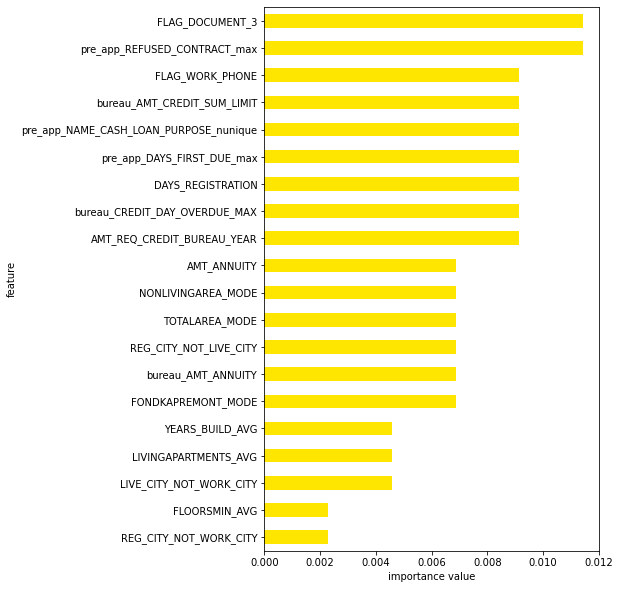

time elapsed: 3.7196569442749023 seconds


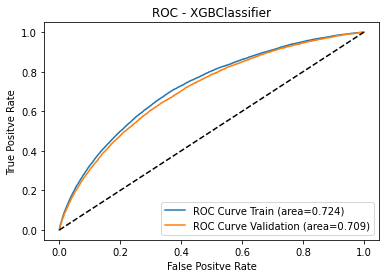

Training:
XGBClassifier:
KS value:0.3348586480397528

Testing:
XGBClassifier:
KS value:0.30610713040788795


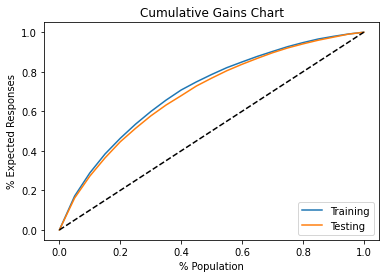

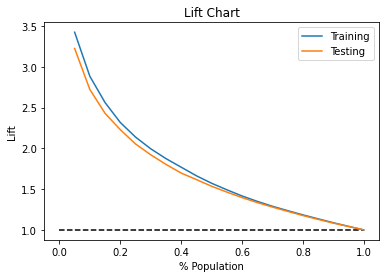

parameters: 4---0.005
#### Parameters for XGB ####
learning_rate: 0.80000
n estimators: 50
max depth: 4
colsample_bytree: 0.80000
colsample_bylevel: 0.60000
###########################



C:\Users\NH688MF\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.33718
[1]	validation_0-logloss:0.28320
[2]	validation_0-logloss:0.27048
[3]	validation_0-logloss:0.26672
[4]	validation_0-logloss:0.26454
[5]	validation_0-logloss:0.26305
[6]	validation_0-logloss:0.26170
[7]	validation_0-logloss:0.26088
[8]	validation_0-logloss:0.26055
[9]	validation_0-logloss:0.25976
[10]	validation_0-logloss:0.25957
[11]	validation_0-logloss:0.25953
[12]	validation_0-logloss:0.25949
[13]	validation_0-logloss:0.25947
[14]	validation_0-logloss:0.25943
[15]	validation_0-logloss:0.25923
[16]	validation_0-logloss:0.25930
[17]	validation_0-logloss:0.25932
[18]	validation_0-logloss:0.25930
[19]	validation_0-logloss:0.25931
[20]	validation_0-logloss:0.25928
[21]	validation_0-logloss:0.25934
[22]	validation_0-logloss:0.25951
[23]	validation_0-logloss:0.25957
[24]	validation_0-logloss:0.25958
[25]	validation_0-logloss:0.25958
[26]	validation_0-logloss:0.25959
[27]	validation_0-logloss:0.25960
[28]	validation_0-logloss:0.25962
[29]	validation_0-loglos

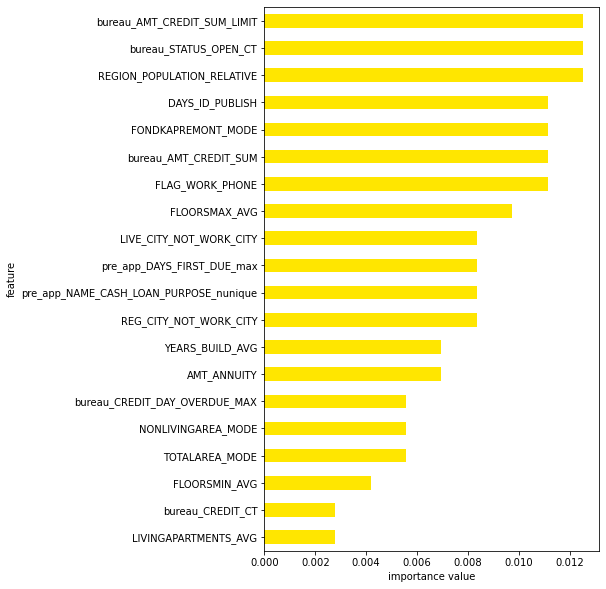

time elapsed: 5.482170104980469 seconds


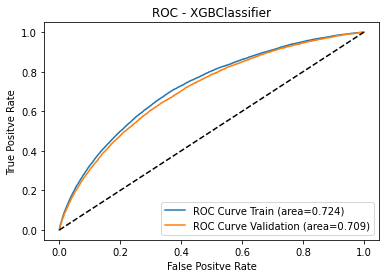

Training:
XGBClassifier:
KS value:0.3348586480397528

Testing:
XGBClassifier:
KS value:0.30610713040788795


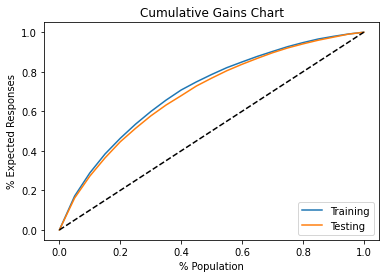

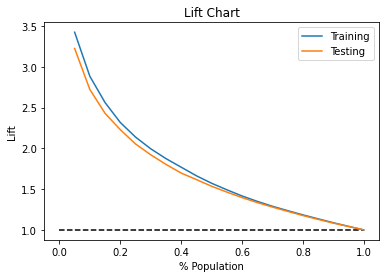

parameters: 4---0.005
#### Parameters for XGB ####
learning_rate: 0.80000
n estimators: 70
max depth: 4
colsample_bytree: 0.80000
colsample_bylevel: 0.60000
###########################



C:\Users\NH688MF\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.33718
[1]	validation_0-logloss:0.28320
[2]	validation_0-logloss:0.27048
[3]	validation_0-logloss:0.26672
[4]	validation_0-logloss:0.26454
[5]	validation_0-logloss:0.26305
[6]	validation_0-logloss:0.26170
[7]	validation_0-logloss:0.26088
[8]	validation_0-logloss:0.26055
[9]	validation_0-logloss:0.25976
[10]	validation_0-logloss:0.25957
[11]	validation_0-logloss:0.25953
[12]	validation_0-logloss:0.25949
[13]	validation_0-logloss:0.25947
[14]	validation_0-logloss:0.25943
[15]	validation_0-logloss:0.25923
[16]	validation_0-logloss:0.25930
[17]	validation_0-logloss:0.25932
[18]	validation_0-logloss:0.25930
[19]	validation_0-logloss:0.25931
[20]	validation_0-logloss:0.25928
[21]	validation_0-logloss:0.25934
[22]	validation_0-logloss:0.25951
[23]	validation_0-logloss:0.25957
[24]	validation_0-logloss:0.25958
[25]	validation_0-logloss:0.25958
[26]	validation_0-logloss:0.25959
[27]	validation_0-logloss:0.25960
[28]	validation_0-logloss:0.25962
[29]	validation_0-loglos

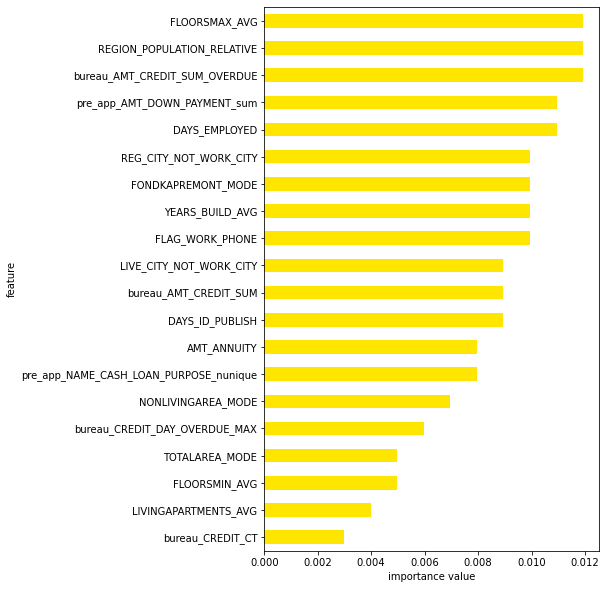

time elapsed: 7.406043767929077 seconds


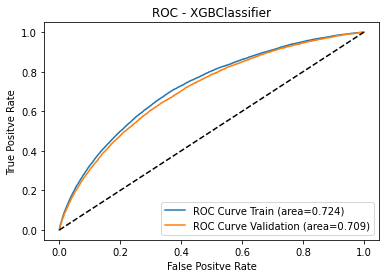

Training:
XGBClassifier:
KS value:0.3348586480397528

Testing:
XGBClassifier:
KS value:0.30610713040788795


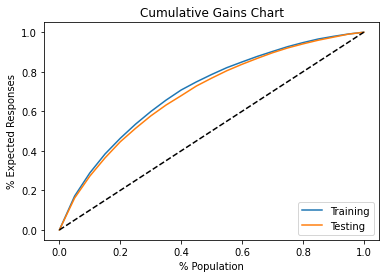

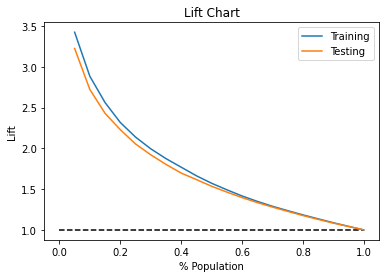

parameters: 4---0.005
#### Parameters for XGB ####
learning_rate: 0.80000
n estimators: 90
max depth: 4
colsample_bytree: 0.80000
colsample_bylevel: 0.60000
###########################



C:\Users\NH688MF\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.33718
[1]	validation_0-logloss:0.28320
[2]	validation_0-logloss:0.27048
[3]	validation_0-logloss:0.26672
[4]	validation_0-logloss:0.26454
[5]	validation_0-logloss:0.26305
[6]	validation_0-logloss:0.26170
[7]	validation_0-logloss:0.26088
[8]	validation_0-logloss:0.26055
[9]	validation_0-logloss:0.25976
[10]	validation_0-logloss:0.25957
[11]	validation_0-logloss:0.25953
[12]	validation_0-logloss:0.25949
[13]	validation_0-logloss:0.25947
[14]	validation_0-logloss:0.25943
[15]	validation_0-logloss:0.25923
[16]	validation_0-logloss:0.25930
[17]	validation_0-logloss:0.25932
[18]	validation_0-logloss:0.25930
[19]	validation_0-logloss:0.25931
[20]	validation_0-logloss:0.25928
[21]	validation_0-logloss:0.25934
[22]	validation_0-logloss:0.25951
[23]	validation_0-logloss:0.25957
[24]	validation_0-logloss:0.25958
[25]	validation_0-logloss:0.25958
[26]	validation_0-logloss:0.25959
[27]	validation_0-logloss:0.25960
[28]	validation_0-logloss:0.25962
[29]	validation_0-loglos

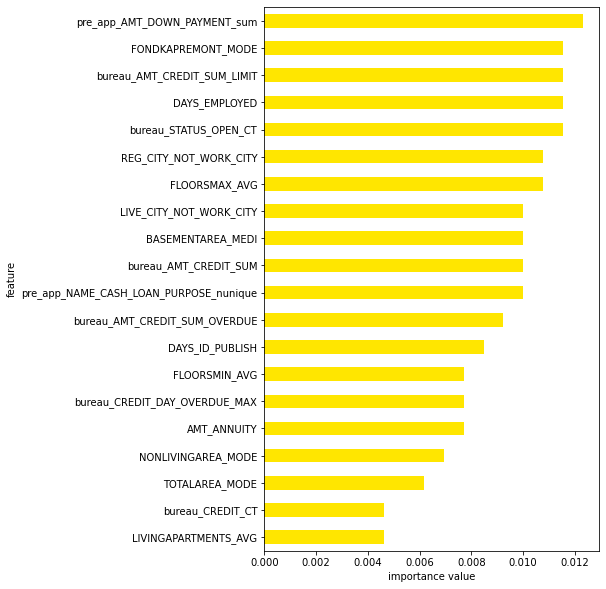

time elapsed: 9.45074200630188 seconds


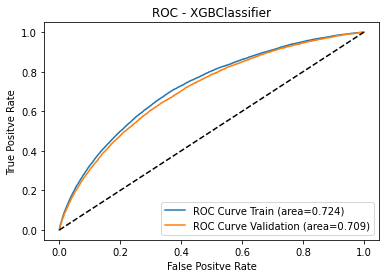

Training:
XGBClassifier:
KS value:0.3348586480397528

Testing:
XGBClassifier:
KS value:0.30610713040788795


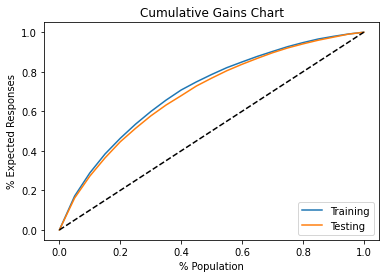

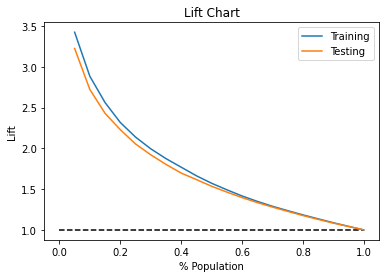

parameters: 5---0.005
#### Parameters for XGB ####
learning_rate: 0.80000
n estimators: 30
max depth: 5
colsample_bytree: 0.80000
colsample_bylevel: 0.60000
###########################



C:\Users\NH688MF\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.33679
[1]	validation_0-logloss:0.28219
[2]	validation_0-logloss:0.26897
[3]	validation_0-logloss:0.26542
[4]	validation_0-logloss:0.26288
[5]	validation_0-logloss:0.26173
[6]	validation_0-logloss:0.26089
[7]	validation_0-logloss:0.26041
[8]	validation_0-logloss:0.26002
[9]	validation_0-logloss:0.25978
[10]	validation_0-logloss:0.25988
[11]	validation_0-logloss:0.26010
[12]	validation_0-logloss:0.26009
[13]	validation_0-logloss:0.26028
[14]	validation_0-logloss:0.26038
[15]	validation_0-logloss:0.26064
[16]	validation_0-logloss:0.26071
[17]	validation_0-logloss:0.26082
[18]	validation_0-logloss:0.26088
[19]	validation_0-logloss:0.26104
[20]	validation_0-logloss:0.26132
[21]	validation_0-logloss:0.26140
[22]	validation_0-logloss:0.26155
[23]	validation_0-logloss:0.26165
[24]	validation_0-logloss:0.26174
[25]	validation_0-logloss:0.26191
[26]	validation_0-logloss:0.26208
[27]	validation_0-logloss:0.26211
[28]	validation_0-logloss:0.26228
[29]	validation_0-loglos

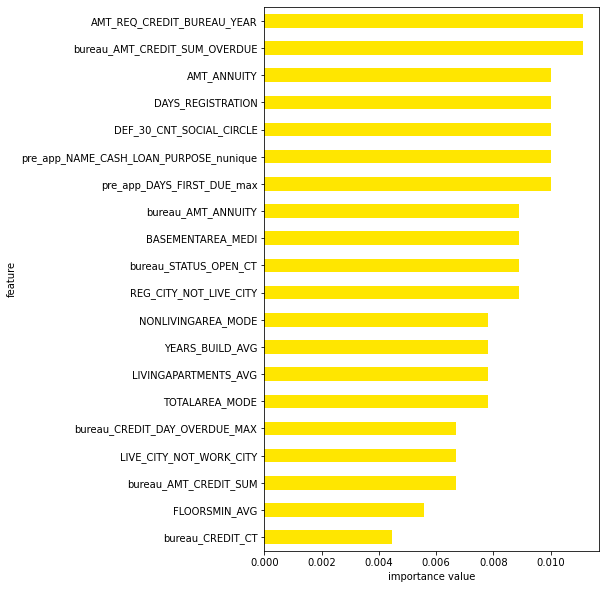

time elapsed: 4.0221216678619385 seconds


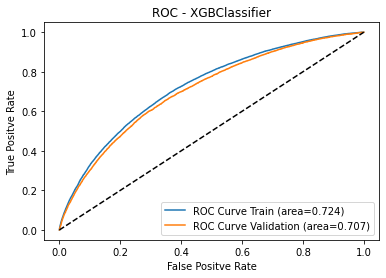

Training:
XGBClassifier:
KS value:0.3296329711401726

Testing:
XGBClassifier:
KS value:0.30416806959467585


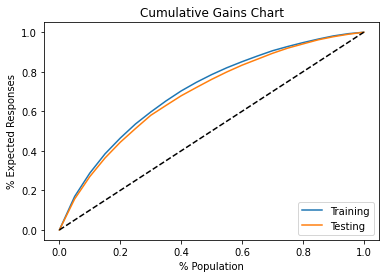

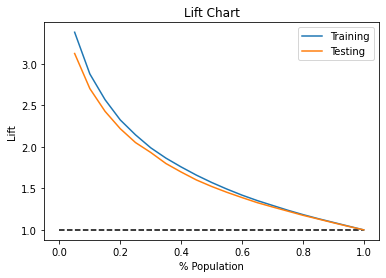

parameters: 5---0.005
#### Parameters for XGB ####
learning_rate: 0.80000
n estimators: 50
max depth: 5
colsample_bytree: 0.80000
colsample_bylevel: 0.60000
###########################



C:\Users\NH688MF\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.33679
[1]	validation_0-logloss:0.28219
[2]	validation_0-logloss:0.26897
[3]	validation_0-logloss:0.26542
[4]	validation_0-logloss:0.26288
[5]	validation_0-logloss:0.26173
[6]	validation_0-logloss:0.26089
[7]	validation_0-logloss:0.26041
[8]	validation_0-logloss:0.26002
[9]	validation_0-logloss:0.25978
[10]	validation_0-logloss:0.25988
[11]	validation_0-logloss:0.26010
[12]	validation_0-logloss:0.26009
[13]	validation_0-logloss:0.26028
[14]	validation_0-logloss:0.26038
[15]	validation_0-logloss:0.26064
[16]	validation_0-logloss:0.26071
[17]	validation_0-logloss:0.26082
[18]	validation_0-logloss:0.26088
[19]	validation_0-logloss:0.26104
[20]	validation_0-logloss:0.26132
[21]	validation_0-logloss:0.26140
[22]	validation_0-logloss:0.26155
[23]	validation_0-logloss:0.26165
[24]	validation_0-logloss:0.26174
[25]	validation_0-logloss:0.26191
[26]	validation_0-logloss:0.26208
[27]	validation_0-logloss:0.26211
[28]	validation_0-logloss:0.26228
[29]	validation_0-loglos

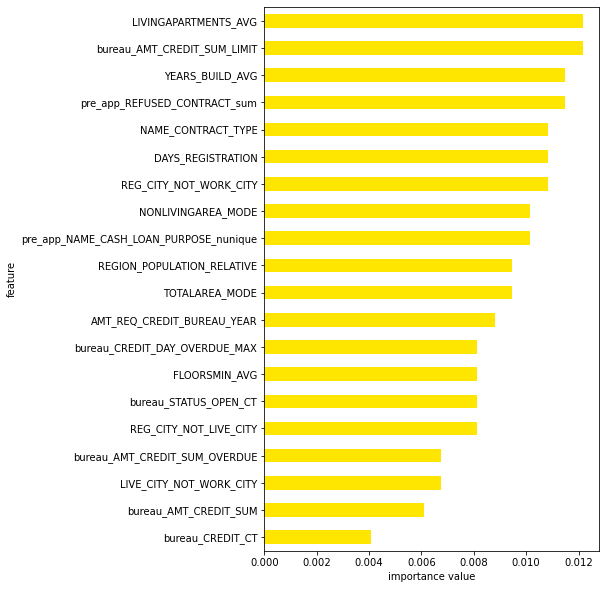

time elapsed: 6.3865978717803955 seconds


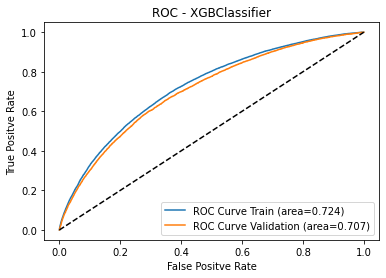

Training:
XGBClassifier:
KS value:0.3296329711401726

Testing:
XGBClassifier:
KS value:0.30416806959467585


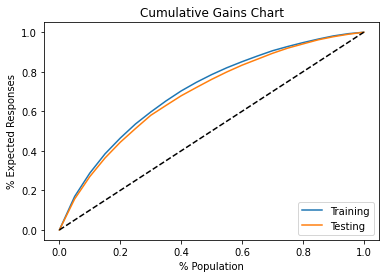

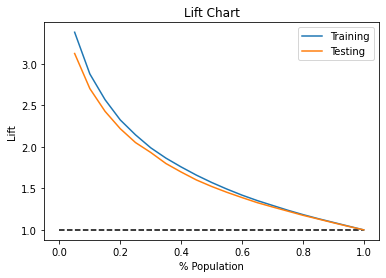

parameters: 5---0.005
#### Parameters for XGB ####
learning_rate: 0.80000
n estimators: 70
max depth: 5
colsample_bytree: 0.80000
colsample_bylevel: 0.60000
###########################



C:\Users\NH688MF\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.33679
[1]	validation_0-logloss:0.28219
[2]	validation_0-logloss:0.26897
[3]	validation_0-logloss:0.26542
[4]	validation_0-logloss:0.26288
[5]	validation_0-logloss:0.26173
[6]	validation_0-logloss:0.26089
[7]	validation_0-logloss:0.26041
[8]	validation_0-logloss:0.26002
[9]	validation_0-logloss:0.25978
[10]	validation_0-logloss:0.25988
[11]	validation_0-logloss:0.26010
[12]	validation_0-logloss:0.26009
[13]	validation_0-logloss:0.26028
[14]	validation_0-logloss:0.26038
[15]	validation_0-logloss:0.26064
[16]	validation_0-logloss:0.26071
[17]	validation_0-logloss:0.26082
[18]	validation_0-logloss:0.26088
[19]	validation_0-logloss:0.26104
[20]	validation_0-logloss:0.26132
[21]	validation_0-logloss:0.26140
[22]	validation_0-logloss:0.26155
[23]	validation_0-logloss:0.26165
[24]	validation_0-logloss:0.26174
[25]	validation_0-logloss:0.26191
[26]	validation_0-logloss:0.26208
[27]	validation_0-logloss:0.26211
[28]	validation_0-logloss:0.26228
[29]	validation_0-loglos

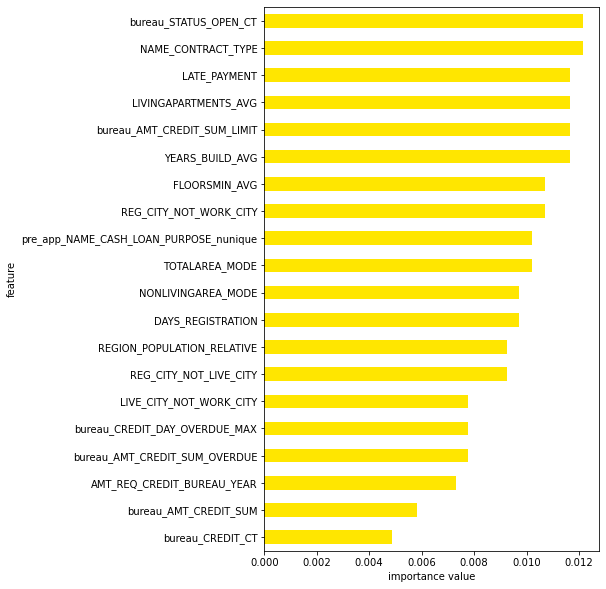

time elapsed: 8.53644347190857 seconds


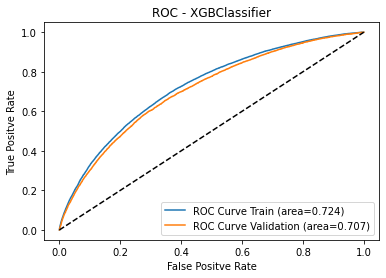

Training:
XGBClassifier:
KS value:0.3296329711401726

Testing:
XGBClassifier:
KS value:0.30416806959467585


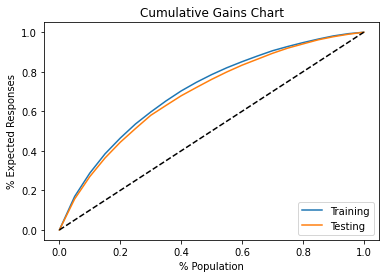

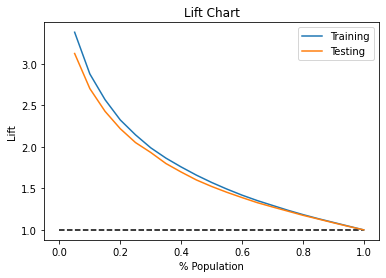

parameters: 5---0.005
#### Parameters for XGB ####
learning_rate: 0.80000
n estimators: 90
max depth: 5
colsample_bytree: 0.80000
colsample_bylevel: 0.60000
###########################



C:\Users\NH688MF\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.33679
[1]	validation_0-logloss:0.28219
[2]	validation_0-logloss:0.26897
[3]	validation_0-logloss:0.26542
[4]	validation_0-logloss:0.26288
[5]	validation_0-logloss:0.26173
[6]	validation_0-logloss:0.26089
[7]	validation_0-logloss:0.26041
[8]	validation_0-logloss:0.26002
[9]	validation_0-logloss:0.25978
[10]	validation_0-logloss:0.25988
[11]	validation_0-logloss:0.26010
[12]	validation_0-logloss:0.26009
[13]	validation_0-logloss:0.26028
[14]	validation_0-logloss:0.26038
[15]	validation_0-logloss:0.26064
[16]	validation_0-logloss:0.26071
[17]	validation_0-logloss:0.26082
[18]	validation_0-logloss:0.26088
[19]	validation_0-logloss:0.26104
[20]	validation_0-logloss:0.26132
[21]	validation_0-logloss:0.26140
[22]	validation_0-logloss:0.26155
[23]	validation_0-logloss:0.26165
[24]	validation_0-logloss:0.26174
[25]	validation_0-logloss:0.26191
[26]	validation_0-logloss:0.26208
[27]	validation_0-logloss:0.26211
[28]	validation_0-logloss:0.26228
[29]	validation_0-loglos

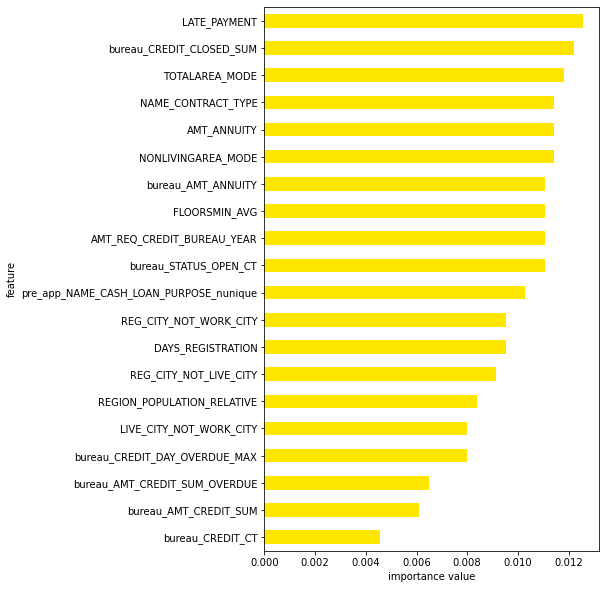

time elapsed: 11.66923475265503 seconds


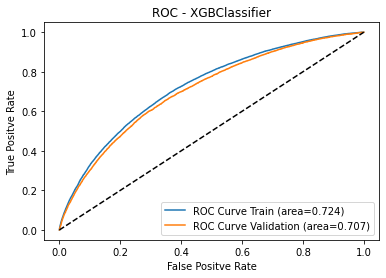

Training:
XGBClassifier:
KS value:0.3296329711401726

Testing:
XGBClassifier:
KS value:0.30416806959467585


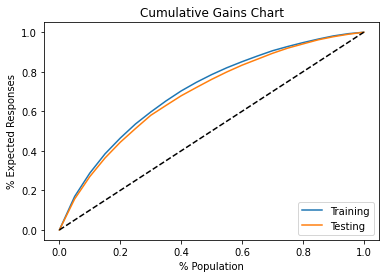

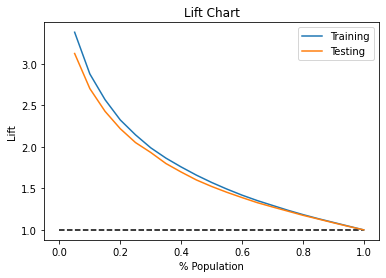

parameters: 6---0.005
#### Parameters for XGB ####
learning_rate: 0.80000
n estimators: 30
max depth: 6
colsample_bytree: 0.80000
colsample_bylevel: 0.60000
###########################



C:\Users\NH688MF\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.33644
[1]	validation_0-logloss:0.28137
[2]	validation_0-logloss:0.26798
[3]	validation_0-logloss:0.26387
[4]	validation_0-logloss:0.26187
[5]	validation_0-logloss:0.26133
[6]	validation_0-logloss:0.26102
[7]	validation_0-logloss:0.26084
[8]	validation_0-logloss:0.26092
[9]	validation_0-logloss:0.26111
[10]	validation_0-logloss:0.26135
[11]	validation_0-logloss:0.26143
[12]	validation_0-logloss:0.26138
[13]	validation_0-logloss:0.26146
[14]	validation_0-logloss:0.26180
[15]	validation_0-logloss:0.26209
[16]	validation_0-logloss:0.26235
[17]	validation_0-logloss:0.26258
[18]	validation_0-logloss:0.26292
[19]	validation_0-logloss:0.26312
[20]	validation_0-logloss:0.26336
[21]	validation_0-logloss:0.26344
[22]	validation_0-logloss:0.26359
[23]	validation_0-logloss:0.26382
[24]	validation_0-logloss:0.26386
[25]	validation_0-logloss:0.26406
[26]	validation_0-logloss:0.26418
[27]	validation_0-logloss:0.26444
[28]	validation_0-logloss:0.26471
[29]	validation_0-loglos

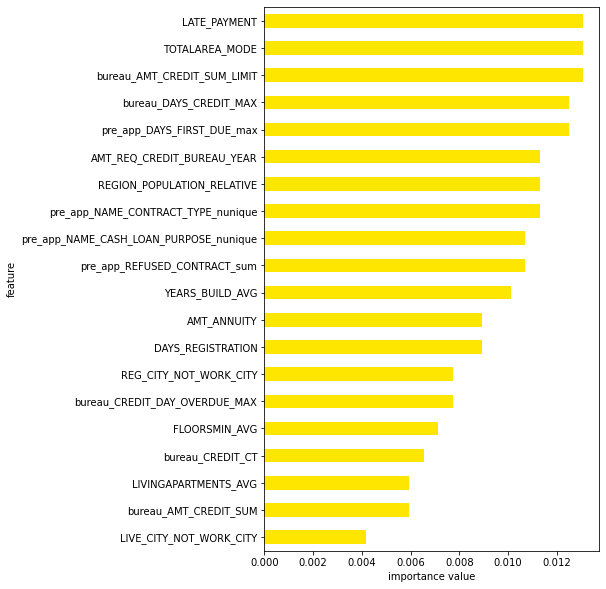

time elapsed: 4.616514205932617 seconds


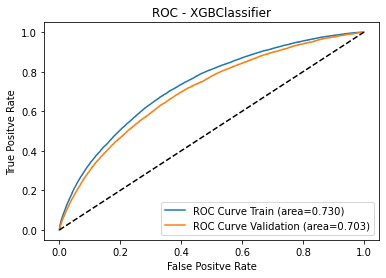

Training:
XGBClassifier:
KS value:0.339820361010306

Testing:
XGBClassifier:
KS value:0.2979496600865082


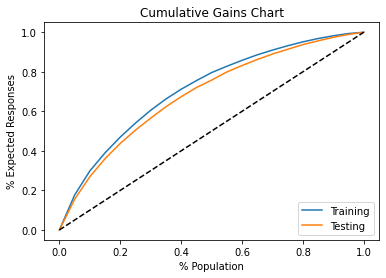

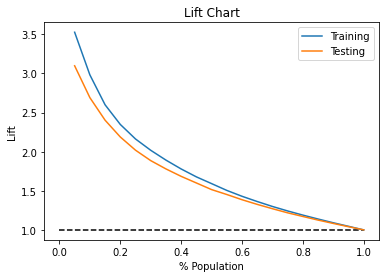

parameters: 6---0.005
#### Parameters for XGB ####
learning_rate: 0.80000
n estimators: 50
max depth: 6
colsample_bytree: 0.80000
colsample_bylevel: 0.60000
###########################



C:\Users\NH688MF\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.33644
[1]	validation_0-logloss:0.28137
[2]	validation_0-logloss:0.26798
[3]	validation_0-logloss:0.26387
[4]	validation_0-logloss:0.26187
[5]	validation_0-logloss:0.26133
[6]	validation_0-logloss:0.26102
[7]	validation_0-logloss:0.26084
[8]	validation_0-logloss:0.26092
[9]	validation_0-logloss:0.26111
[10]	validation_0-logloss:0.26135
[11]	validation_0-logloss:0.26143
[12]	validation_0-logloss:0.26138
[13]	validation_0-logloss:0.26146
[14]	validation_0-logloss:0.26180
[15]	validation_0-logloss:0.26209
[16]	validation_0-logloss:0.26235
[17]	validation_0-logloss:0.26258
[18]	validation_0-logloss:0.26292
[19]	validation_0-logloss:0.26312
[20]	validation_0-logloss:0.26336
[21]	validation_0-logloss:0.26344
[22]	validation_0-logloss:0.26359
[23]	validation_0-logloss:0.26382
[24]	validation_0-logloss:0.26386
[25]	validation_0-logloss:0.26406
[26]	validation_0-logloss:0.26418
[27]	validation_0-logloss:0.26444
[28]	validation_0-logloss:0.26471
[29]	validation_0-loglos

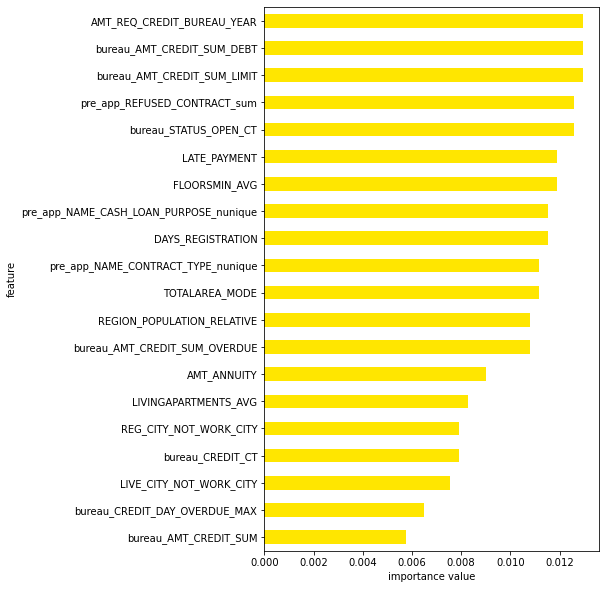

time elapsed: 7.3148603439331055 seconds


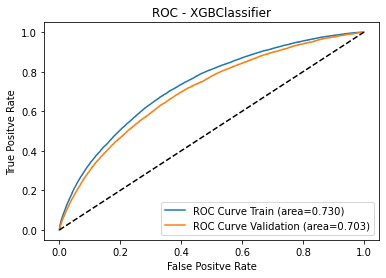

Training:
XGBClassifier:
KS value:0.339820361010306

Testing:
XGBClassifier:
KS value:0.2979496600865082


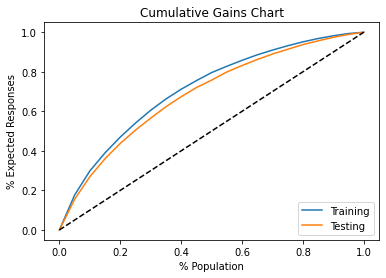

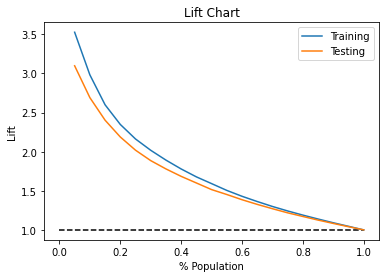

parameters: 6---0.005
#### Parameters for XGB ####
learning_rate: 0.80000
n estimators: 70
max depth: 6
colsample_bytree: 0.80000
colsample_bylevel: 0.60000
###########################



C:\Users\NH688MF\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.33644
[1]	validation_0-logloss:0.28137
[2]	validation_0-logloss:0.26798
[3]	validation_0-logloss:0.26387
[4]	validation_0-logloss:0.26187
[5]	validation_0-logloss:0.26133
[6]	validation_0-logloss:0.26102
[7]	validation_0-logloss:0.26084
[8]	validation_0-logloss:0.26092
[9]	validation_0-logloss:0.26111
[10]	validation_0-logloss:0.26135
[11]	validation_0-logloss:0.26143
[12]	validation_0-logloss:0.26138
[13]	validation_0-logloss:0.26146
[14]	validation_0-logloss:0.26180
[15]	validation_0-logloss:0.26209
[16]	validation_0-logloss:0.26235
[17]	validation_0-logloss:0.26258
[18]	validation_0-logloss:0.26292
[19]	validation_0-logloss:0.26312
[20]	validation_0-logloss:0.26336
[21]	validation_0-logloss:0.26344
[22]	validation_0-logloss:0.26359
[23]	validation_0-logloss:0.26382
[24]	validation_0-logloss:0.26386
[25]	validation_0-logloss:0.26406
[26]	validation_0-logloss:0.26418
[27]	validation_0-logloss:0.26444
[28]	validation_0-logloss:0.26471
[29]	validation_0-loglos

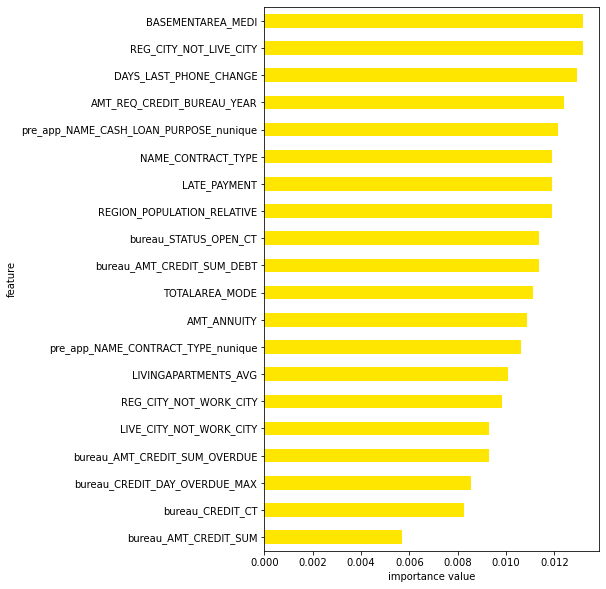

time elapsed: 10.059126615524292 seconds


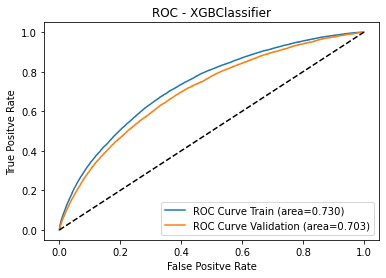

Training:
XGBClassifier:
KS value:0.339820361010306

Testing:
XGBClassifier:
KS value:0.2979496600865082


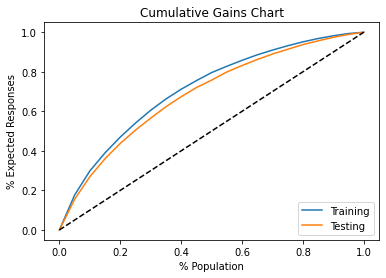

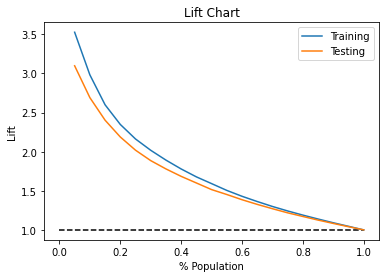

parameters: 6---0.005
#### Parameters for XGB ####
learning_rate: 0.80000
n estimators: 90
max depth: 6
colsample_bytree: 0.80000
colsample_bylevel: 0.60000
###########################



C:\Users\NH688MF\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-logloss:0.33644
[1]	validation_0-logloss:0.28137
[2]	validation_0-logloss:0.26798
[3]	validation_0-logloss:0.26387
[4]	validation_0-logloss:0.26187
[5]	validation_0-logloss:0.26133
[6]	validation_0-logloss:0.26102
[7]	validation_0-logloss:0.26084
[8]	validation_0-logloss:0.26092
[9]	validation_0-logloss:0.26111
[10]	validation_0-logloss:0.26135
[11]	validation_0-logloss:0.26143
[12]	validation_0-logloss:0.26138
[13]	validation_0-logloss:0.26146
[14]	validation_0-logloss:0.26180
[15]	validation_0-logloss:0.26209
[16]	validation_0-logloss:0.26235
[17]	validation_0-logloss:0.26258
[18]	validation_0-logloss:0.26292
[19]	validation_0-logloss:0.26312
[20]	validation_0-logloss:0.26336
[21]	validation_0-logloss:0.26344
[22]	validation_0-logloss:0.26359
[23]	validation_0-logloss:0.26382
[24]	validation_0-logloss:0.26386
[25]	validation_0-logloss:0.26406
[26]	validation_0-logloss:0.26418
[27]	validation_0-logloss:0.26444
[28]	validation_0-logloss:0.26471
[29]	validation_0-loglos

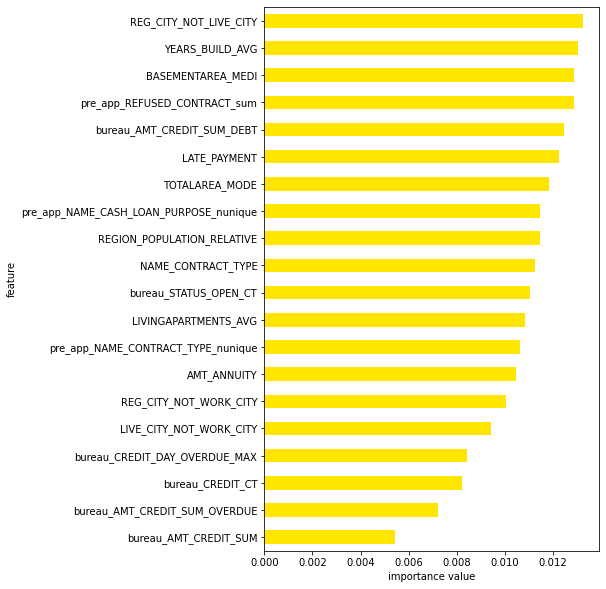

time elapsed: 12.613504409790039 seconds


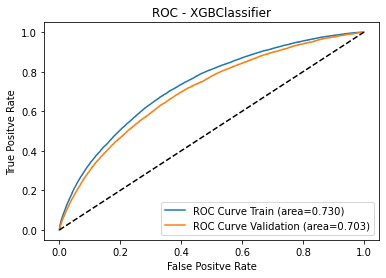

Training:
XGBClassifier:
KS value:0.339820361010306

Testing:
XGBClassifier:
KS value:0.2979496600865082


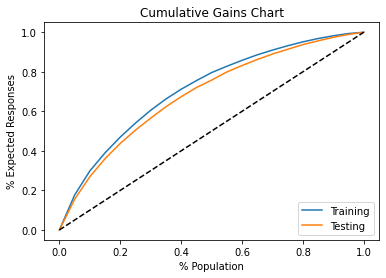

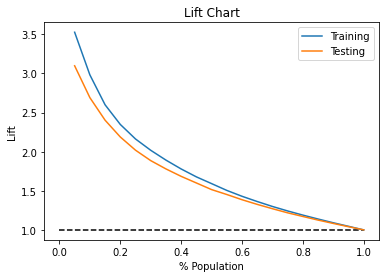

model max_depth n_estimators                time           auc_train  \
0   XGBoost         4           30  3.7196569442749023  0.7241413877318328   
1   XGBoost         4           50   5.482170104980469  0.7241413877318328   
2   XGBoost         4           70   7.406043767929077  0.7241413877318328   
3   XGBoost         4           90    9.45074200630188  0.7241413877318328   
4   XGBoost         5           30  4.0221216678619385   0.724077287361096   
5   XGBoost         5           50  6.3865978717803955   0.724077287361096   
6   XGBoost         5           70    8.53644347190857   0.724077287361096   
7   XGBoost         5           90   11.66923475265503   0.724077287361096   
8   XGBoost         6           30   4.616514205932617  0.7304220493444037   
9   XGBoost         6           50  7.3148603439331055  0.7304220493444037   
10  XGBoost         6           70  10.059126615524292  0.7304220493444037   
11  XGBoost         6           90  12.613504409790039  0.7304220493444037   

              auc_test            ks_train              ks_test  
0   0.7094336921933244  0.3348586480397528  0.30610713040788795  
1   0.7094336921933244  0.3348586480397528  0.30610713040788795  
2   0.7094336921933244  0.3348586480397528  0.30610713040788795  
3   0.7094336921933244  0.3348586480397528  0.30610713040788795  
4   0.7073492028664248  0.3296329711401726  0.30416806959467585  
5   0.7073492028664248  0.3296329711401726  0.30416806959467585  
6   0.7073492028664248  0.3296329711401726  0.30416806959467585  
7   0.7073492028664248  0.3296329711401726  0.30416806959467585  
8   0.7031590235242979   0.339820361010306   0.2979496600865082  
9   0.7031590235242979   0.339820361010306   0.2979496600865082  
10  0.7031590235242979   0.339820361010306   0.2979496600865082  
11  0.7031590235242979   0.339820361010306   0.2979496600865082

In [12]:
df_para_tuning_xgb = pd.DataFrame(columns=['model', 'max_depth', 'n_estimators',
                                             'time', 'auc_train', 'auc_test', 'ks_train', 'ks_test'])

for max_depth_val in [4,5,6]:
    for n_estimators_val in [30, 50, 70, 90]:
        print ('parameters: ' + str(max_depth_val) + '---' + str(min_sample_split_val))

        # XGBoost
        model_temp, df_importance_temp, time_temp = MLM.my_API_XGBoost(X_train, y_train, X_test, y_test, 
                                                                        param={"learning_rate":0.8,
                                                                               "n_estimators":n_estimators_val, 
                                                                               "max_depth":max_depth_val, 
                                                                               "colsample_bytree":0.8,
                                                                               "colsample_bylevel":0.6,
                                                                               "gamma":0,
                                                                               "random_state":66})

        ls_roc_temp = SF.plot_roc(model_temp, X_train, X_test, y_train, y_test)
        ls_ks_temp, ls_df_lift_temp = SF.plot_gain_lift(model_temp, X_train, X_test, y_train, y_test, num_bins=21)

        df_para_tuning_temp = np.array(['XGBoost', max_depth_val, n_estimators_val,
                                        time_temp, ls_roc_temp[0], ls_roc_temp[1], ls_ks_temp[0], ls_ks_temp[1]])
        df_para_tuning_xgb.loc[len(df_para_tuning_xgb)] = df_para_tuning_temp

        print ('='*50)

df_para_tuning_xgb

### Parameter Tuning - SVM

parameters: 0.05
#### Parameters for SVM ####
C: 0.050000
gamma: auto
kernel: rbf
###########################

time elapsed: 0.40551257133483887 seconds


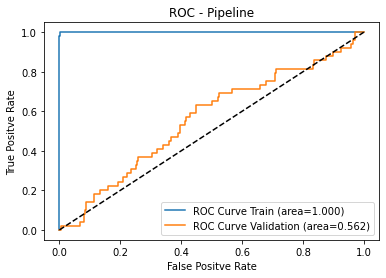

Training:
Pipeline:
KS value:0.9773095623987034

Testing:
Pipeline:
KS value:0.15541601255886972


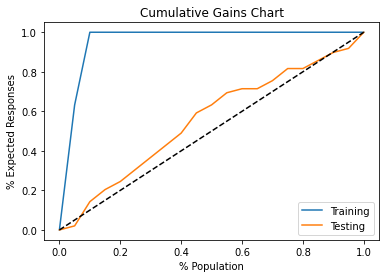

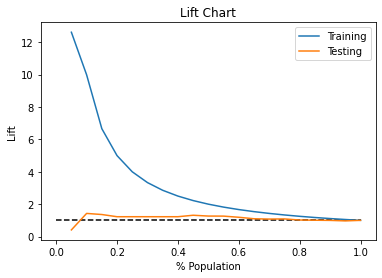

parameters: 0.1
#### Parameters for SVM ####
C: 0.100000
gamma: auto
kernel: rbf
###########################

time elapsed: 0.4159965515136719 seconds


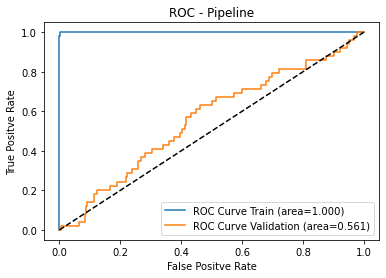

Training:
Pipeline:
KS value:0.9773095623987034

Testing:
Pipeline:
KS value:0.15321153011122612


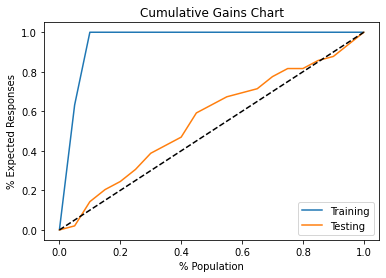

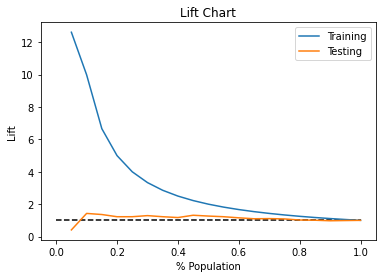

parameters: 0.5
#### Parameters for SVM ####
C: 0.500000
gamma: auto
kernel: rbf
###########################

time elapsed: 0.4279606342315674 seconds


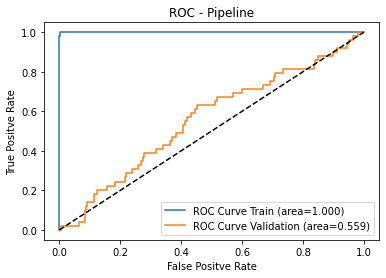

Training:
Pipeline:
KS value:0.9773095623987034

Testing:
Pipeline:
KS value:0.15321153011122612


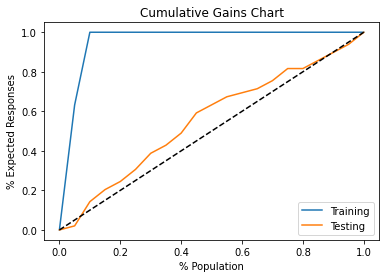

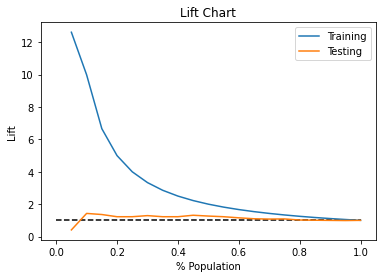

parameters: 1
#### Parameters for SVM ####
C: 1.000000
gamma: auto
kernel: rbf
###########################

time elapsed: 0.42319583892822266 seconds


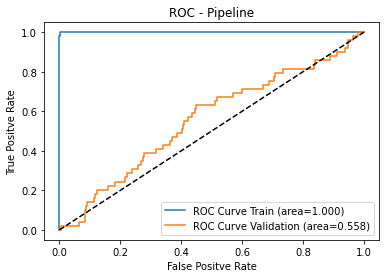

Training:
Pipeline:
KS value:0.9773095623987034

Testing:
Pipeline:
KS value:0.15321153011122612


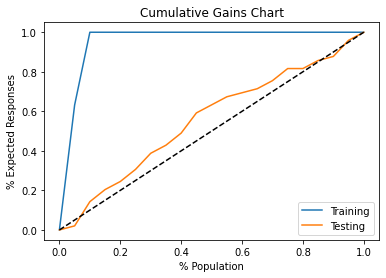

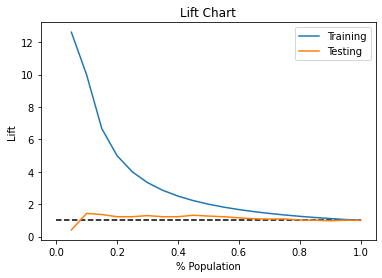

model C_val                 time          auc_train            auc_test  \
0   SVM  0.05  0.40551257133483887  0.999984709947708  0.5615418016633823   
1   SVM   0.1   0.4159965515136719  0.999984709947708  0.5606733691840075   
2   SVM   0.5   0.4279606342315674  0.999977064921562  0.5594041217141521   
3   SVM     1  0.42319583892822266  0.999984709947708  0.5579678679982631   

             ks_train              ks_test  
0  0.9773095623987034  0.15541601255886972  
1  0.9773095623987034  0.15321153011122612  
2  0.9773095623987034  0.15321153011122612  
3  0.9773095623987034  0.15321153011122612

In [13]:
df_para_tuning_svm = pd.DataFrame(columns=['model', 'C_val',
                                             'time', 'auc_train', 'auc_test', 'ks_train', 'ks_test'])
    
for C_val in [0.05, 0.1, 0.5, 1]:
    print ('parameters: ' + str(C_val)) 
    model_temp, df_importance_temp, time_temp = MLM.my_sklearn_svm(X_train_temp, y_train_temp, 
                                                        param = {'C':C_val, 
                                                                 'gamma':'auto', 
                                                                 'kernel':'rbf'})

    ls_roc_temp = SF.plot_roc(model_temp, X_train_temp, X_test_temp, y_train_temp, y_test_temp)
    ls_ks_temp, ls_df_lift_temp = SF.plot_gain_lift(model_temp, X_train_temp, X_test_temp, y_train_temp, y_test_temp, num_bins=21)

    df_para_tuning_temp = np.array(['SVM', C_val,
                                    time_temp, ls_roc_temp[0], ls_roc_temp[1], ls_ks_temp[0], ls_ks_temp[1]])
    df_para_tuning_svm.loc[len(df_para_tuning_svm)] = df_para_tuning_temp

    print ('='*50)

df_para_tuning_svm

# Performance

### Create a data frame consisting of model name, speed, and auc for the models built above

In [14]:
df_perf = pd.DataFrame(columns=['model', 'time', 'auc_train', 'auc_test', 'ks_train', 'ks_test'])

# Random Forest
df_perf_rf = np.array(['RandomForest', time_rf, ls_roc_rf[0], ls_roc_rf[1], ls_ks_rf[0], ls_ks_rf[1]])
df_perf.loc[len(df_perf)] = df_perf_rf

# SVM
df_perf_svm = np.array(['SVM', time_svm, ls_roc_svm[0], ls_roc_svm[1], ls_ks_svm[0], ls_ks_svm[1]])
df_perf.loc[len(df_perf)] = df_perf_svm

# Logistic
df_perf_logistic = np.array(['Logistic', time_logistic, ls_roc_logistic[0], ls_roc_logistic[1], ls_ks_logistic[0], ls_ks_logistic[1]])
df_perf.loc[len(df_perf)] = df_perf_logistic

# Decision Tree
df_perf_dtree = np.array(['DecisionTree', time_dtree, ls_roc_dtree[0], ls_roc_dtree[1], ls_ks_dtree[0], ls_ks_dtree[1]])
df_perf.loc[len(df_perf)] = df_perf_dtree

# XGBoost
df_perf_XGBoost = np.array(['XGBoost', time_XGBoost, ls_roc_XGBoost[0], ls_roc_XGBoost[1], ls_ks_XGBoost[0], ls_ks_XGBoost[1]])
df_perf.loc[len(df_perf)] = df_perf_XGBoost

# Write the model performance data frame to a file 
df_perf.to_csv(os.path.split(os.getcwd())[0] + "\\3. Output\\model_performance.csv", index=False)
df_perf

model                time           auc_train            auc_test  \
0  RandomForest  24.844892978668213  0.6752699569747469  0.6685204351123522   
1           SVM  0.5120408535003662   0.999984709947708  0.5596045292093924   
2      Logistic   46.52821755409241  0.7128232698354183   0.708956403425295   
3  DecisionTree  0.9796490669250488  0.6425612740497246  0.6349722875996843   
4       XGBoost   7.298324823379517   0.724077287361096  0.7073492028664248   

              ks_train              ks_test  
0   0.2552956926810809  0.25065538266657905  
1   0.9773095623987034  0.15321153011122612  
2   0.3187003726476313   0.3104911505058026  
3  0.21124740526481595  0.20028434463464007  
4   0.3296329711401726  0.30416806959467585